In [1]:
import numpy as np
import pandas as pd
import time, os, sys
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [2]:
from sklearn.metrics import precision_recall_fscore_support, classification_report, adjusted_mutual_info_score
from sklearn.metrics import multilabel_confusion_matrix

In [3]:
import tcremb.ml_utils as ml_utils
import benchmark.models as models
import benchmark.metrics as metrics
import tcremb.TCRemb as TCRemb
from sklearn.cluster import KMeans,DBSCAN

In [4]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [5]:
metrics_tcremb={}

In [6]:
label = 'antigen.epitope'
label_s = 'antigen.species'
#label = 'antigen.species_freq'
#output_suf = 'vdjdb_freq'
#output_suf = 'vdjdb'
#output_suf_s = 'vdjdb_s'

In [76]:
def plot_knee(kneedle,
              title: str = "Knee Point",
              xlabel: str =  None,
              ylabel: str = None,
              ax=None):
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 7))

    ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.plot(kneedle.x, kneedle.y, "b", label="data")
    ax.vlines(
        kneedle.knee, ax.get_ylim()[0], ax.get_ylim()[1], linestyles="--", label="knee/elbow"
    )
    ax.legend(loc="best")

In [ ]:
def plot_knee_normalized(kneedle,
                         title: str = "Normalized Knee Point",
                         xlabel: str =  None,
                         ylabel: str = None,
                        ax=None):

    if ax is None:
        fig, ax = plt.subplots(figsize=(7, 7))

    ax.set_title(title)
    if xlabel:
        ax.set_xlabel(xlabel)
    if ylabel:
        ax.set_ylabel(ylabel)
    ax.plot(kneedle.x_normalized, kneedle.y_normalized, "b", label="normalized curve")
    ax.plot(kneedle.x_difference, kneedle.y_difference, "r", label="difference curve")
    ax.set_xticks(
        np.arange(kneedle.x_normalized.min(), kneedle.x_normalized.max() + 0.1, 0.1)
    )
    ax.set_yticks(
        np.arange(kneedle.y_difference.min(), kneedle.y_normalized.max() + 0.1, 0.1)
    )

    ax.vlines(
        kneedle.norm_knee,
        ax.get_ylim()[0],
        ax.get_ylim()[1],
        linestyles="--",
        label="knee/elbow",
    )
    ax.legend(loc="best")

## Run with different protototypes

In [6]:
#samples_n = [1000]
samples_n = [50,100]
#samples_n = [10,50,100,500,1000]
prototypes_n = [100, 150, 300, 500, 1000,2000,3000, 5000]
#prototypes_n = [100]

In [7]:
def run_tcremb_v(run_name, v_path, proto_path):
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v,prototypes_path=proto_path)
    tcremb.tcremb_clonotypes('TRA')
    tcremb.tcremb_clonotypes('TRB')
    tcremb.tcremb_clonotypes('TRA_TRB')
    tcremb.tcremb_dists_count('TRA')
    tcremb.tcremb_dists_count('TRB')
    tcremb.tcremb_dists_count('TRA_TRB')
    tcremb.tcremb_dists('TRA')
    tcremb.tcremb_dists('TRB')
    tcremb.tcremb_dists('TRA_TRB')
    

In [ ]:
for i in samples_n:
    for j in prototypes_n:
        run_name = f'compare_V{i}_{j}'
        if j==3000:
            proto_path_dict = {'TRA' :f'data/data_preped/olga_humanTRA.txt', 'TRB' : f'data/data_preped/olga_humanTRB.txt'}
        else:
            proto_path_dict = {'TRA' :f'data/data_preped/olga_humanTRA_{j}.txt', 'TRB' : f'data/data_preped/olga_humanTRB_{j}.txt'}
    
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        run_tcremb_v(run_name, v_path, proto_path=proto_path_dict)

In [8]:
prototypes_sets = {'donor2_prototypes':{'TRA':'data/data_preped/ptototypes_donor2_TRA.txt', 'TRB':'data/data_preped/ptototypes_donor2_TRB.txt'}}
#prototypes_sets = {'tra1000_trb3000':{'TRA':'data/data_preped/olga_humanTRA_1000.txt', 'TRB':'data/data_preped/olga_humanTRB.txt'}
#                   ,'tra1000_trb5000':{'TRA':'data/data_preped/olga_humanTRA_1000.txt', 'TRB':'data/data_preped/olga_humanTRB_5000.txt'}
#                   ,'tra2000_trb5000':{'TRA':'data/data_preped/olga_humanTRA_2000.txt', 'TRB':'data/data_preped/olga_humanTRB_5000.txt'}
#                   ,'tra3000_trb5000':{'TRA':'data/data_preped/olga_humanTRA_2000.txt', 'TRB':'data/data_preped/olga_humanTRB_5000.txt'}}

In [9]:
for i in samples_n:
    for j in prototypes_sets:
        run_name = f'compare_V{i}_{j}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        run_tcremb_v(run_name, v_path, proto_path=prototypes_sets[j])

[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, κ7 CAGGGGGADGLTF, κ8 CAVTWGGKLIF, κ9 CAVNNARLMF]
(9800, 7876)
333.4697048664093
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEAGQGFFSNQPQHF, κ2 CASSFEPGQGFYSNQPQHF, κ3 CASSYEPGQVSHYSNQPQHF, κ4 CASSALASLNEQFF, κ5 CASSLGETQYF, κ6 CASSLGSRAQETQYF, κ7 CASSLGQSTQYF, κ8 CASSLQGSRRQGQNEQYF, κ9 CASSSQGGEGTEAFF]
(20161, 8422)
759.0804574489594
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 CAVSFGNEKLTF, κ6 CAVTHYGGSQGNLIF, κ7 CAGGGGGADGLTF, κ8 CAVTWGGKLIF, κ9 CAVNNARLMF]
(3876, 7876)
115.05991220474243
[κ0 CASSYLPGQGDHYSNQPQHF, κ1 CASSFEPGQGFYSNQPQHF, κ2 CASSALASLNEQFF, κ3 CASSFTPYNEQFF, κ4 CASSPQGLGTEAFF, κ5 CAEGQGFVGQPQHF, κ6 CASLRSAVWADTQYF, κ7 CASTLTGLGQPQHF, κ8 CASSFQGLGTEAFF, κ9 CASSPSGLAGGHTQYF]
(4220, 8422)
158.737144947052
[κ0 CIVRAPGRADMRF, κ1 CAVPSGAGSYQLTF, κ2 CAYRPPGTYKYIF, κ3 CAYTVLGNEKLTF, κ4 CAVAGYGGSQGNLIF, κ5 

## Compare clustering

In [7]:
samples_n = [10,50,100,500,1000]
#samples_n = [500,1000]

### dbscan eps different sets

In [8]:
method = 'dbscan_eps'
metrics_tcremb[method]={}
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500
       , 1600 , 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2500, 2600, 2700, 2800, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000]

In [9]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    for j in params:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = DBSCAN(eps=j, min_samples=2)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['eps']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

TCR-epitope paires count in V10 dataset: 10288
data/data_preped/VDJdb_data_TRA_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8756476683937824
purity:0.8756476683937824
purity:0.8756476683937824
purity:0.8756476683937824
purity:0.8779661016949153
purity:0.8828250401284109
purity:0.8861313868613139
purity:0.884
purity:0.8796068796068796
purity:0.8862144420131292
purity:0.8800403225806451
purity:0.8803418803418803
purity:0.8797364085667215
purity:0.8757668711656442
purity:0.8659649122807017
purity:0.8617482951022939
purity:0.8509070294784581
purity:0.8412698412698413
purity:0.834624145785877
purity:0.8259092766653044
purity:0.8116270290675727
purity:0.8014159292035399
purity:0.7920693102299233
purity:0.7829627309740056
purity:0.7724425887265136
purity:0.7604840979453983
purity:0.7553566585299701
purity:0.7456617456617457
purity:0.7362827483934751
purity:0.7257988721804511
purity:0.7154652979245704
purity:0.7074989348103963
purity:0.6993677340403834
purity:0.6893165750196386
purity:0.6638336347197107
purity:0.63621234814445
purity:0.6036380311831244
purity:0.5497750281214848
purity:0.5056150430921912
pu

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8940269749518305
purity:0.8940269749518305
purity:0.8940269749518305
purity:0.8940269749518305
purity:0.8954372623574145
purity:0.9001782531194296
purity:0.9036918138041734
purity:0.9017857142857143
purity:0.8972602739726028
purity:0.9034229828850856
purity:0.9003397508493771
purity:0.9
purity:0.8999081726354453
purity:0.8964927288280582
purity:0.8865414710485133
purity:0.8829201101928374
purity:0.8719898605830165
purity:0.8657834101382489
purity:0.8571428571428571
purity:0.849862258953168
purity:0.8359541011474713
purity:0.8277933520224269
purity:0.8182848507744617
purity:0.8094393186657204
purity:0.7997302764666218
purity:0.79008
purity:0.7839582052858021
purity:0.7767332549941246
purity:0.7678270634475014
purity:0.7566052842273819
purity:0.7453069507864029
purity:0.7377445061579329
purity:0.7298930729893073
purity:0.7225201072386059
purity:0.6998972250770812
purity:0.6746919431279621
purity:0.6473043478260869
purity:0.5909310178485288
purity:0.5446574528161688
purity:0.5009

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9068736141906873
purity:0.9068736141906873
purity:0.9068736141906873
purity:0.9068736141906873
purity:0.9082969432314411
purity:0.9117043121149897
purity:0.9128014842300557
purity:0.9142857142857143
purity:0.9065420560747663
purity:0.9132867132867133
purity:0.9082687338501292
purity:0.9100850546780073
purity:0.9102296450939458
purity:0.9056974459724951
purity:0.8991971454058876
purity:0.8929133858267716
purity:0.8884089272858171
purity:0.8853211009174312
purity:0.8724018475750578
purity:0.8624420401854714
purity:0.8477951635846372
purity:0.8408273381294964
purity:0.8315610378562314
purity:0.823202224870878
purity:0.8135206988226358
purity:0.8051060769507371
purity:0.8004849324558365
purity:0.7921218139688845
purity:0.7835018963337548
purity:0.770802042655452
purity:0.7627311522048364
purity:0.7561503108948364
purity:0.7474721285973555
purity:0.7369992535456581
purity:0.7189722413397568
purity:0.6966244725738396
purity:0.6666019794294585
purity:0.6192423972968166
purity:0.56973

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9369747899159664
purity:0.9369747899159664
purity:0.9369747899159664
purity:0.9369747899159664
purity:0.9382716049382716
purity:0.9416342412451362
purity:0.9486301369863014
purity:0.9510086455331412
purity:0.9411764705882353
purity:0.9461883408071748
purity:0.943089430894309
purity:0.9421641791044776
purity:0.9445324881141046
purity:0.9421364985163204
purity:0.9371584699453552
purity:0.9378048780487804
purity:0.9323725055432373
purity:0.9314516129032258
purity:0.9243542435424354
purity:0.9233937397034596
purity:0.9176289453425712
purity:0.9163609684519443
purity:0.9100418410041841
purity:0.9069767441860465
purity:0.9015247776365947
purity:0.8986035215543412
purity:0.895845523698069
purity:0.8921953958450309
purity:0.8861305990286023
purity:0.8795676788471436
purity:0.8749386954389407
purity:0.8713149274684137
purity:0.8680089485458613
purity:0.8644578313253012
purity:0.8486293206197855
purity:0.8316831683168316
purity:0.8157453936348409
purity:0.7901799329063739
purity:0.75367

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9601769911504425
purity:0.9601769911504425
purity:0.9601769911504425
purity:0.9601769911504425
purity:0.961038961038961
purity:0.9617021276595744
purity:0.9644268774703557
purity:0.9635036496350365
purity:0.9461279461279462
purity:0.9494047619047619
purity:0.9482288828337875
purity:0.9457364341085271
purity:0.9464285714285714
purity:0.9446640316205533
purity:0.9432234432234432
purity:0.9424920127795527
purity:0.9364161849710982
purity:0.931758530183727
purity:0.9309090909090909
purity:0.9322033898305084
purity:0.9275220372184133
purity:0.9255419415645617
purity:0.9200710479573713
purity:0.9149291075896581
purity:0.9099601593625498
purity:0.9068702290076336
purity:0.9050772626931567
purity:0.903954802259887
purity:0.8969210174029452
purity:0.8951093951093951
purity:0.888618381010347
purity:0.8863242931332949
purity:0.8829670329670329
purity:0.8821353065539113
purity:0.8693126815101646
purity:0.8604444444444445
purity:0.8482178614337205
purity:0.8253164556962025
purity:0.8021547

In [10]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    for j in params:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = DBSCAN(eps=j, min_samples=2)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['eps']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

TCR-epitope paires count in V10 dataset: 21991
data/data_preped/VDJdb_data_TRB_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9733333333333334
purity:0.9733333333333334
purity:0.9733333333333334
purity:0.9734513274336283
purity:0.973568281938326
purity:0.9737991266375546
purity:0.9743589743589743
purity:0.9759036144578314
purity:0.9650455927051672
purity:0.9605425400739828
purity:0.9616977225672878
purity:0.9559471365638766
purity:0.9523809523809523
purity:0.9516224188790561
purity:0.9490927419354839
purity:0.9429223744292238
purity:0.935590421139554
purity:0.9317664897649734
purity:0.9262381454162276
purity:0.9193495934959349
purity:0.9117647058823529
purity:0.9043526476296091
purity:0.8958387180149909
purity:0.885603490063015
purity:0.8757947320617621
purity:0.8646568313021168
purity:0.8503006012024048
purity:0.8342770856927142
purity:0.8168517539220871
purity:0.8006230529595015
purity:0.7821340713407134
purity:0.7667001867547766
purity:0.7447095295861976
purity:0.7252705283259071
purity:0.6862282181000562
purity:0.6352088915351791
purity:0.5851682226528095
purity:0.5283687943262412
purity:0.466132

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9765807962529274
purity:0.9765807962529274
purity:0.9765807962529274
purity:0.9766899766899767
purity:0.9767981438515081
purity:0.9770114942528736
purity:0.9775280898876404
purity:0.9789473684210527
purity:0.983249581239531
purity:0.9798387096774194
purity:0.9786036036036037
purity:0.9701923076923077
purity:0.9679230152365678
purity:0.9658944658944659
purity:0.9634146341463414
purity:0.9597382989431303
purity:0.9499545040946314
purity:0.9455383326351068
purity:0.9396887159533074
purity:0.933405718422005
purity:0.9266487213997309
purity:0.9201485608170845
purity:0.9112324044814708
purity:0.9019396551724138
purity:0.8942697768762677
purity:0.8853442072439434
purity:0.8714542998649257
purity:0.8566270178419712
purity:0.8402460805715419
purity:0.8234859675036927
purity:0.8054542296334897
purity:0.7902700943703221
purity:0.7700061087354918
purity:0.7539350180505415
purity:0.7201840726064169
purity:0.6742656232278553
purity:0.6277828145461871
purity:0.5736713886131913
purity:0.51495

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.989010989010989
purity:0.989010989010989
purity:0.989010989010989
purity:0.9890710382513661
purity:0.9891304347826086
purity:0.989247311827957
purity:0.9894736842105263
purity:0.9900497512437811
purity:0.9922330097087378
purity:0.9862385321100917
purity:0.9861635220125786
purity:0.9775641025641025
purity:0.974910394265233
purity:0.9721627408993576
purity:0.9696594427244583
purity:0.9653049804141018
purity:0.956434651977967
purity:0.9536178107606679
purity:0.9465747522619561
purity:0.9413183279742765
purity:0.9354838709677419
purity:0.9297820823244553
purity:0.9220821209182024
purity:0.9132930513595167
purity:0.9064912782384902
purity:0.8994609164420485
purity:0.8869123252858958
purity:0.8722382324687801
purity:0.8580746738641476
purity:0.8424599831508003
purity:0.8233544805709754
purity:0.8100278551532033
purity:0.7916521739130434
purity:0.7772097625329816
purity:0.7470020473822755
purity:0.706400621922778
purity:0.6645905420991927
purity:0.6172928461142563
purity:0.5630392429

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9881889763779528
purity:0.9881889763779528
purity:0.9881889763779528
purity:0.98828125
purity:0.9883720930232558
purity:0.9884615384615385
purity:0.9887218045112782
purity:0.9893617021276596
purity:0.992
purity:0.9875
purity:0.9882154882154882
purity:0.986764705882353
purity:0.9825436408977556
purity:0.9824390243902439
purity:0.984306887532694
purity:0.9789227166276346
purity:0.9772079772079773
purity:0.9735624586913417
purity:0.9693941286695815
purity:0.9653958944281525
purity:0.9640651319483436
purity:0.9594309799789252
purity:0.9558750619732276
purity:0.9498359118612283
purity:0.9473918858671422
purity:0.9431578947368421
purity:0.9344328238133548
purity:0.9287913779830639
purity:0.9222018348623853
purity:0.9123230928546773
purity:0.9039344262295081
purity:0.8960473078120137
purity:0.8762463343108504
purity:0.8713286713286713
purity:0.8555583564406353
purity:0.8353021353930031
purity:0.8119341563786008
purity:0.7805371596762325
purity:0.7440250535684853
purity:0.711942746384

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9880239520958084
purity:0.9880239520958084
purity:0.9880239520958084
purity:0.9880239520958084
purity:0.9881656804733728
purity:0.9883040935672515
purity:0.9884393063583815
purity:0.989247311827957
purity:0.9925925925925926
purity:0.9883720930232558
purity:0.9882629107981221
purity:0.9873150105708245
purity:0.9809885931558935
purity:0.9817415730337079
purity:0.9824120603015075
purity:0.9785310734463277
purity:0.9776649746192894
purity:0.9744801512287334
purity:0.9721723518850988
purity:0.968403074295474
purity:0.967373572593801
purity:0.9634424980959635
purity:0.9612625538020086
purity:0.956373551465576
purity:0.9551365409622887
purity:0.9496932515337423
purity:0.9436619718309859
purity:0.9368008948545862
purity:0.9296750133191263
purity:0.9233449477351916
purity:0.9173789173789174
purity:0.9098286744815148
purity:0.9045996592844975
purity:0.8992747784045125
purity:0.8861906487857919
purity:0.8707149853085211
purity:0.8536088474970897
purity:0.8326827998959146
purity:0.8127323

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


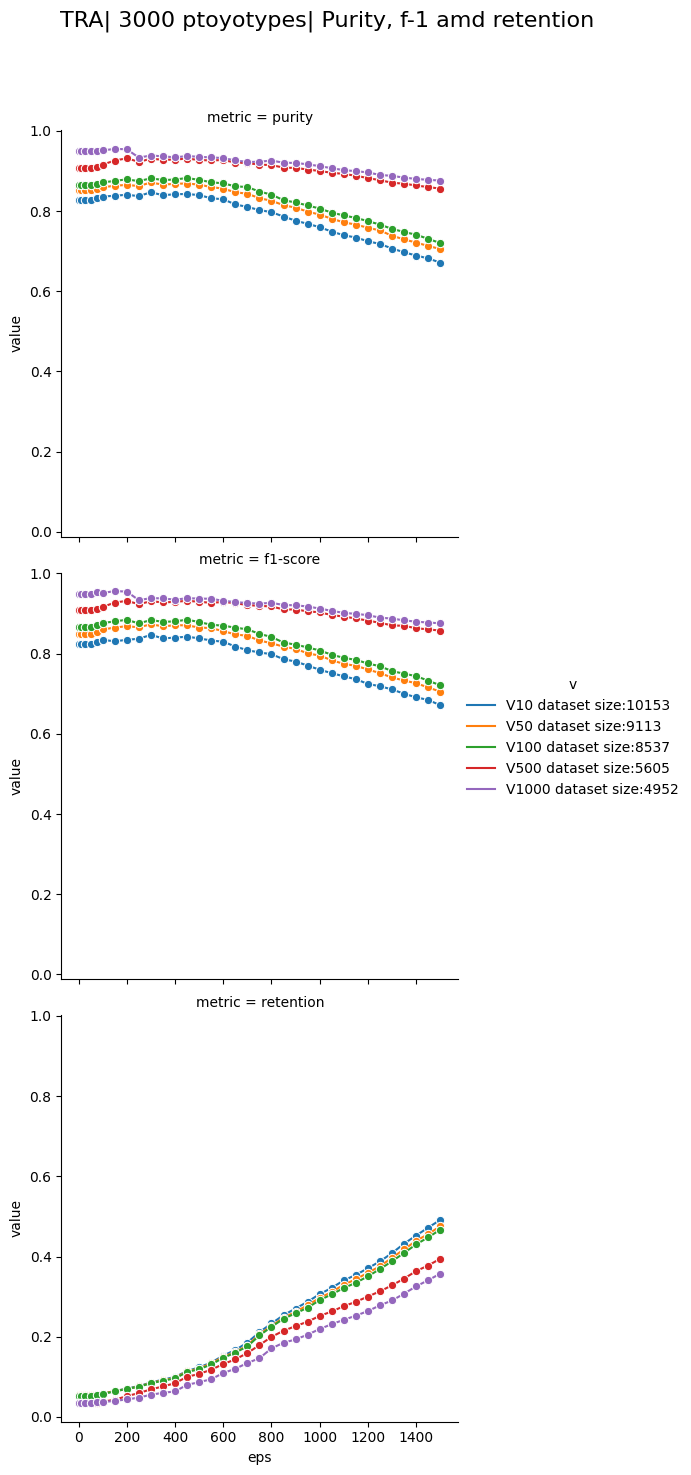

In [11]:
chain = 'TRA'
n_prototypes = 3000
method = 'dbscan'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','eps','v']].melt(id_vars=['eps','v'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{method}_{chain}.png")

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


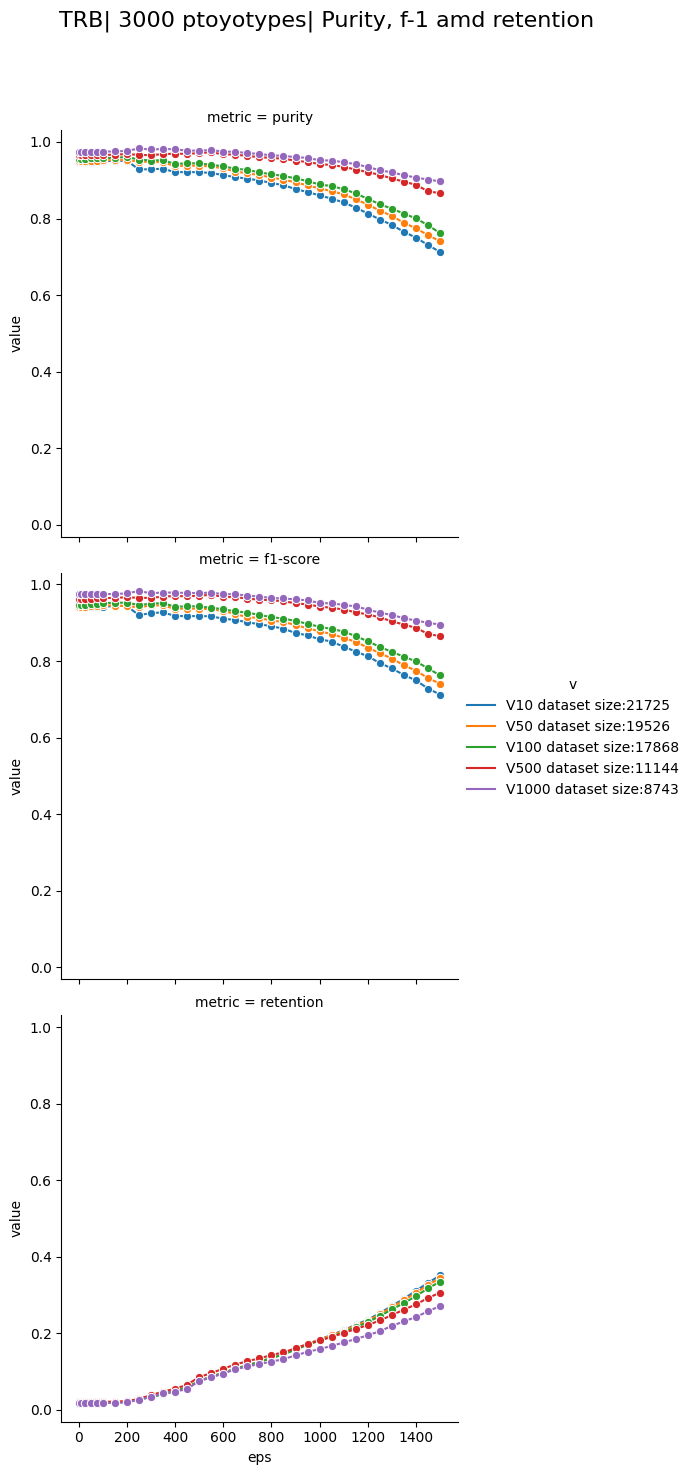

In [18]:
chain = 'TRB'
n_prototypes = 3000
method = 'dbscan'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','eps','v']].melt(id_vars=['eps','v'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{method}_{chain}.png")

### VDJdb full

In [81]:
tcremb_dict = {}
eps_by_knee_dict = {}

In [82]:
eps_by_knee_dict = {}

In [83]:

params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500
       , 1600 , 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2500, 2600, 2700, 2800, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000]

In [84]:
run_name = 'vdjdb_paired'
d = 'vdjdb'
method = run_name + 'dbscan_eps'
label = 'antigen.epitope'

In [85]:


metrics_tcremb[method] = {}

data_preped_path = 'data/data_preped/VDJdb_data_paired.csv'
data_preped = pd.read_csv(data_preped_path,sep='\t')
tcremb_dict[d] = TCRemb.TCRemb(run_name, data_preped)

for c in ['TRA','TRB','TRA_TRB']:
    chain=c
    metrics_tcremb[method][chain]={}

    tcremb_dict[d].tcremb_clonotypes(chain,unique_clonotypes=True)
    tcremb_dict[d].tcremb_dists(chain)
    tcremb_dict[d].tcremb_pca(chain)
    tcremb_dict[d].tcremb_tsne(chain)
    
    for j in params:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = DBSCAN(eps=j, min_samples=2)
        dbscan.clstr(chain,tcremb_dict[d], label, model=model)
        t = tcremb_dict[d].annot[chain][[tcremb_dict[d].annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][j] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][j]['eps']=j

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8525641025641025
purity:0.8525641025641025
purity:0.8525641025641025
purity:0.8525641025641025
purity:0.8551181102362204
purity:0.8597014925373134
purity:0.8637602179836512
purity:0.8601485148514851
purity:0.8538812785388128
purity:0.8578680203045685
purity:0.8507462686567164
purity:0.8532513181019332
purity:0.8486692015209125
purity:0.8418833450456782
purity:0.8305837563451777
purity:0.823297692740574
purity:0.8076335877862595
purity:0.8011882998171846
purity:0.7895783611774065
purity:0.7812046444121916
purity:0.7661906343407506
purity:0.7563182527301092
purity:0.7443148688046647
purity:0.7345374931581828
purity:0.7236467236467237
purity:0.712050843314593
purity:0.7062543921293043
purity:0.6941964285714286
purity:0.6844340624336377
purity:0.6727601446364002
purity:0.6606257153758107
purity:0.6540697674418605
purity:0.6462074978204011
purity:0.635085369936391
purity:0.6061396776669224
purity:0.5745098039215686
purity:0.5417630429195579
purity:0.4882534409112482
purity:0.444125

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9695652173913043
purity:0.9695652173913043
purity:0.9695652173913043
purity:0.9696969696969697
purity:0.9698275862068966
purity:0.9700854700854701
purity:0.9707112970711297
purity:0.9725490196078431
purity:0.9611940298507463
purity:0.9556886227544911
purity:0.9565656565656566
purity:0.9494430162810625
purity:0.9482014388489208
purity:0.9462116830537883
purity:0.9425742574257425
purity:0.9352678571428571
purity:0.9285714285714286
purity:0.9224806201550387
purity:0.9163251366120219
purity:0.9098101265822784
purity:0.9006466784244562
purity:0.8905872888173774
purity:0.8789004457652303
purity:0.8681522748375116
purity:0.8556923741628861
purity:0.8432926829268292
purity:0.8276385725132878
purity:0.8079787234042554
purity:0.7898036627619205
purity:0.772838749233599
purity:0.7542372881355932
purity:0.7378236951563129
purity:0.7148941500688965
purity:0.6958161461402474
purity:0.6513477228131778
purity:0.5993272115646877
purity:0.5490763052208836
purity:0.49405017921146954
purity:0.433

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9873417721518988
purity:0.986046511627907
purity:0.9868421052631579
purity:0.9881889763779528
purity:0.98989898989899
purity:0.9907692307692307
purity:0.9888268156424581
purity:0.9901719901719902
purity:0.991130820399113
purity:0.9875518672199171
purity:0.9862204724409449
purity:0.9851024208566108
purity:0.986013986013986
purity:0.9831365935919055
purity:0.9838709677419355
purity:0.9846153846153847
purity:0.9850746268656716
purity:0.9828326180257511
purity:0.9819694868238558
purity:0.9801587301587301
purity:0.9796954314720813
purity:0.980246913580247
purity:0.9809750297265161
purity:0.9817351598173516
purity:0.9814004376367614
purity:0.9811320754716981
purity:0.9783464566929134
purity:0.9792648444863337
purity:0.9803395889186773
purity:0.977872340425532
purity:0.9768211920529801
purity:0.973851030110935
purity:0.9726443768996961
purity:0.9699853587115667
purity:0.9660095173351462
purity:0.9

In [117]:
degree = 10

In [118]:
run_name = 'vdjdb_paired'
d = 'vdjdb'
method = run_name + 'dbscan_eps'

In [119]:
tcremb_dict

{'vdjdb': <tcremb.TCRemb.TCRemb at 0x7f79a6668210>}

In [120]:
method

'vdjdb_paireddbscan_eps'

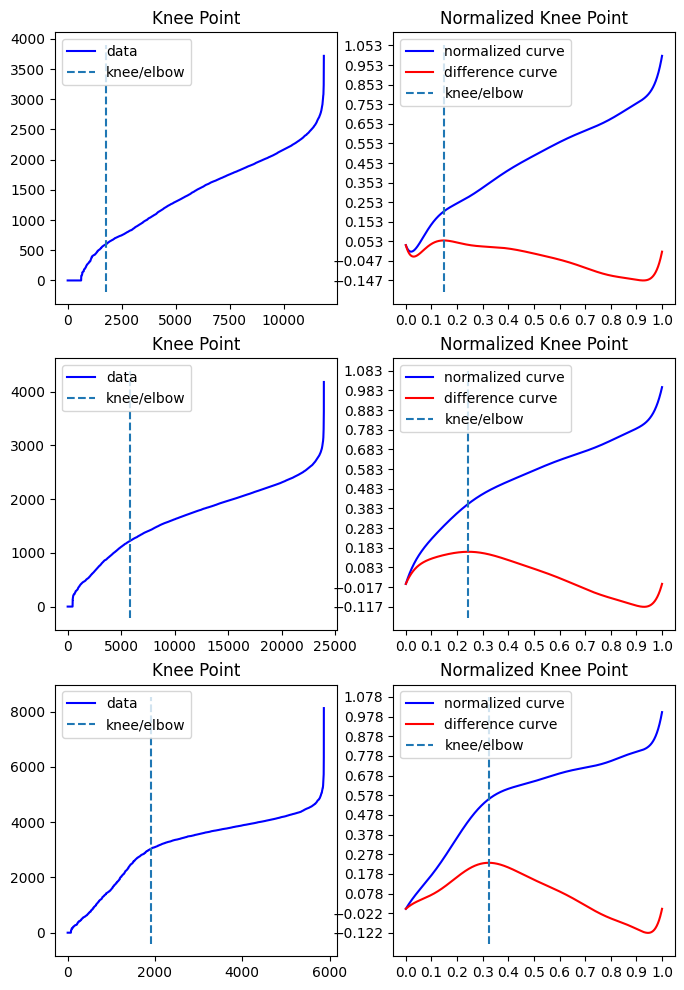

In [121]:
fig, ax = plt.subplots(3,2,figsize=(8, 12))

ax_i = 0
for c in ['TRA','TRB','TRA_TRB']:
    chain=c
    eps_by_knee_dict[f'{d}_{c}']={}
    
    neighbors = 4        
    nbrs = NearestNeighbors(n_neighbors=neighbors).fit(tcremb_dict[d].pca_clones[chain].drop(tcremb_dict[d].clonotype_id,axis=1))
    distances, indices = nbrs.kneighbors(tcremb_dict[d].pca_clones[chain].drop(tcremb_dict[d].clonotype_id,axis=1))
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    
    eps_by_knee_dict[f'{d}_{c}']['max_pca_dist']=round(max(distances),2)
    eps_by_knee_dict[f'{d}_{c}']['mean_pca_dist']=round(np.mean(distances),2)
    eps_by_knee_dict[f'{d}_{c}']['median_pca_dist']=round(np.median(distances),2)
    eps_by_knee_dict[f'{d}_{c}']['clonotypes_count'] = str(len(tcremb_dict[d].pca_clones[chain]))

    kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                            distances, # y values
                            S=1.0, #parameter suggested from paper
                            #curve="convex", #parameter from figure
                            curve="concave",
                            interp_method="polynomial",    
                          polynomial_degree=degree,
                            online = True,
                            direction="increasing", ) #parameter from figure
    
    eps_by_knee_dict[f'{d}_{c}']['knee']=str(round(distances[kneedle.knee],2))
    
    plot_knee(kneedle,ax=ax[ax_i,0])
    plot_knee_normalized(kneedle,ax=ax[ax_i,1])
    ax_i+=1
    fig.savefig(f"results/figures/tcremb_compare_{method}_knees.png")

In [54]:
coef = 0.85

In [55]:
run_name = 'vdjdb_paired'
d = 'vdjdb'
method = run_name + 'dbscan_eps'

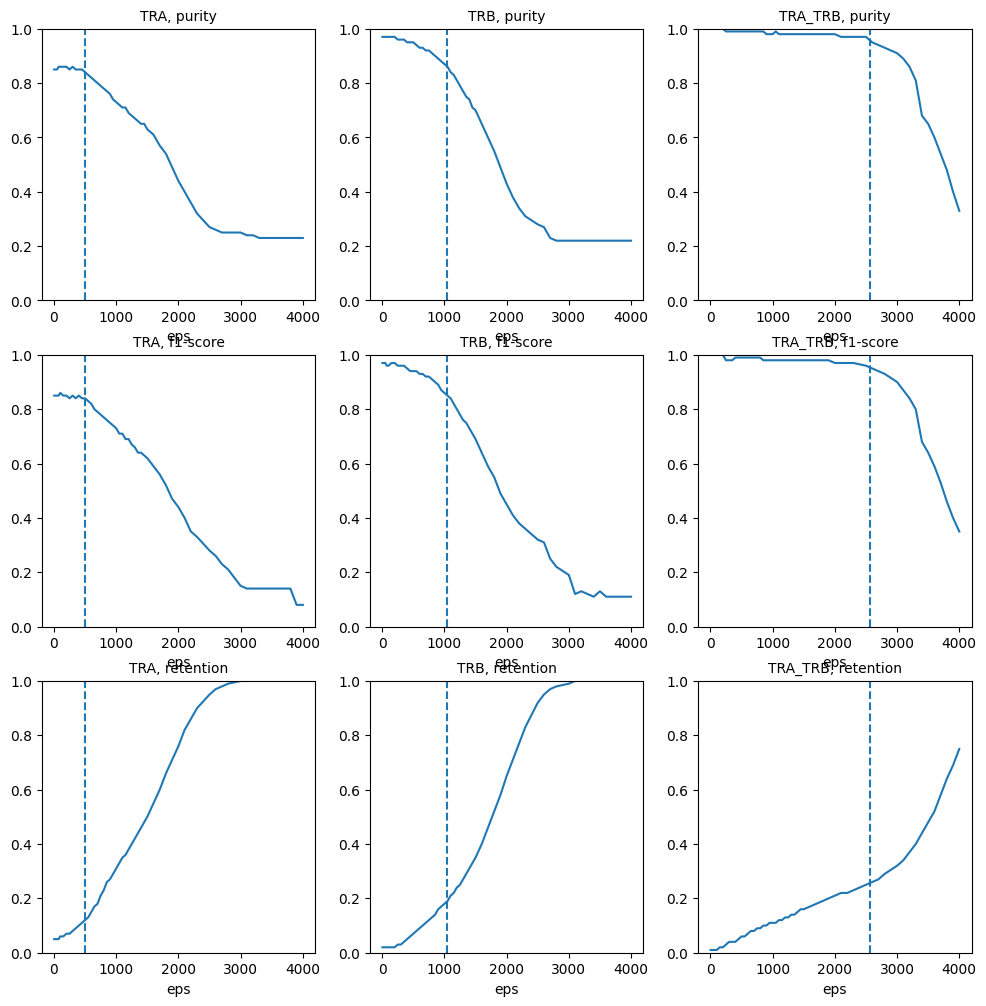

In [56]:

fig, ax = plt.subplots(3,3,figsize=(12, 12))
chain = 'TRA'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
m = 'purity'
ax[0,0].plot(metrics_df['eps'],metrics_df[m])
ax[0,0].axvline(x=float(eps_by_knee_dict[f'{d}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,0].set_xlabel('eps')
ax[0,0].set_ylim([0,1])
ax[0,0].set_title(f'{chain}, {m}', fontsize=10)

m= 'f1-score'
ax[1,0].plot(metrics_df['eps'],metrics_df[m])
ax[1,0].axvline(x=float(eps_by_knee_dict[f'{d}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[1,0].set_xlabel('eps')
ax[1,0].set_ylim([0,1])
ax[1,0].set_title(f'{chain}, {m}', fontsize=10)

m='retention'
ax[2,0].plot(metrics_df['eps'],metrics_df[m])
ax[2,0].axvline(x=float(eps_by_knee_dict[f'{d}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,0].set_xlabel('eps')
ax[2,0].set_ylim([0,1])
ax[2,0].set_title(f'{chain}, {m}', fontsize=10)

chain = 'TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
m = 'purity'
ax[0,1].plot(metrics_df['eps'],metrics_df[m])
ax[0,1].axvline(x=float(eps_by_knee_dict[f'{d}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,1].set_xlabel('eps')
ax[0,1].set_ylim([0,1])
ax[0,1].set_title(f'{chain}, {m}', fontsize=10)

m= 'f1-score'
ax[1,1].plot(metrics_df['eps'],metrics_df[m])
ax[1,1].axvline(x=float(eps_by_knee_dict[f'{d}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[1,1].set_xlabel('eps')
ax[1,1].set_ylim([0,1])
ax[1,1].set_title(f'{chain}, {m}', fontsize=10)

m='retention'
ax[2,1].plot(metrics_df['eps'],metrics_df[m])
ax[2,1].axvline(x=float(eps_by_knee_dict[f'{d}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,1].set_xlabel('eps')
ax[2,1].set_ylim([0,1])
ax[2,1].set_title(f'{chain}, {m}', fontsize=10)

chain = 'TRA_TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
m = 'purity'
ax[0,2].plot(metrics_df['eps'],metrics_df[m])
ax[0,2].axvline(x=float(eps_by_knee_dict[f'{d}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,2].set_xlabel('eps')
ax[0,2].set_ylim([0,1])
ax[0,2].set_title(f'{chain}, {m}', fontsize=10)

m= 'f1-score'
ax[1,2].plot(metrics_df['eps'],metrics_df[m])
ax[1,2].axvline(x=float(eps_by_knee_dict[f'{d}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[1,2].set_xlabel('eps')
ax[1,2].set_ylim([0,1])
ax[1,2].set_title(f'{chain}, {m}', fontsize=10)

m='retention'
ax[2,2].plot(metrics_df['eps'],metrics_df[m])
ax[2,2].axvline(x=float(eps_by_knee_dict[f'{d}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,2].set_xlabel('eps')
ax[2,2].set_ylim([0,1])
ax[2,2].set_title(f'{chain}, {m}', fontsize=10)


fig.savefig(f"results/figures/tcremb_compare_{method}.png")

In [57]:

pd.DataFrame(eps_by_knee_dict)

vdjdb_TRA vdjdb_TRB vdjdb_TRA_TRB donor1_TRA donor1_TRB  \
max_pca_dist       3712.63   4183.15       8122.67    4741.82    4718.82   
mean_pca_dist      1412.29   1664.57       3119.52    1920.64    2378.57   
median_pca_dist     1487.0   1766.72       3541.88    2024.78    2479.57   
clonotypes_count     11850     23948          5870       2454       2554   
knee                593.81   1224.04       3026.07    1540.94    1828.58   
all_knees              NaN       NaN           NaN      [681]      [411]   
donor                  NaN       NaN           NaN     donor1     donor1   

                 donor1_TRA_TRB donor2_TRA donor2_TRB donor2_TRA_TRB  \
max_pca_dist            6761.54    4639.12    4482.32        7291.02   
mean_pca_dist           3637.39    1934.27    2278.05        2991.24   
median_pca_dist         3852.95    2138.48    2471.22        3279.71   
clonotypes_count           2319       2163       2257           1974   
knee                    2924.33    1653.67    1915.59        2353.98   
all_knees              [1, 389]   [1, 679]      [564]      [621, 86]   
donor                    donor1     donor2     donor2         donor2   

                 donor3_TRA donor3_TRB donor3_TRA_TRB  
max_pca_dist         3725.2    4145.33        7151.94  
mean_pca_dist       1618.36     2057.7        3520.73  
median_pca_dist     1686.97    2109.91        3601.88  
clonotypes_count       9074      10265           8903  
knee                 704.77    1348.12        2736.57  
all_knees             [905]     [1105]          [827]  
donor                donor3     donor3         donor3

### 10x donors

In [39]:
method = 'dbscan_eps_donors'
metrics_tcremb[method]={}
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500
       , 1600 , 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2500, 2600, 2700, 2800, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900, 4000, 4500, 5000, 5500, 6000]

In [40]:
label = 'top_tetramer'
label_high = 'top_tetramer_freq'


In [41]:

metrics_tcremb[method] = {}


for d in ['donor1','donor2','donor3']:
    donor = d
    run_name = '10x_' + donor
    metrics_tcremb[method][donor] ={}
    data_path = f'data/data_preped/10x_annot_data_{donor}.txt'
    data_paired_path = f'data/data_preped/10x_annot_data_paired{donor}.txt'
    
    data_paired = pd.read_csv(data_paired_path,sep='\t')
    tcremb_dict[donor] = TCRemb.TCRemb(run_name, data_paired)
    
    for c in ['TRA','TRB','TRA_TRB']:
        chain=c
        metrics_tcremb[method][donor][chain]={}

        tcremb_dict[donor].tcremb_clonotypes(chain,unique_clonotypes=True)
        tcremb_dict[donor].tcremb_dists(chain)
        tcremb_dict[donor].tcremb_pca(chain)
        tcremb_dict[donor].tcremb_tsne(chain)
    
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb_dict[donor], label, model=model)
            t = tcremb_dict[donor].annot[chain][[tcremb_dict[donor].annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][donor][chain][j] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][donor][chain][j]['eps']=j

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8243243243243243
purity:0.8243243243243243
purity:0.8243243243243243
purity:0.8243243243243243
purity:0.8243243243243243
purity:0.8414634146341463
purity:0.8488372093023255
purity:0.8539325842696629
purity:0.8315789473684211
purity:0.8461538461538461
purity:0.8532110091743119
purity:0.8558558558558559
purity:0.8560606060606061
purity:0.8623188405797102
purity:0.8653846153846154
purity:0.8604651162790697
purity:0.8527918781725888
purity:0.8310502283105022
purity:0.8293650793650794
purity:0.8382838283828383
purity:0.8297213622291022
purity:0.8228571428571428
purity:0.8256410256410256
purity:0.8219512195121951
purity:0.8175519630484989
purity:0.811529933481153
purity:0.8043478260869565
purity:0.8065173116089613
purity:0.8035019455252919
purity:0.7988826815642458
purity:0.7975986277873071
purity:0.795417348608838
purity:0.7921259842519685
purity:0.7912254160363086
purity:0.7844474761255116
purity:0.7798053527980535
purity:0.7628755364806867
purity:0.7530288909599254
purity:0.73989

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.989247311827957
purity:0.9894736842105263
purity:0.9809523809523809
purity:0.981651376146789
purity:0.9826086956521739
purity:0.9770992366412213
purity:0.9776119402985075
purity:0.9784172661870504
purity:0.9668874172185431
purity:0.9556962025316456
purity:0.9570552147239264
purity:0.9526627218934911
purity:0.9354838709677419
purity:0.9253731343283582
purity:0.9162790697674419
purity:0.911504424778761
purity:0.9024390243902439
purity:0.8745387453874539
purity:0.8585526315789473
purity:0.848314606741573
purity:0.8291457286432161
purity:0.8185745140388769
purity:0.7835420393559929
purity:0.7618343195266272
purity:0.7413366336633663
purity:0.7145855194123819
purity:0.6724791508718726
purity:0.635938543754175
purity:0.6273106738223018
purity:0.6150107991360692
purity:0.5460405156537753
purity:0.55048287971905

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9883720930232558
purity:0.989010989010989
purity:0.98989898989899
purity:0.9809523809523809
purity:0.9727272727272728
purity:0.9745762711864406
purity:0.9772727272727273
purity:0.9774436090225563
purity:0.9784172661870504
purity:0.9790209790209791
purity:0.9794520547945206
purity:0.9673202614379085
purity:0.967948717948718
purity:0.9629629629629629
purity:0.9575757575757575
purity:0.9580838323353293
purity:0.9542857142857143
purity:0.9550561797752809
purity:0.9555555555555556
purity:0.9468085106382979
purity:0.9476439790575916
purity:0.9481865284974094
purity:0.95
purity:0.9516908212560387
purity:0.9447004608294931
purity:0.9464285714285714
purity:0.9458333333333333
purity:0.943609022556391
purity:0.9375
purity:0.9290322580645162
purity:0.9252873563218391
purity:0.9174528301886793
purity:0.9144050104384134
purity:0

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8494623655913979
purity:0.8494623655913979
purity:0.8494623655913979
purity:0.8494623655913979
purity:0.8494623655913979
purity:0.8613861386138614
purity:0.8640776699029126
purity:0.8706896551724138
purity:0.8571428571428571
purity:0.8601398601398601
purity:0.8701298701298701
purity:0.8734177215189873
purity:0.8870967741935484
purity:0.8877551020408163
purity:0.8779342723004695
purity:0.885593220338983
purity:0.8716981132075472
purity:0.8680555555555556
purity:0.8722741433021807
purity:0.863768115942029
purity:0.859504132231405
purity:0.8617021276595744
purity:0.8607594936708861
purity:0.8578431372549019
purity:0.8591885441527446
purity:0.8537735849056604
purity:0.8503401360544217
purity:0.843010752688172
purity:0.842436974789916
purity:0.8404907975460123
purity:0.8388998035363457
purity:0.8323809523809523
purity:0.8296703296703297
purity:0.8247787610619469
purity:0.809375
purity:0.8002793296089385
purity:0.7890625
purity:0.7680826636050516
purity:0.7572192513368984
purity:0.7

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9555555555555556
purity:0.921875
purity:0.935064935064935
purity:0.9411764705882353
purity:0.9532710280373832
purity:0.9606299212598425
purity:0.9624060150375939
purity:0.9517241379310345
purity:0.9454545454545454
purity:0.9476744186046512
purity:0.9473684210526315
purity:0.949748743718593
purity:0.9488372093023256
purity:0.9372384937238494
purity:0.9362549800796812
purity:0.9312977099236641
purity:0.9328358208955224
purity:0.9247311827956989
purity:0.9243986254295533
purity:0.9147540983606557
purity:0.9158576051779935
purity:0.9125
purity:0.9014925373134328
purity:0.8971428571428571
purity:0.895774647887324
purity:0.893048128342246
purity:0.8729016786570744
purity:0.8694690265486725
purity:0.8548057259713702
purity:0.8405797101449275
purity:0.8211920529801324
purity:0.7958041958041958
purity:0.7699876998769988
purity:0.7547169811320755
purity:0.7081218274111675
purity:0.6793437733035048
pu

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9938271604938271
purity:0.9885714285714285
purity:0.9811320754716981
purity:0.9821428571428571
purity:0.9757085020242915
purity:0.9725490196078431
purity:0.9735849056603774
purity:0.96415770609319
purity:0.9655172413793104
purity:0.9636963696369637
purity:0.9641693811074918
purity:0.9626168224299065
purity:0.9629629629629629
purity:0.9642857142857143
purity:0.9655172413793104
purity:0.9597855227882037
purity:0.961439588688946
purity:0.9603960396039604
purity:0.9610705596107056
purity:0.9598108747044918
purity:0.9596412556053812
purity:0.959051724137931
purity:0.9585921325051759
purity:0.9562624254473161
purity:0.9585687382297552
purity:0.9609929078014184
purity:0.9633333333333334
purity:0.9579100145137881
purity:0.9537166900420757
purity:0.9551451187335093
purity:0.9526854219948849
purity:0.945852534562212
purity:0

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8169934640522876
purity:0.8169934640522876
purity:0.8169934640522876
purity:0.8169934640522876
purity:0.8152866242038217
purity:0.8198757763975155
purity:0.8143712574850299
purity:0.8341708542713567
purity:0.8407079646017699
purity:0.8346153846153846
purity:0.8397212543554007
purity:0.8409090909090909
purity:0.8358585858585859
purity:0.8381374722838137
purity:0.8445692883895131
purity:0.860248447204969
purity:0.8567708333333334
purity:0.8614864864864865
purity:0.8642095053346266
purity:0.8664412510566357
purity:0.869172932330827
purity:0.8717083051991897
purity:0.8716707021791767
purity:0.8754189944134079
purity:0.8728856996412097
purity:0.8750593824228029
purity:0.8716600963644328
purity:0.8733197556008147
purity:0.8720306513409962
purity:0.8690647482014389
purity:0.8681833389093342
purity:0.8666458463460337
purity:0.8673167848699763
purity:0.8645862357202564
purity:0.8637922586967173
purity:0.863253402462735
purity:0.8621955933513722
purity:0.8603478260869565
purity:0.857051

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.8
purity:0.8
purity:0.8
purity:0.8
purity:0.8
purity:0.8
purity:0.8
purity:0.8333333333333334
purity:0.8125
purity:0.85
purity:0.8666666666666667
purity:0.825
purity:0.8269230769230769
purity:0.8245614035087719
purity:0.8205128205128205
purity:0.8314606741573034
purity:0.8278688524590164
purity:0.8251748251748252
purity:0.8248587570621468
purity:0.817258883248731
purity:0.8393574297188755
purity:0.8461538461538461
purity:0.8553846153846154
purity:0.8463541666666666
purity:0.8501118568232662
purity:0.8547169811320755
purity:0.8596491228070176
purity:0.8678474114441417
purity:0.8656361474435196
purity:0.8722334004024145
purity:0.8780269058295964
purity:0.8736842105263158
purity:0.8716461203770849
purity:0.8691232528589581
purity:0.8713272543059777
purity:0.8711656441717791
purity:0.8682274247491639
purity:0.8676675006950236
purity:0.8657202699557831
purity:0.8631141045958796
purity:0.8598401088620514
purity:0.8561613144137415
purity:0.8535055350553505
purity:0.8533241946538725
p

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.6
purity:0.6
purity:0.6
purity:0.6
purity:0.6
purity:0.6
purity:0.6
purity:0.6363636363636364
purity:0.7333333333333333
purity:0.7222222222222222
purity:0.75
purity:0.7333333333333333
purity:0.7380952380952381
purity:0.7555555555555555
purity:0.7446808510638298
purity:0.7346938775510204
purity:0.7272727272727273
purity:0.7538461538461538
purity:0.7605633802816901
purity:0.7560975609756098
purity:0.7472527472527473
purity:0.7368421052631579
purity:0.7352941176470589
purity:0.7314814814814815
purity:0.75
purity:0.75
purity:0.7633587786259542
purity:0.7573529411764706
purity:0.7482517482517482
purity:0.7533333333333333
purity:0.75
purity:0.7678571428571429
purity:0.7666666666666667
purity:0.7577319587628866
purity:0.7537688442211056
purity:0.7594339622641509
purity:0.7542372881355932
purity:0.7587548638132295
purity:0.7622377622377622
purity:0.7673716012084593
purity:0.7513227513227513
purity:0.7476851851851852
purity:0.7378472222222222
purity:0.7452830188679245
purity:0.75388601

In [42]:
degree = 10

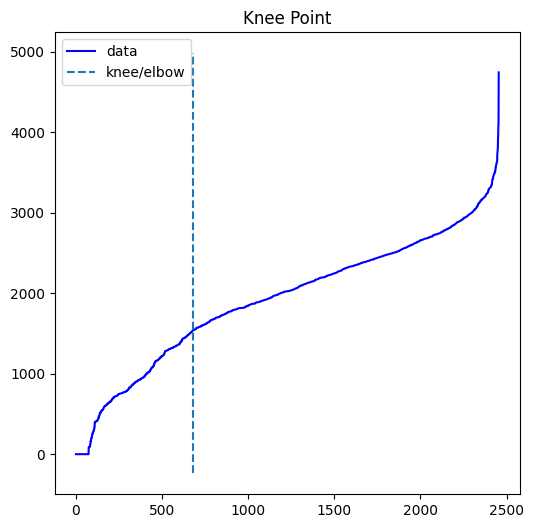

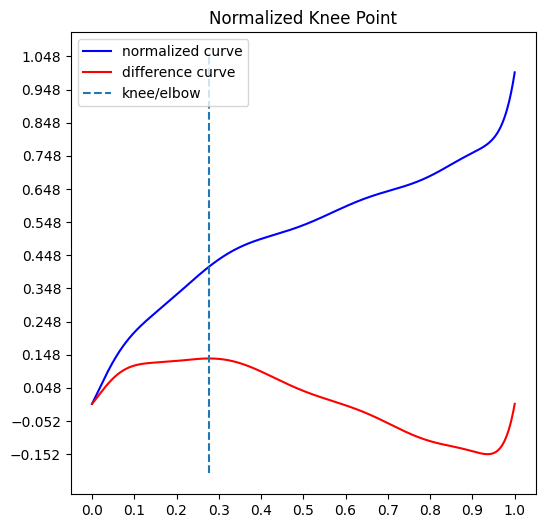

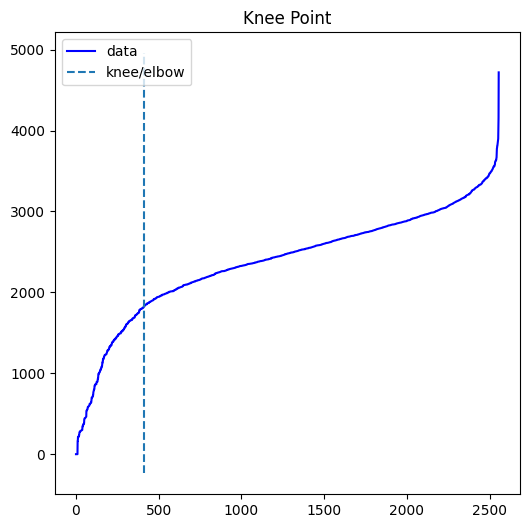

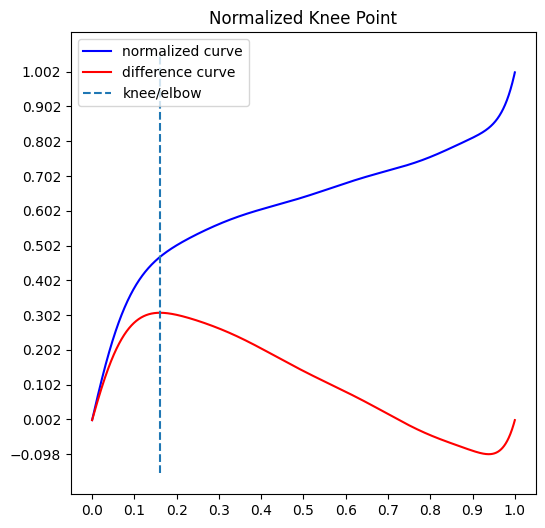

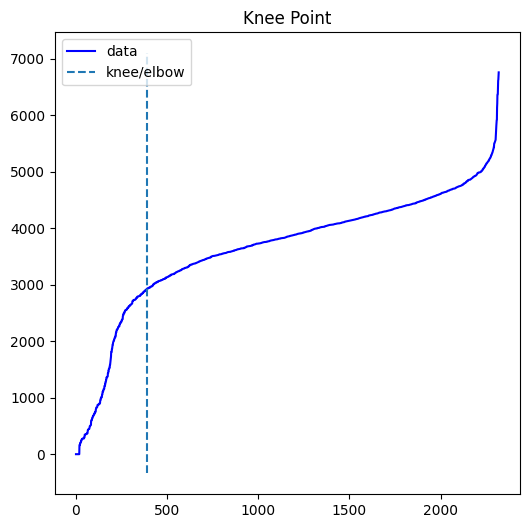

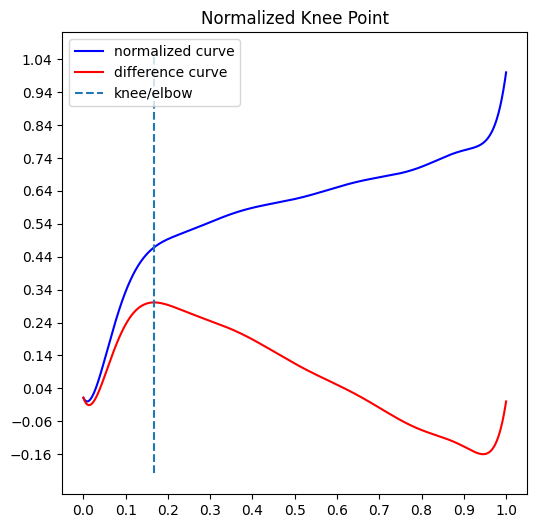

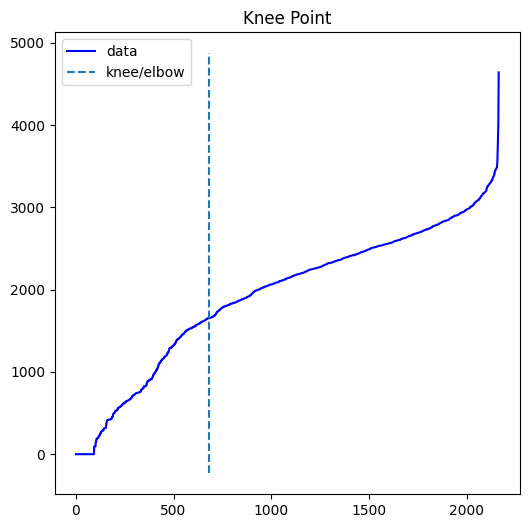

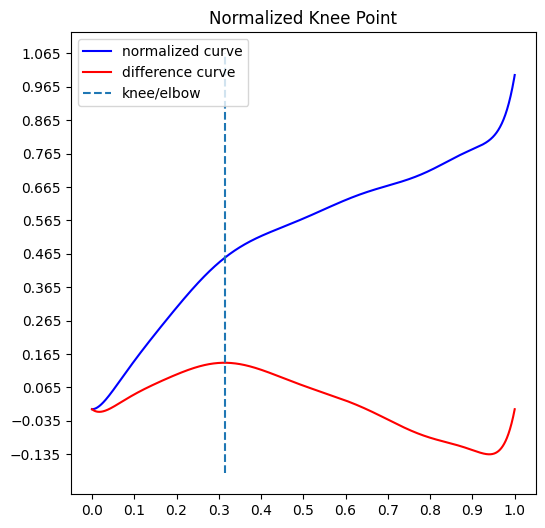

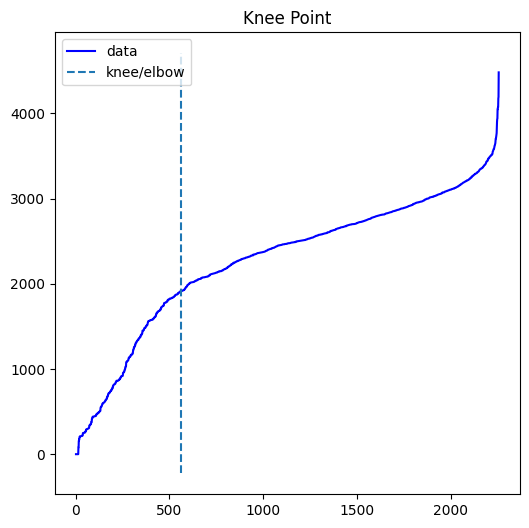

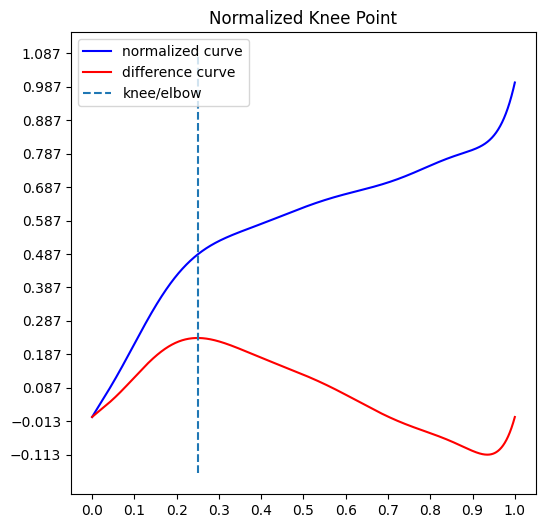

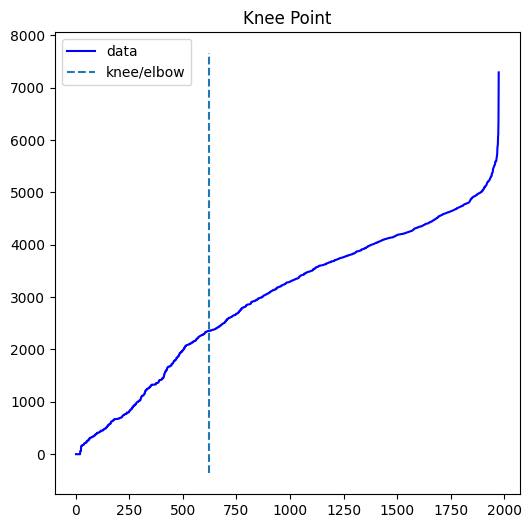

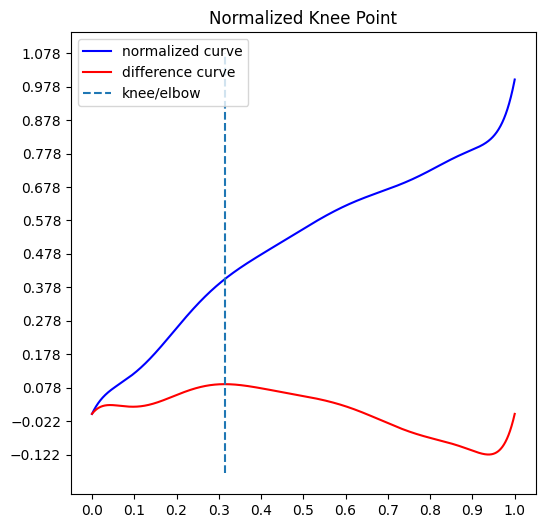

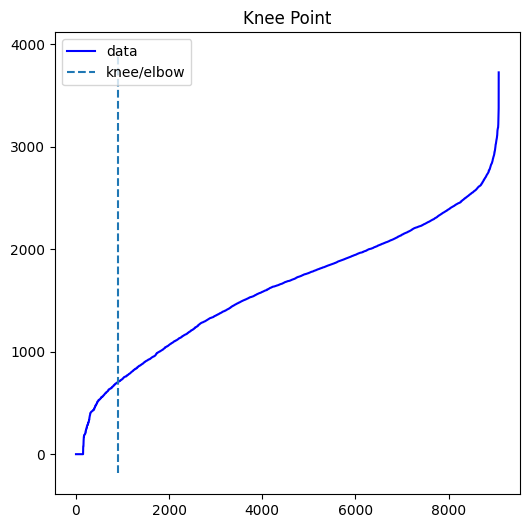

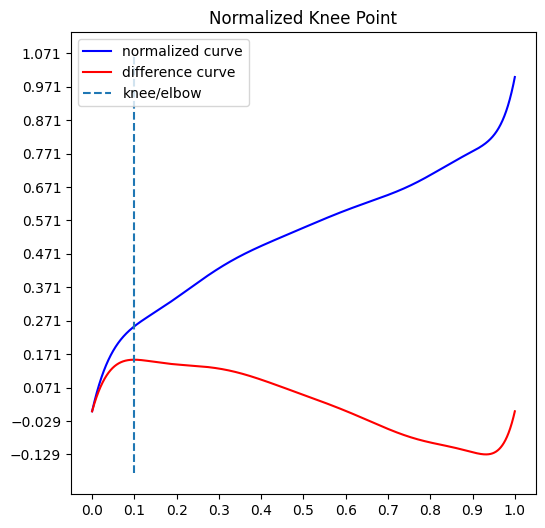

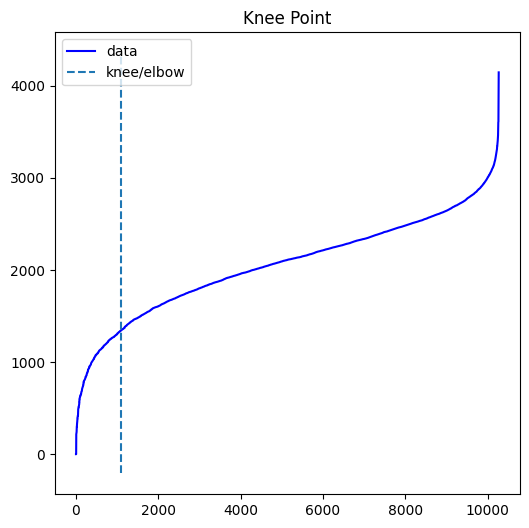

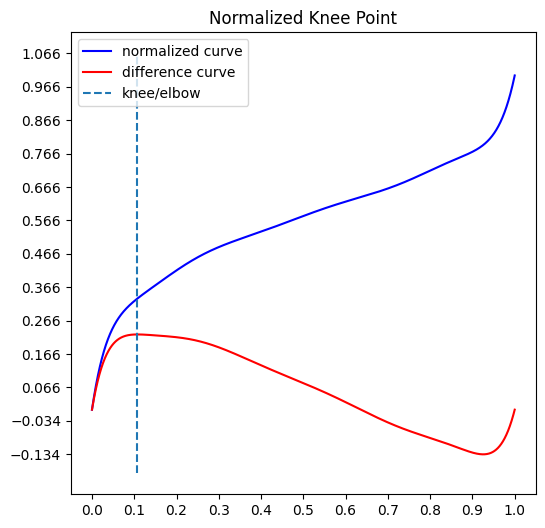

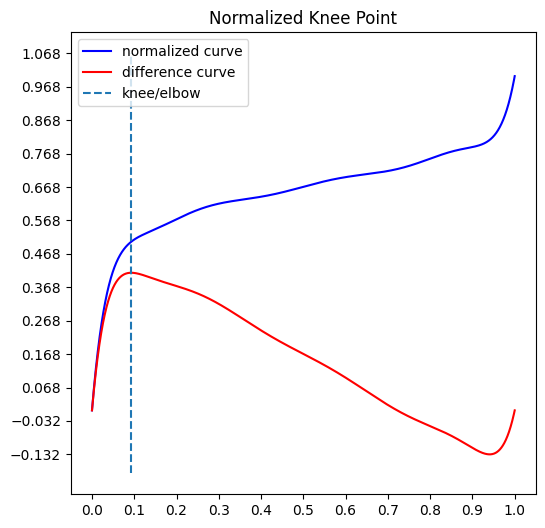

In [43]:
#eps_by_knee_dict = {}

for d in ['donor1','donor2','donor3']:
    donor = d
    for c in ['TRA','TRB','TRA_TRB']:
        chain=c
        
        #tcremb.tcremb_clonotypes(chain)
        #tcremb.tcremb_dists(chain)
        #tcremb.tcremb_pca(chain)
        #tcremb.tcremb_tsne(chain)
        
        eps_by_knee_dict[f'{d}_{c}']={}
    
        neighbors = 4
        nbrs = NearestNeighbors(n_neighbors=neighbors).fit(tcremb_dict[donor].pca_clones[chain].drop(tcremb_dict[donor].clonotype_id,axis=1))
        distances_1, indices = nbrs.kneighbors(tcremb_dict[donor].pca_clones[chain].drop(tcremb_dict[donor].clonotype_id,axis=1))
        distances = np.sort(distances_1, axis=0)
        distances = distances[:,1]
        #distances = distances[distances>1]
        
    
        eps_by_knee_dict[f'{d}_{c}']['max_pca_dist']=round(max(distances),2)
        eps_by_knee_dict[f'{d}_{c}']['mean_pca_dist']=round(np.mean(distances),2)
        eps_by_knee_dict[f'{d}_{c}']['median_pca_dist']=round(np.median(distances),2)
        eps_by_knee_dict[f'{d}_{c}']['clonotypes_count'] = str(len(tcremb_dict[donor].pca_clones[chain]))

        kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                              distances, # y values
                              S=1.0, #parameter suggested from paper
                              #curve="convex", #parameter from figure
                              curve="concave",
                              interp_method="polynomial",
                              online = True,
                              polynomial_degree=degree,
                              direction="increasing", ) #parameter from figure
    
        eps_by_knee_dict[f'{d}_{c}']['knee']=str(round(distances[kneedle.knee],2))
        eps_by_knee_dict[f'{d}_{c}']['all_knees']=list(kneedle.all_knees)
        eps_by_knee_dict[f'{d}_{c}']['donor']=d
        kneedle.plot_knee()
        kneedle.plot_knee_normalized()
        

In [44]:
pd.DataFrame(eps_by_knee_dict)

vdjdb_TRA vdjdb_TRB vdjdb_TRA_TRB donor1_TRA donor1_TRB  \
max_pca_dist       3712.63   4183.15       8122.67    4741.82    4718.82   
mean_pca_dist      1412.29   1664.57       3119.52    1920.64    2378.57   
median_pca_dist     1487.0   1766.72       3541.88    2024.78    2479.57   
clonotypes_count     11850     23948          5870       2454       2554   
knee                593.81   1224.04       3026.07    1540.94    1828.58   
all_knees              NaN       NaN           NaN      [681]      [411]   
donor                  NaN       NaN           NaN     donor1     donor1   

                 donor1_TRA_TRB donor2_TRA donor2_TRB donor2_TRA_TRB  \
max_pca_dist            6761.54    4639.12    4482.32        7291.02   
mean_pca_dist           3637.39    1934.27    2278.05        2991.24   
median_pca_dist         3852.95    2138.48    2471.22        3279.71   
clonotypes_count           2319       2163       2257           1974   
knee                    2924.33    1653.67    1915.59        2353.98   
all_knees              [1, 389]   [1, 679]      [564]      [621, 86]   
donor                    donor1     donor2     donor2         donor2   

                 donor3_TRA donor3_TRB donor3_TRA_TRB  
max_pca_dist         3725.2    4145.33        7151.94  
mean_pca_dist       1618.36     2057.7        3520.73  
median_pca_dist     1686.97    2109.91        3601.88  
clonotypes_count       9074      10265           8903  
knee                 704.77    1348.12        2736.57  
all_knees             [905]     [1105]          [827]  
donor                donor3     donor3         donor3

In [58]:
method = 'dbscan_eps_donors'

In [59]:
coef = 0.85

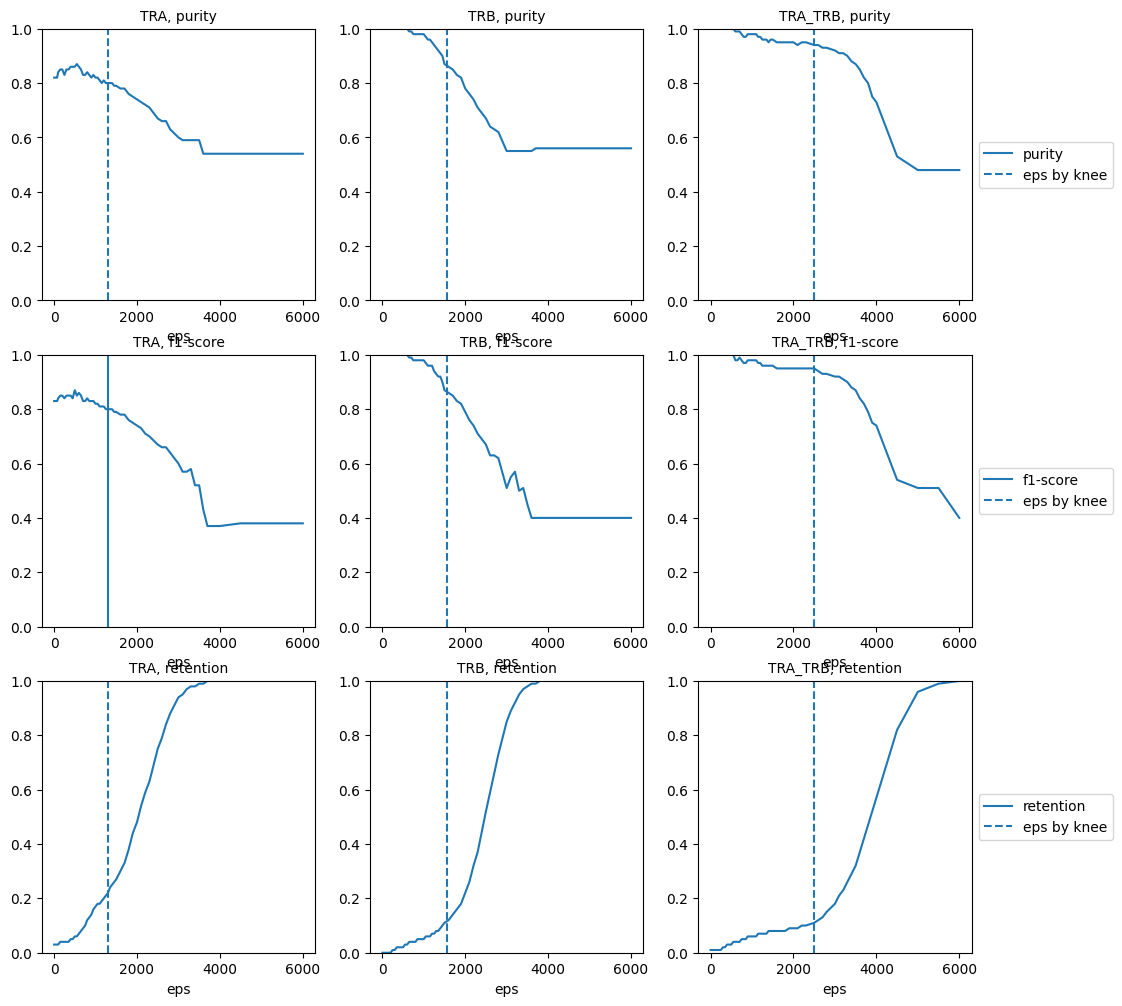

In [60]:
donor='donor1'

fig, ax = plt.subplots(3,3,figsize=(12, 12))

chain = 'TRA'
metrics_df = pd.DataFrame(metrics_tcremb[method][donor][chain]).T
m = 'purity'
ax[0,0].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[0,0].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,0].set_xlabel('eps')
ax[0,0].set_ylim([0,1])
ax[0,0].set_title(f'{chain}, {m}', fontsize=10)

m = 'f1-score'
ax[1,0].plot(metrics_df['eps'],metrics_df[m], label=m)
ax[1,0].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef, label='eps by knee')
ax[1,0].set_xlabel('eps')
ax[1,0].set_ylim([0,1])
ax[1,0].set_title(f'{chain}, {m}', fontsize=10)

m='retention'
ax[2,0].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[2,0].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,0].set_xlabel('eps')
ax[2,0].set_ylim([0,1])
ax[2,0].set_title(f'{chain}, {m}', fontsize=10)


chain = 'TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][donor][chain]).T
m = 'purity'
ax[0,1].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[0,1].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,1].set_xlabel('eps')
ax[0,1].set_ylim([0,1])
ax[0,1].set_title(f'{chain}, {m}', fontsize=10)

m = 'f1-score'
ax[1,1].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[1,1].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[1,1].set_xlabel('eps')
ax[1,1].set_ylim([0,1])
ax[1,1].set_title(f'{chain}, {m}', fontsize=10)

m='retention'
ax[2,1].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[2,1].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,1].set_xlabel('eps')
ax[2,1].set_ylim([0,1])
ax[2,1].set_title(f'{chain}, {m}', fontsize=10)

chain = 'TRA_TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][donor][chain]).T
m = 'purity'
ax[0,2].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[0,2].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,2].set_xlabel('eps')
ax[0,2].set_ylim([0,1])
ax[0,2].set_title(f'{chain}, {m}', fontsize=10)
ax[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

m = 'f1-score'
ax[1,2].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[1,2].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[1,2].set_xlabel('eps')
ax[1,2].set_ylim([0,1])
ax[1,2].set_title(f'{chain}, {m}', fontsize=10)
ax[1,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

m='retention'
ax[2,2].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[2,2].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,2].set_xlabel('eps')
ax[2,2].set_ylim([0,1])
ax[2,2].set_title(f'{chain}, {m}', fontsize=10)
ax[2,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.savefig(f"results/figures/tcremb_compare_{method}_{donor}.png")



In [61]:
donor='donor2'

fig, ax = plt.subplots(3,3,figsize=(12, 12))

chain = 'TRA'
metrics_df = pd.DataFrame(metrics_tcremb[method][donor][chain]).T
m = 'purity'
ax[0,0].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[0,0].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,0].set_xlabel('eps')
ax[0,0].set_ylim([0,1])
ax[0,0].set_title(f'{chain}, {m}', fontsize=10)

m = 'f1-score'
ax[1,0].plot(metrics_df['eps'],metrics_df[m], label=m)
ax[1,0].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef, label='eps by knee')
ax[1,0].set_xlabel('eps')
ax[1,0].set_ylim([0,1])
ax[1,0].set_title(f'{chain}, {m}', fontsize=10)

m='retention'
ax[2,0].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[2,0].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,0].set_xlabel('eps')
ax[2,0].set_ylim([0,1])
ax[2,0].set_title(f'{chain}, {m}', fontsize=10)


chain = 'TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][donor][chain]).T
m = 'purity'
ax[0,1].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[0,1].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,1].set_xlabel('eps')
ax[0,1].set_ylim([0,1])
ax[0,1].set_title(f'{chain}, {m}', fontsize=10)

m = 'f1-score'
ax[1,1].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[1,1].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[1,1].set_xlabel('eps')
ax[1,1].set_ylim([0,1])
ax[1,1].set_title(f'{chain}, {m}', fontsize=10)

m='retention'
ax[2,1].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[2,1].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,1].set_xlabel('eps')
ax[2,1].set_ylim([0,1])
ax[2,1].set_title(f'{chain}, {m}', fontsize=10)

chain = 'TRA_TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][donor][chain]).T
m = 'purity'
ax[0,2].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[0,2].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,2].set_xlabel('eps')
ax[0,2].set_ylim([0,1])
ax[0,2].set_title(f'{chain}, {m}', fontsize=10)
ax[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

m = 'f1-score'
ax[1,2].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[1,2].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[1,2].set_xlabel('eps')
ax[1,2].set_ylim([0,1])
ax[1,2].set_title(f'{chain}, {m}', fontsize=10)
ax[1,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

m='retention'
ax[2,2].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[2,2].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,2].set_xlabel('eps')
ax[2,2].set_ylim([0,1])
ax[2,2].set_title(f'{chain}, {m}', fontsize=10)
ax[2,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.savefig(f"results/figures/tcremb_compare_{method}_{donor}.png")



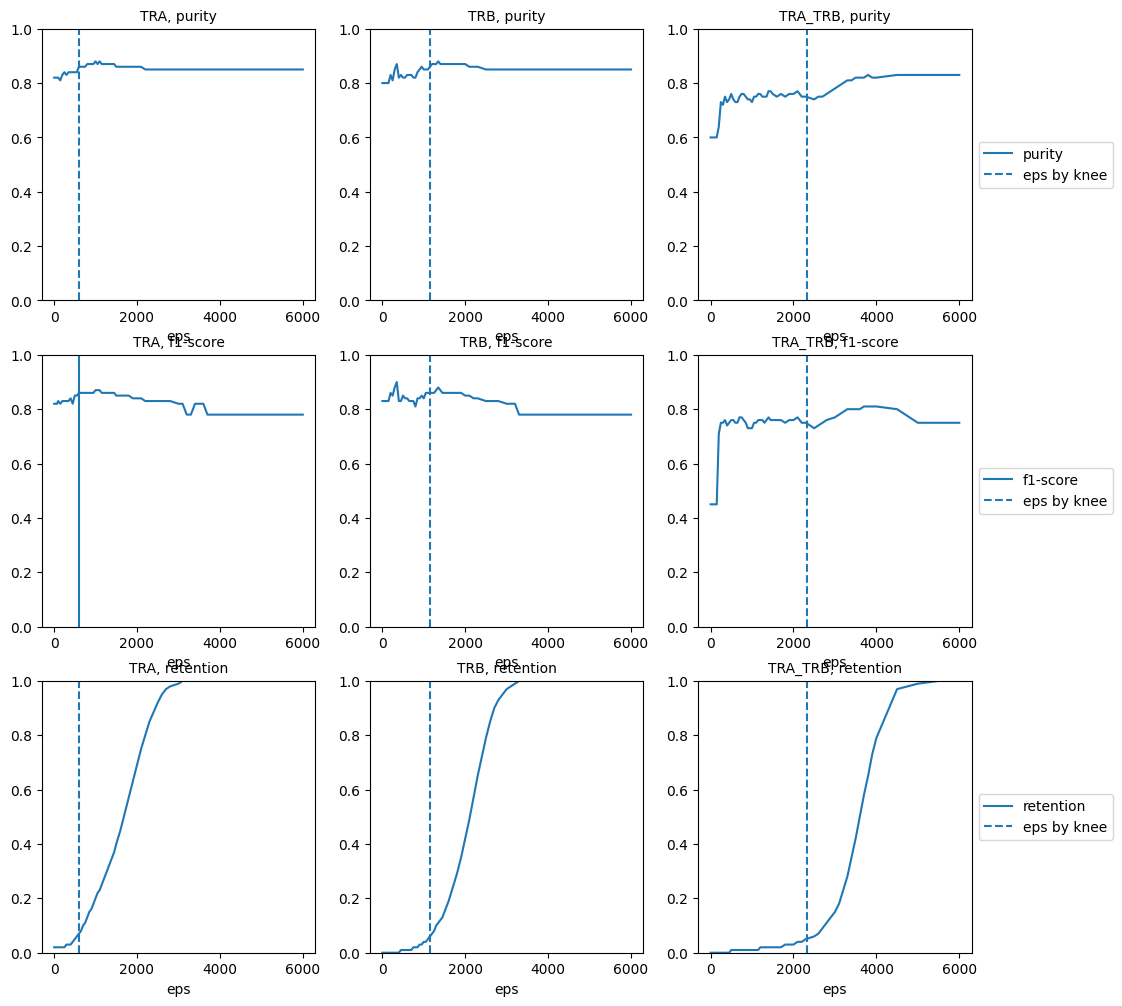

In [62]:
donor='donor3'

fig, ax = plt.subplots(3,3,figsize=(12, 12))

chain = 'TRA'
metrics_df = pd.DataFrame(metrics_tcremb[method][donor][chain]).T
m = 'purity'
ax[0,0].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[0,0].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,0].set_xlabel('eps')
ax[0,0].set_ylim([0,1])
ax[0,0].set_title(f'{chain}, {m}', fontsize=10)

m = 'f1-score'
ax[1,0].plot(metrics_df['eps'],metrics_df[m], label=m)
ax[1,0].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef, label='eps by knee')
ax[1,0].set_xlabel('eps')
ax[1,0].set_ylim([0,1])
ax[1,0].set_title(f'{chain}, {m}', fontsize=10)

m='retention'
ax[2,0].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[2,0].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,0].set_xlabel('eps')
ax[2,0].set_ylim([0,1])
ax[2,0].set_title(f'{chain}, {m}', fontsize=10)


chain = 'TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][donor][chain]).T
m = 'purity'
ax[0,1].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[0,1].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,1].set_xlabel('eps')
ax[0,1].set_ylim([0,1])
ax[0,1].set_title(f'{chain}, {m}', fontsize=10)

m = 'f1-score'
ax[1,1].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[1,1].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[1,1].set_xlabel('eps')
ax[1,1].set_ylim([0,1])
ax[1,1].set_title(f'{chain}, {m}', fontsize=10)

m='retention'
ax[2,1].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[2,1].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,1].set_xlabel('eps')
ax[2,1].set_ylim([0,1])
ax[2,1].set_title(f'{chain}, {m}', fontsize=10)

chain = 'TRA_TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][donor][chain]).T
m = 'purity'
ax[0,2].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[0,2].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[0,2].set_xlabel('eps')
ax[0,2].set_ylim([0,1])
ax[0,2].set_title(f'{chain}, {m}', fontsize=10)
ax[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

m = 'f1-score'
ax[1,2].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[1,2].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[1,2].set_xlabel('eps')
ax[1,2].set_ylim([0,1])
ax[1,2].set_title(f'{chain}, {m}', fontsize=10)
ax[1,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

m='retention'
ax[2,2].plot(metrics_df['eps'],metrics_df[m],label=m)
ax[2,2].axvline(x=float(eps_by_knee_dict[f'{donor}_{chain}']['knee'])*coef,linestyle='dashed', label='eps by knee')
ax[2,2].set_xlabel('eps')
ax[2,2].set_ylim([0,1])
ax[2,2].set_title(f'{chain}, {m}', fontsize=10)
ax[2,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))


fig.savefig(f"results/figures/tcremb_compare_{method}_{donor}.png")



In [ ]:
pd.DataFrame(eps_by_knee_dict)

### Kmeans n_clusters

In [13]:
method = 'kmeans'
metrics_tcremb[method]={}

In [ ]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


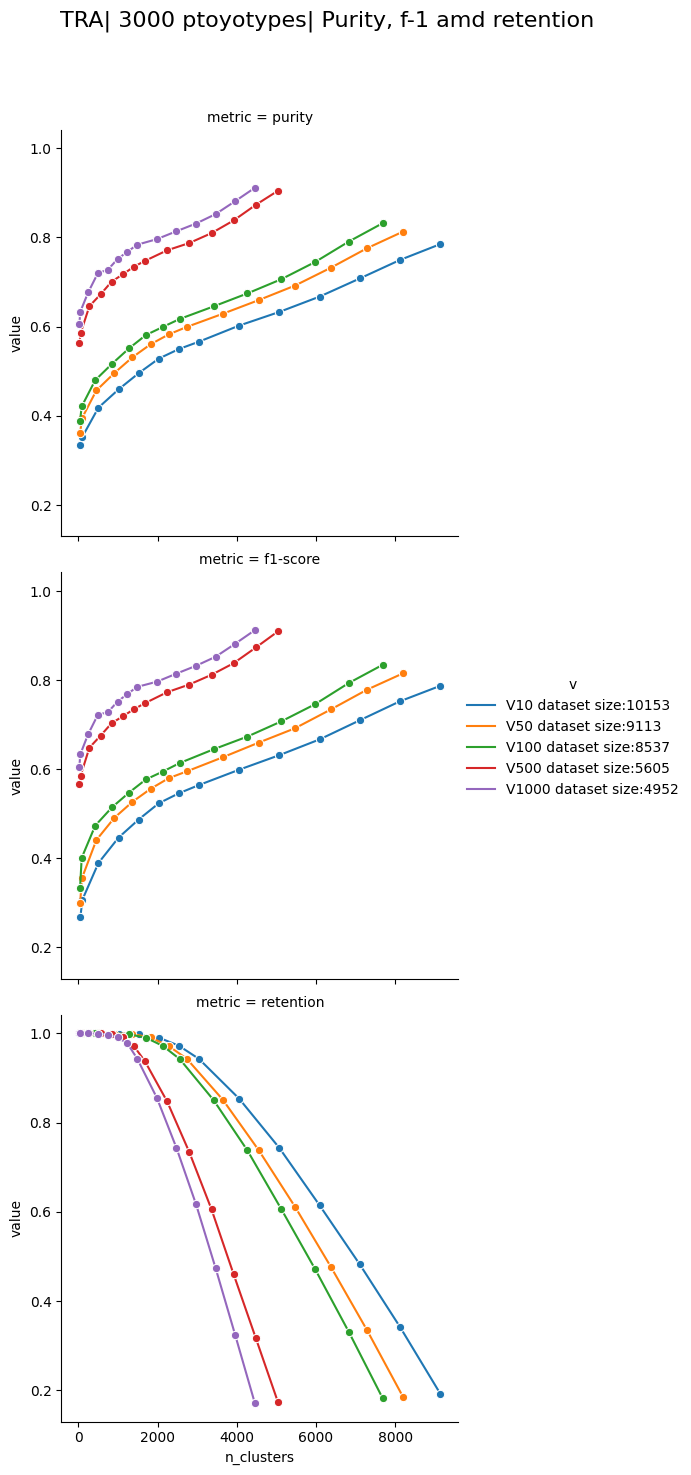

In [15]:
chain = 'TRA'
n_prototypes=3000
method = 'kmeans'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][chain][f'{i}_{j}']['v']=f'V{i} dataset size:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


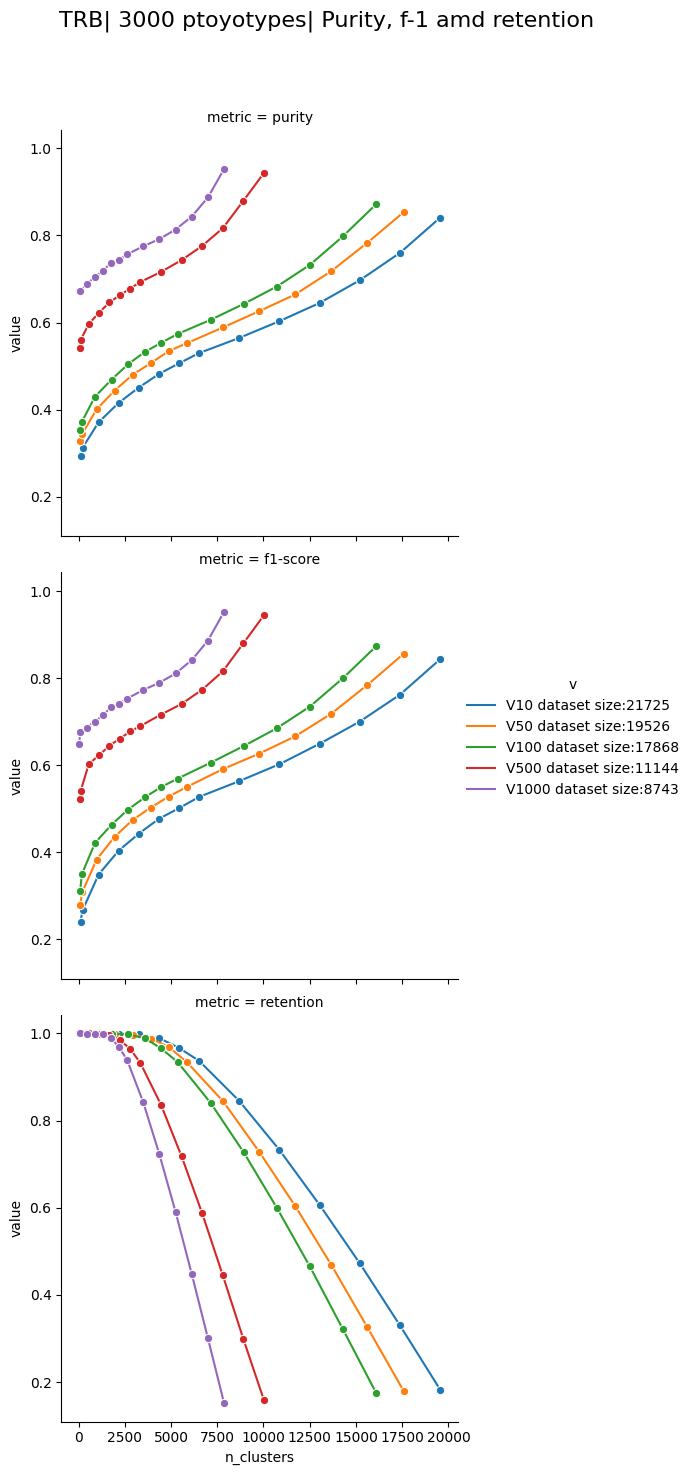

In [17]:
chain = 'TRB'
n_prototypes=3000
method = 'kmeans'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"fresults/igures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:
#method = 'kmeans'
#metrics_tcremb[method]={}

In [13]:
n_prototypes = 100
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


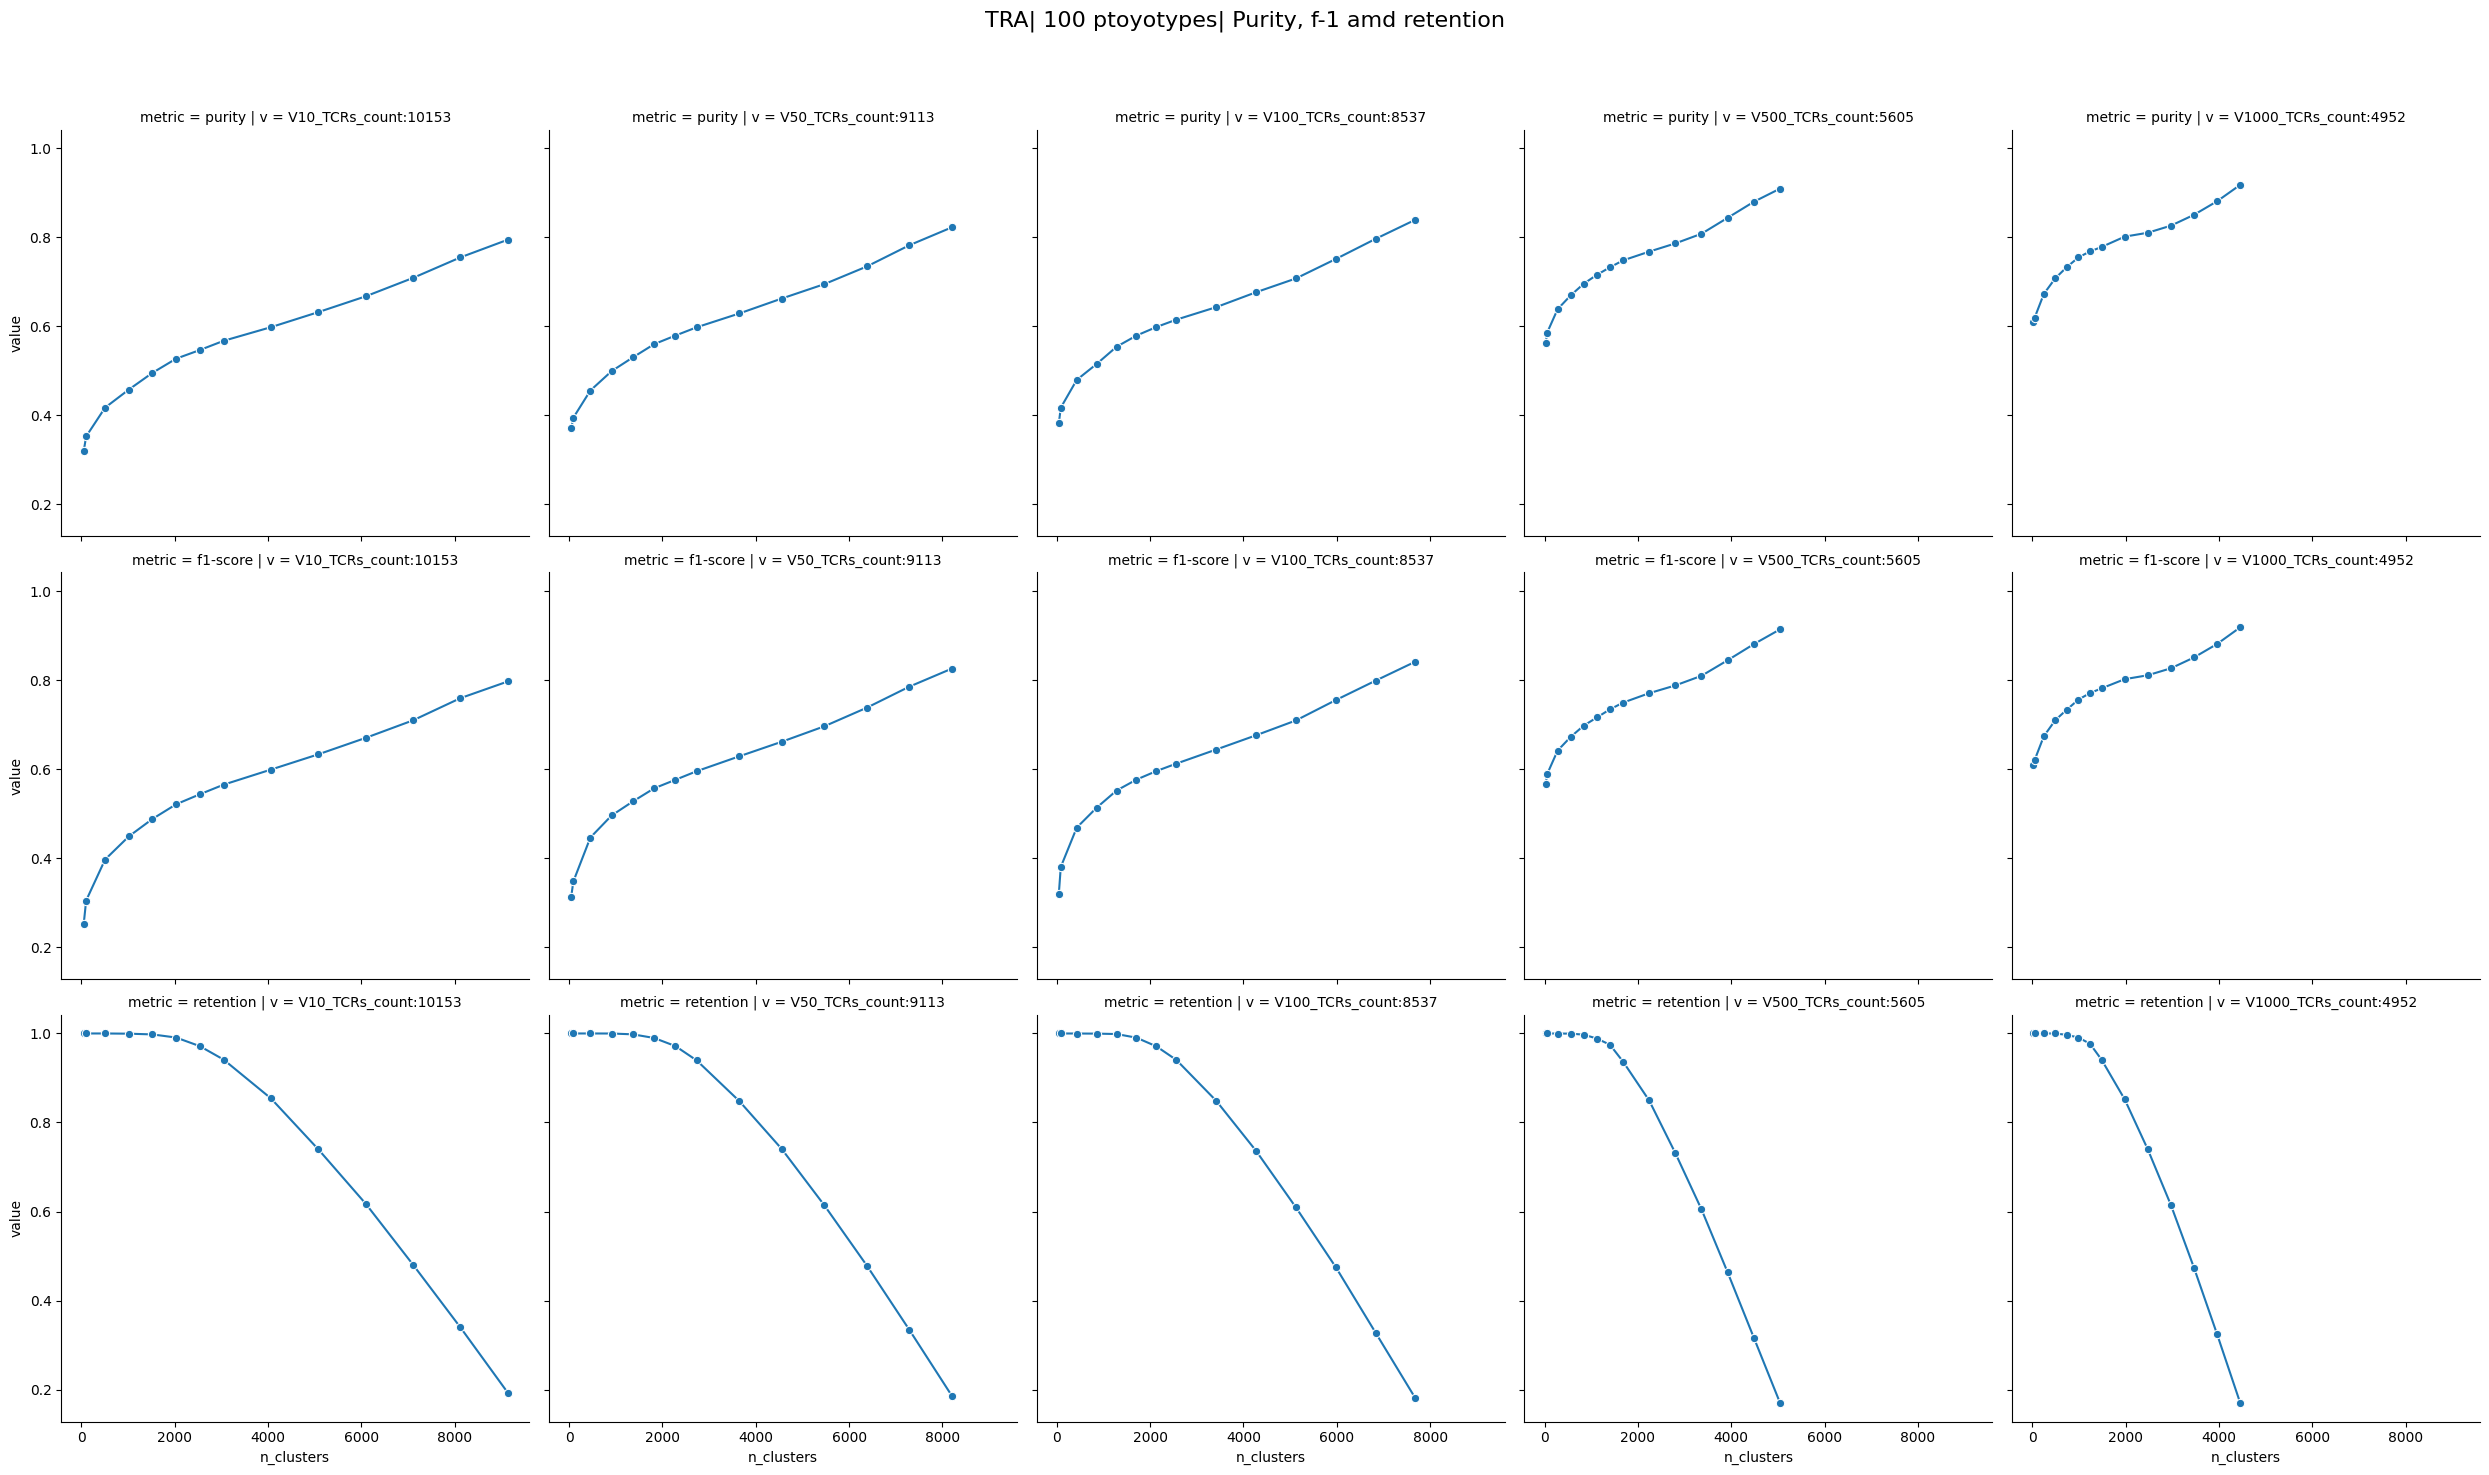

In [15]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


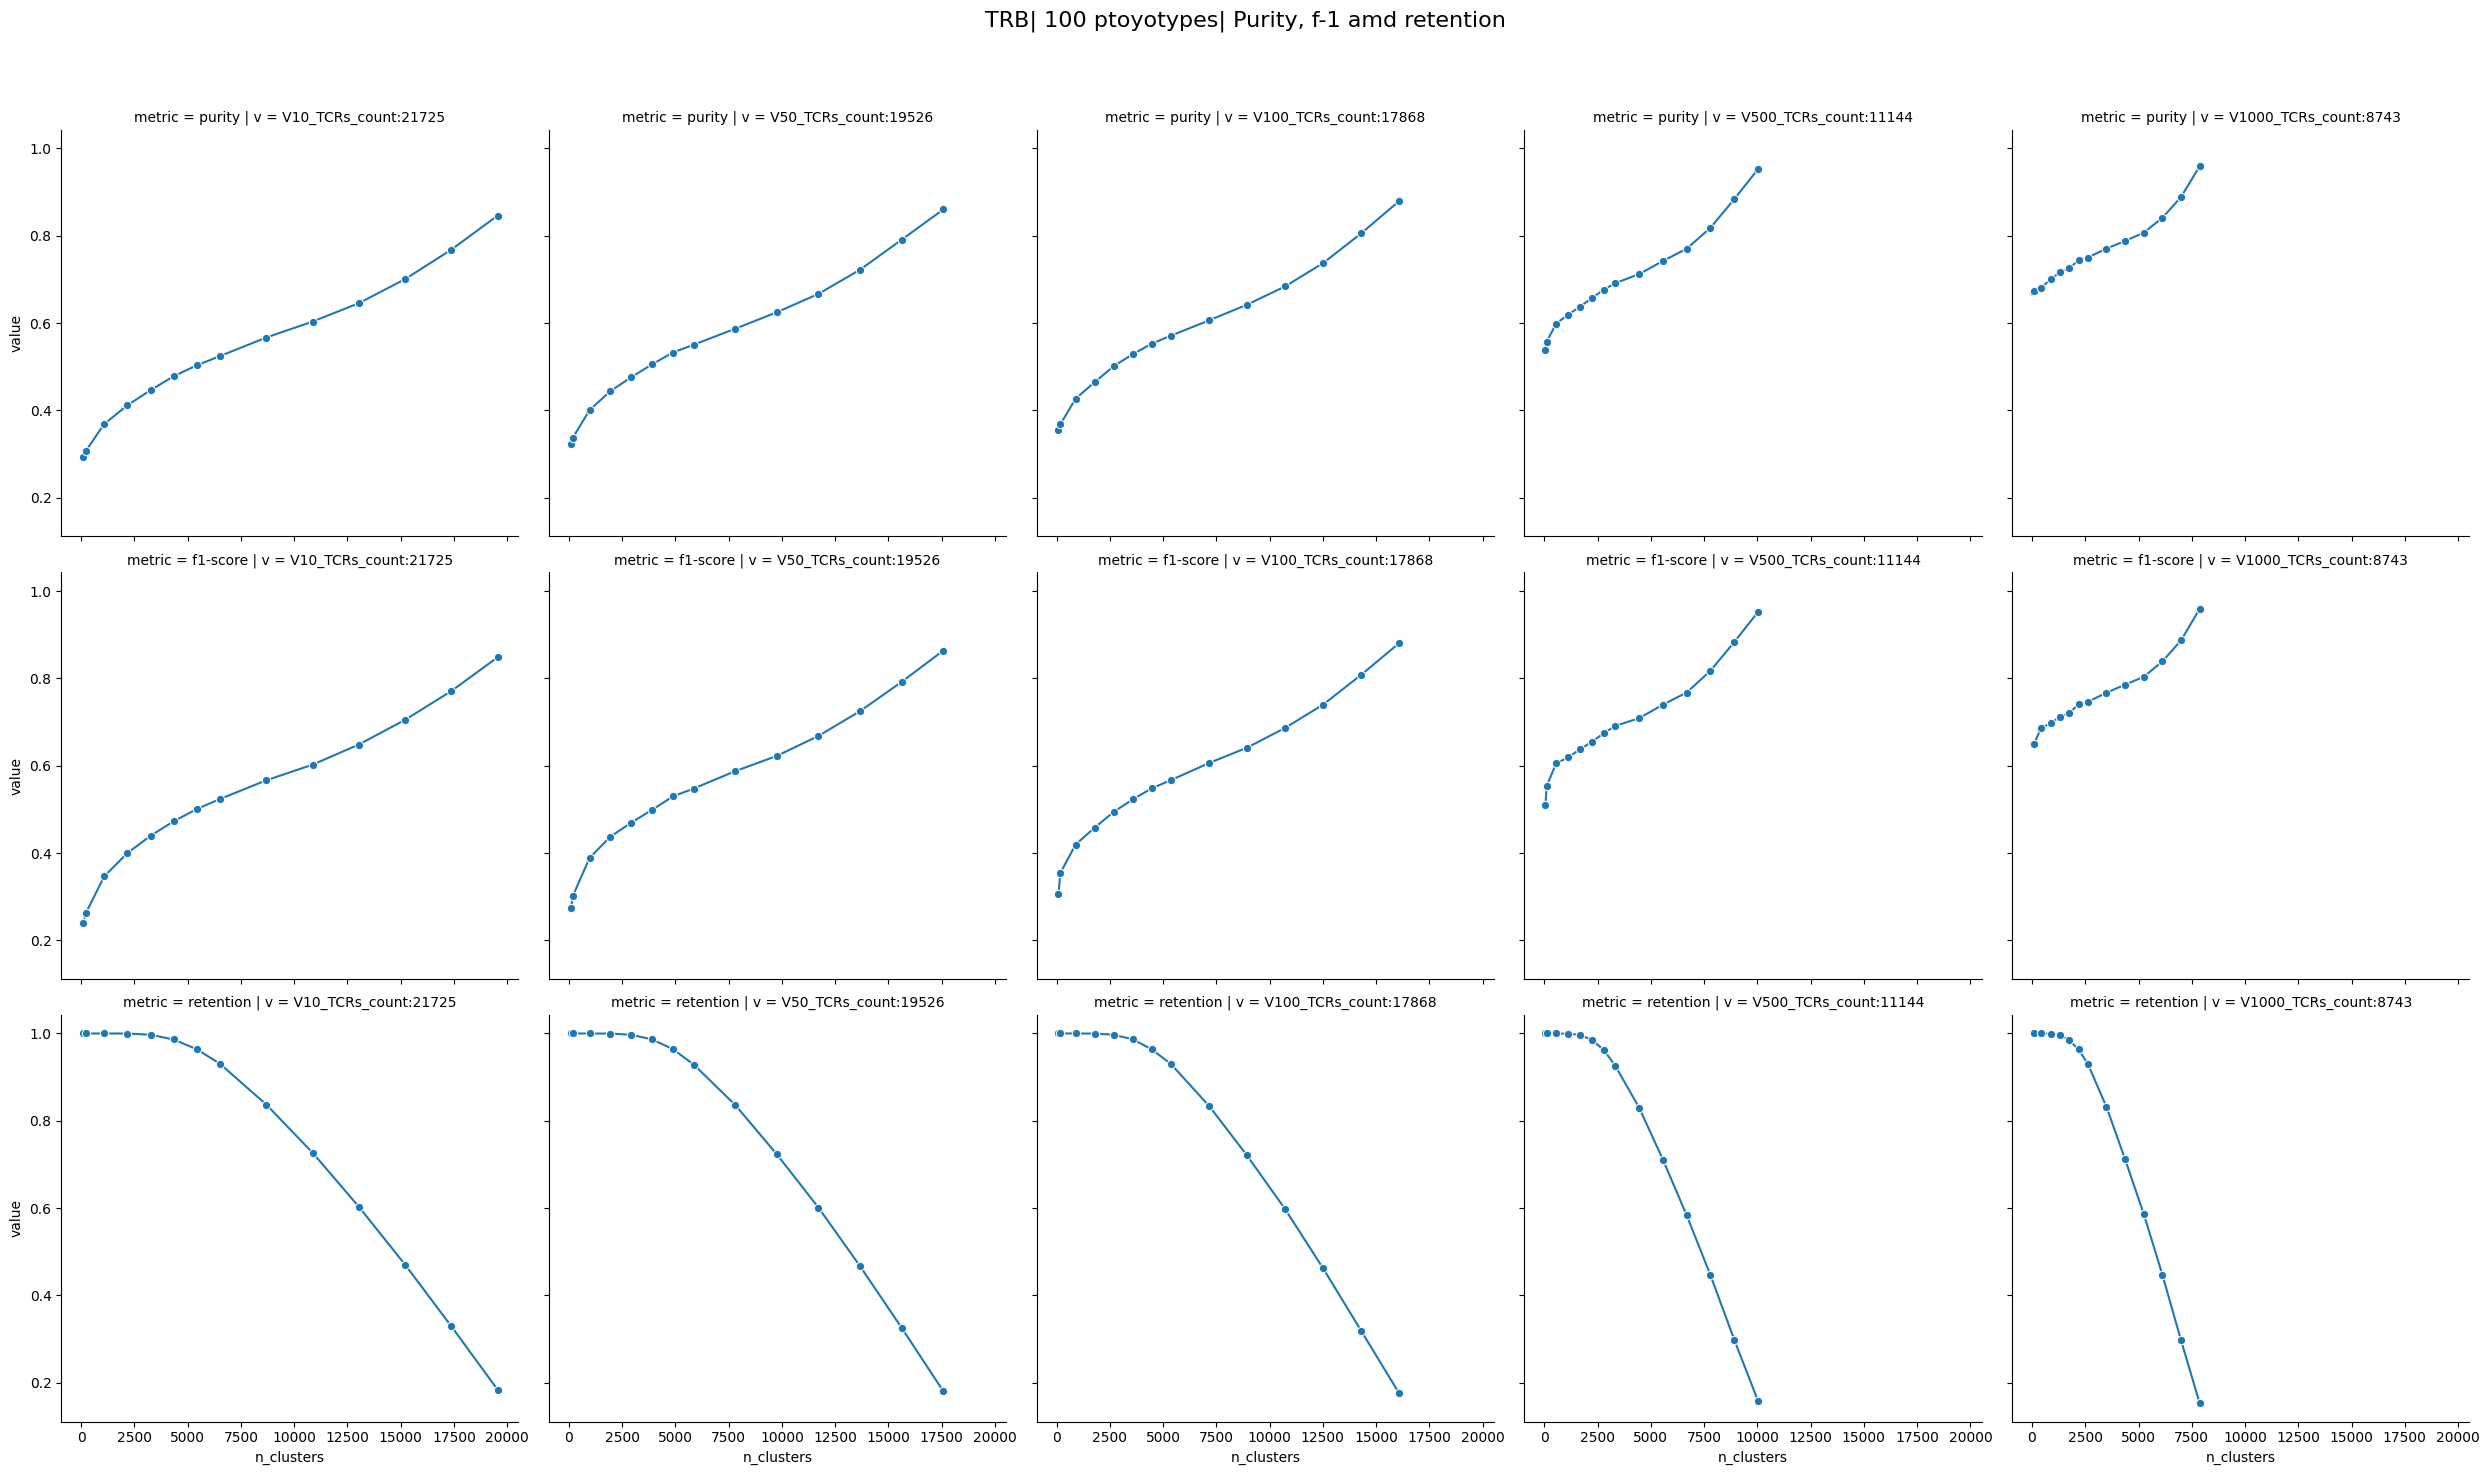

In [17]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [18]:
n_prototypes = 1000
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


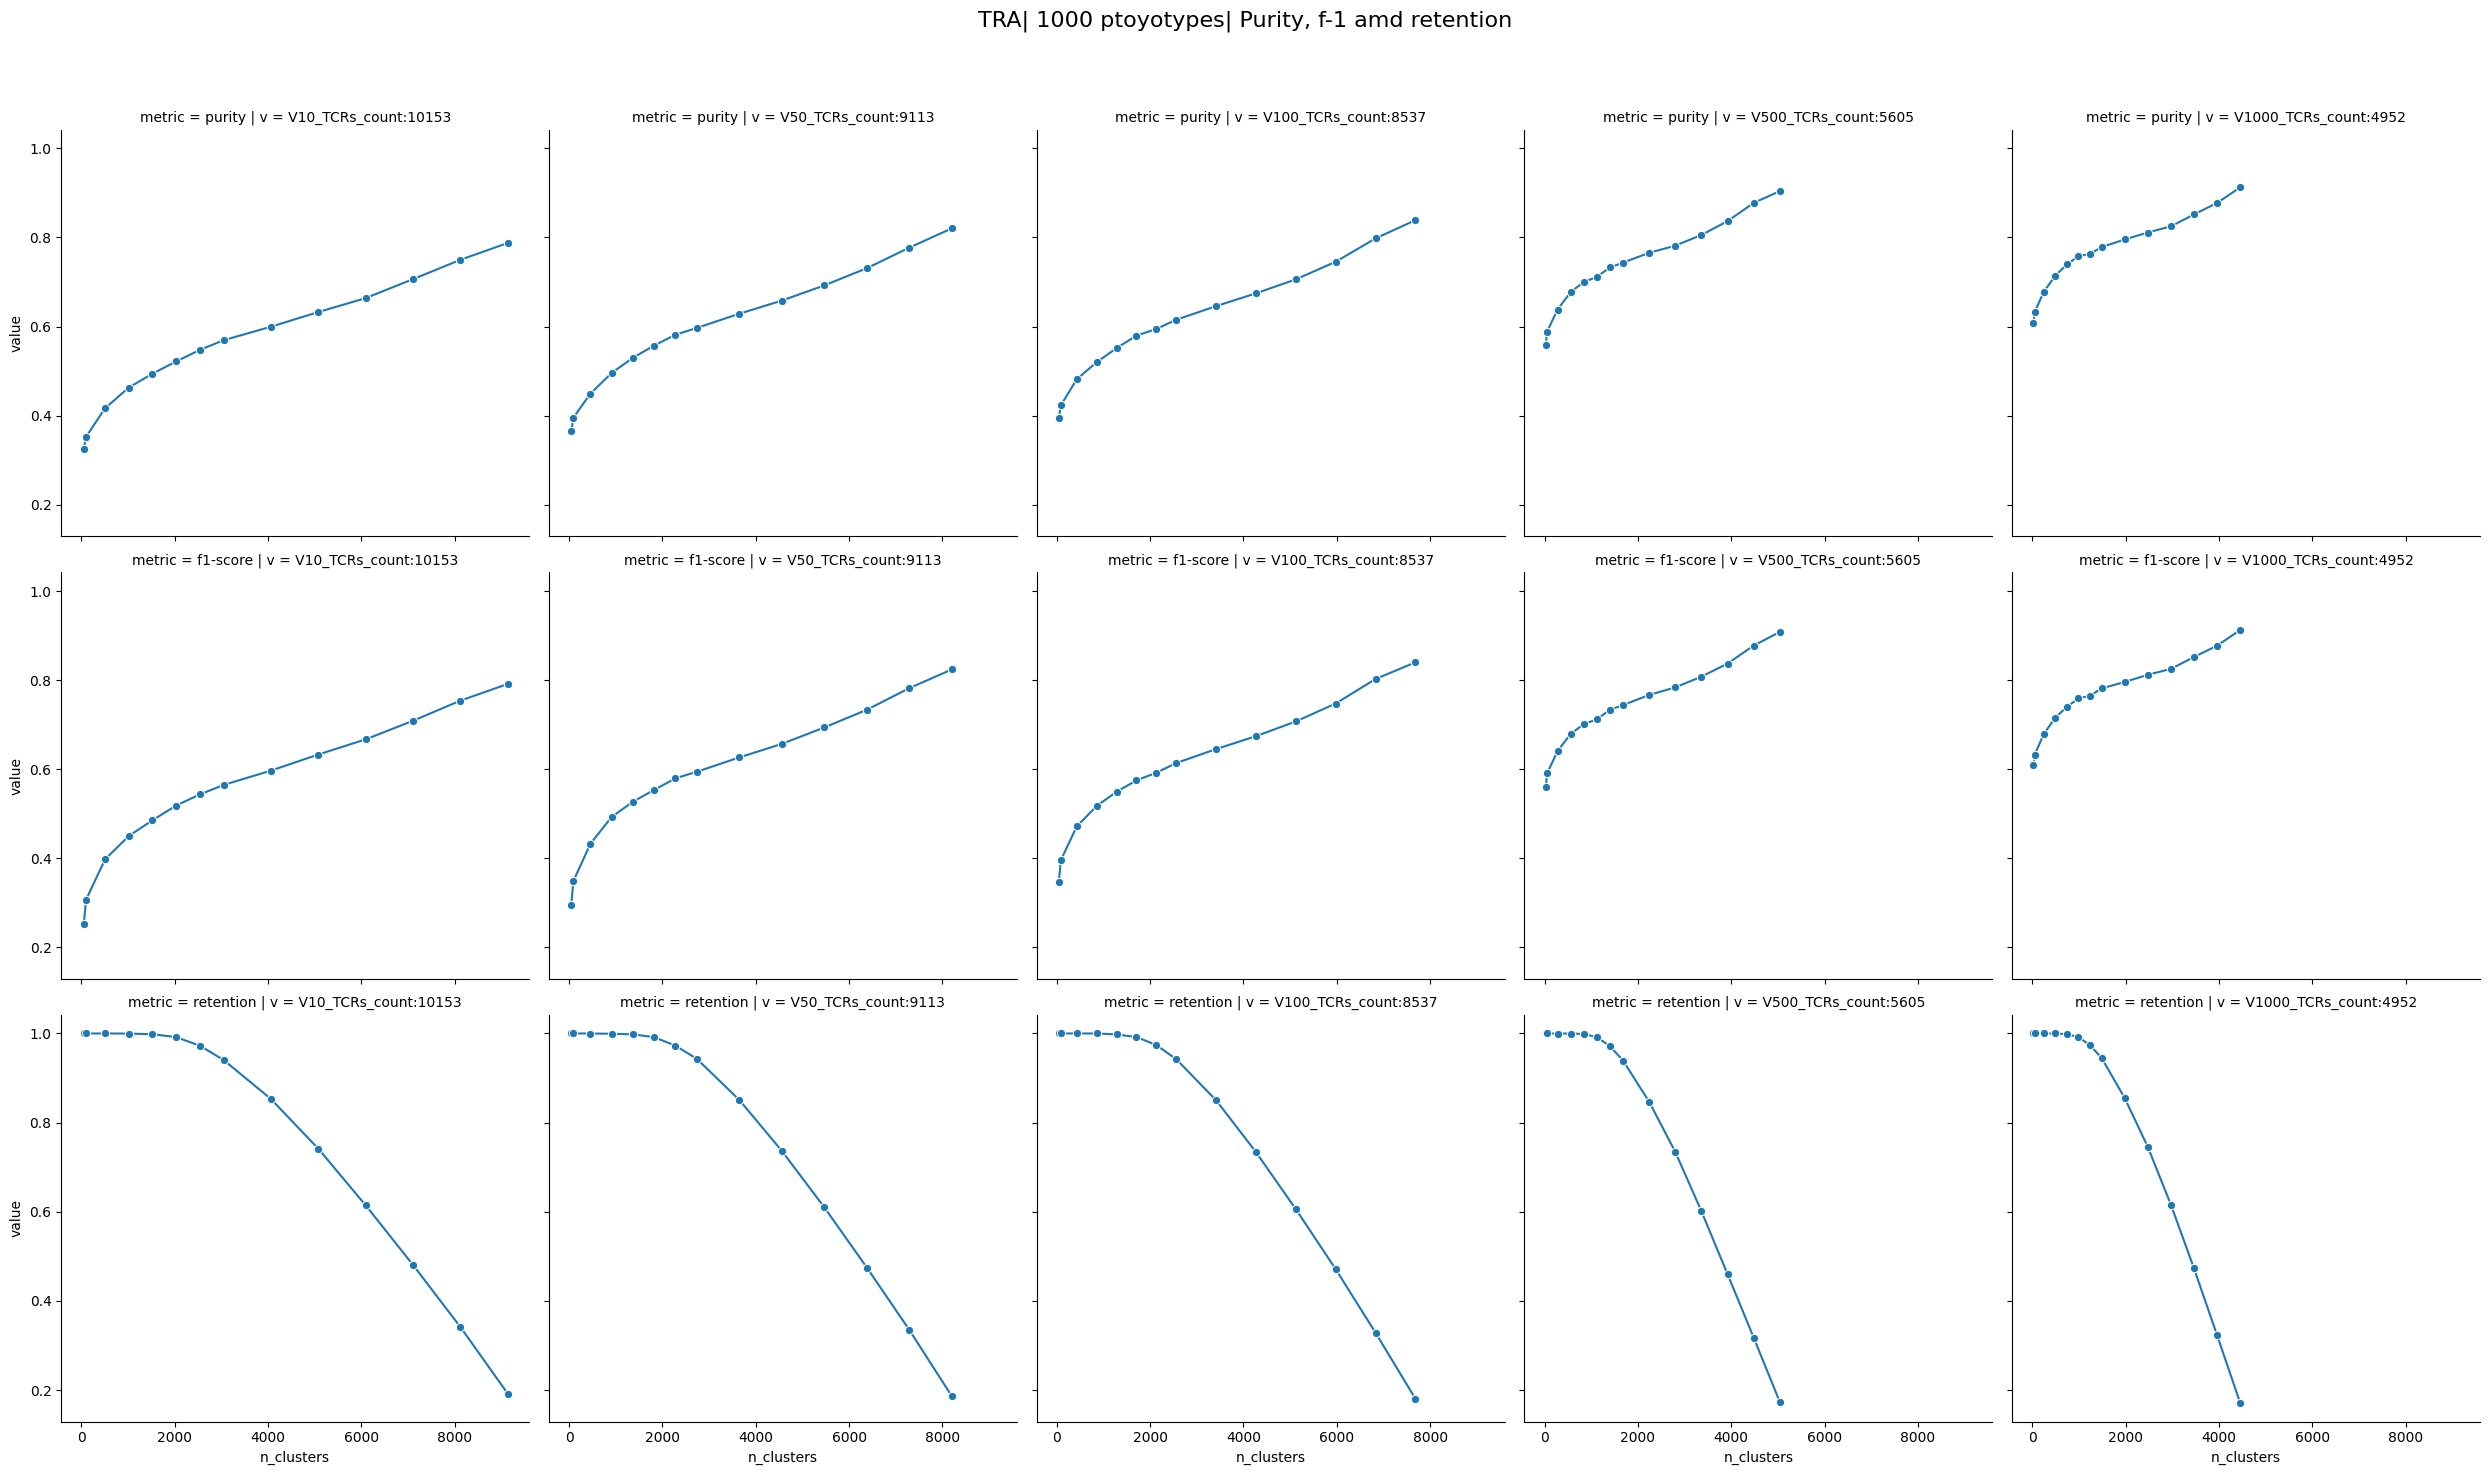

In [20]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


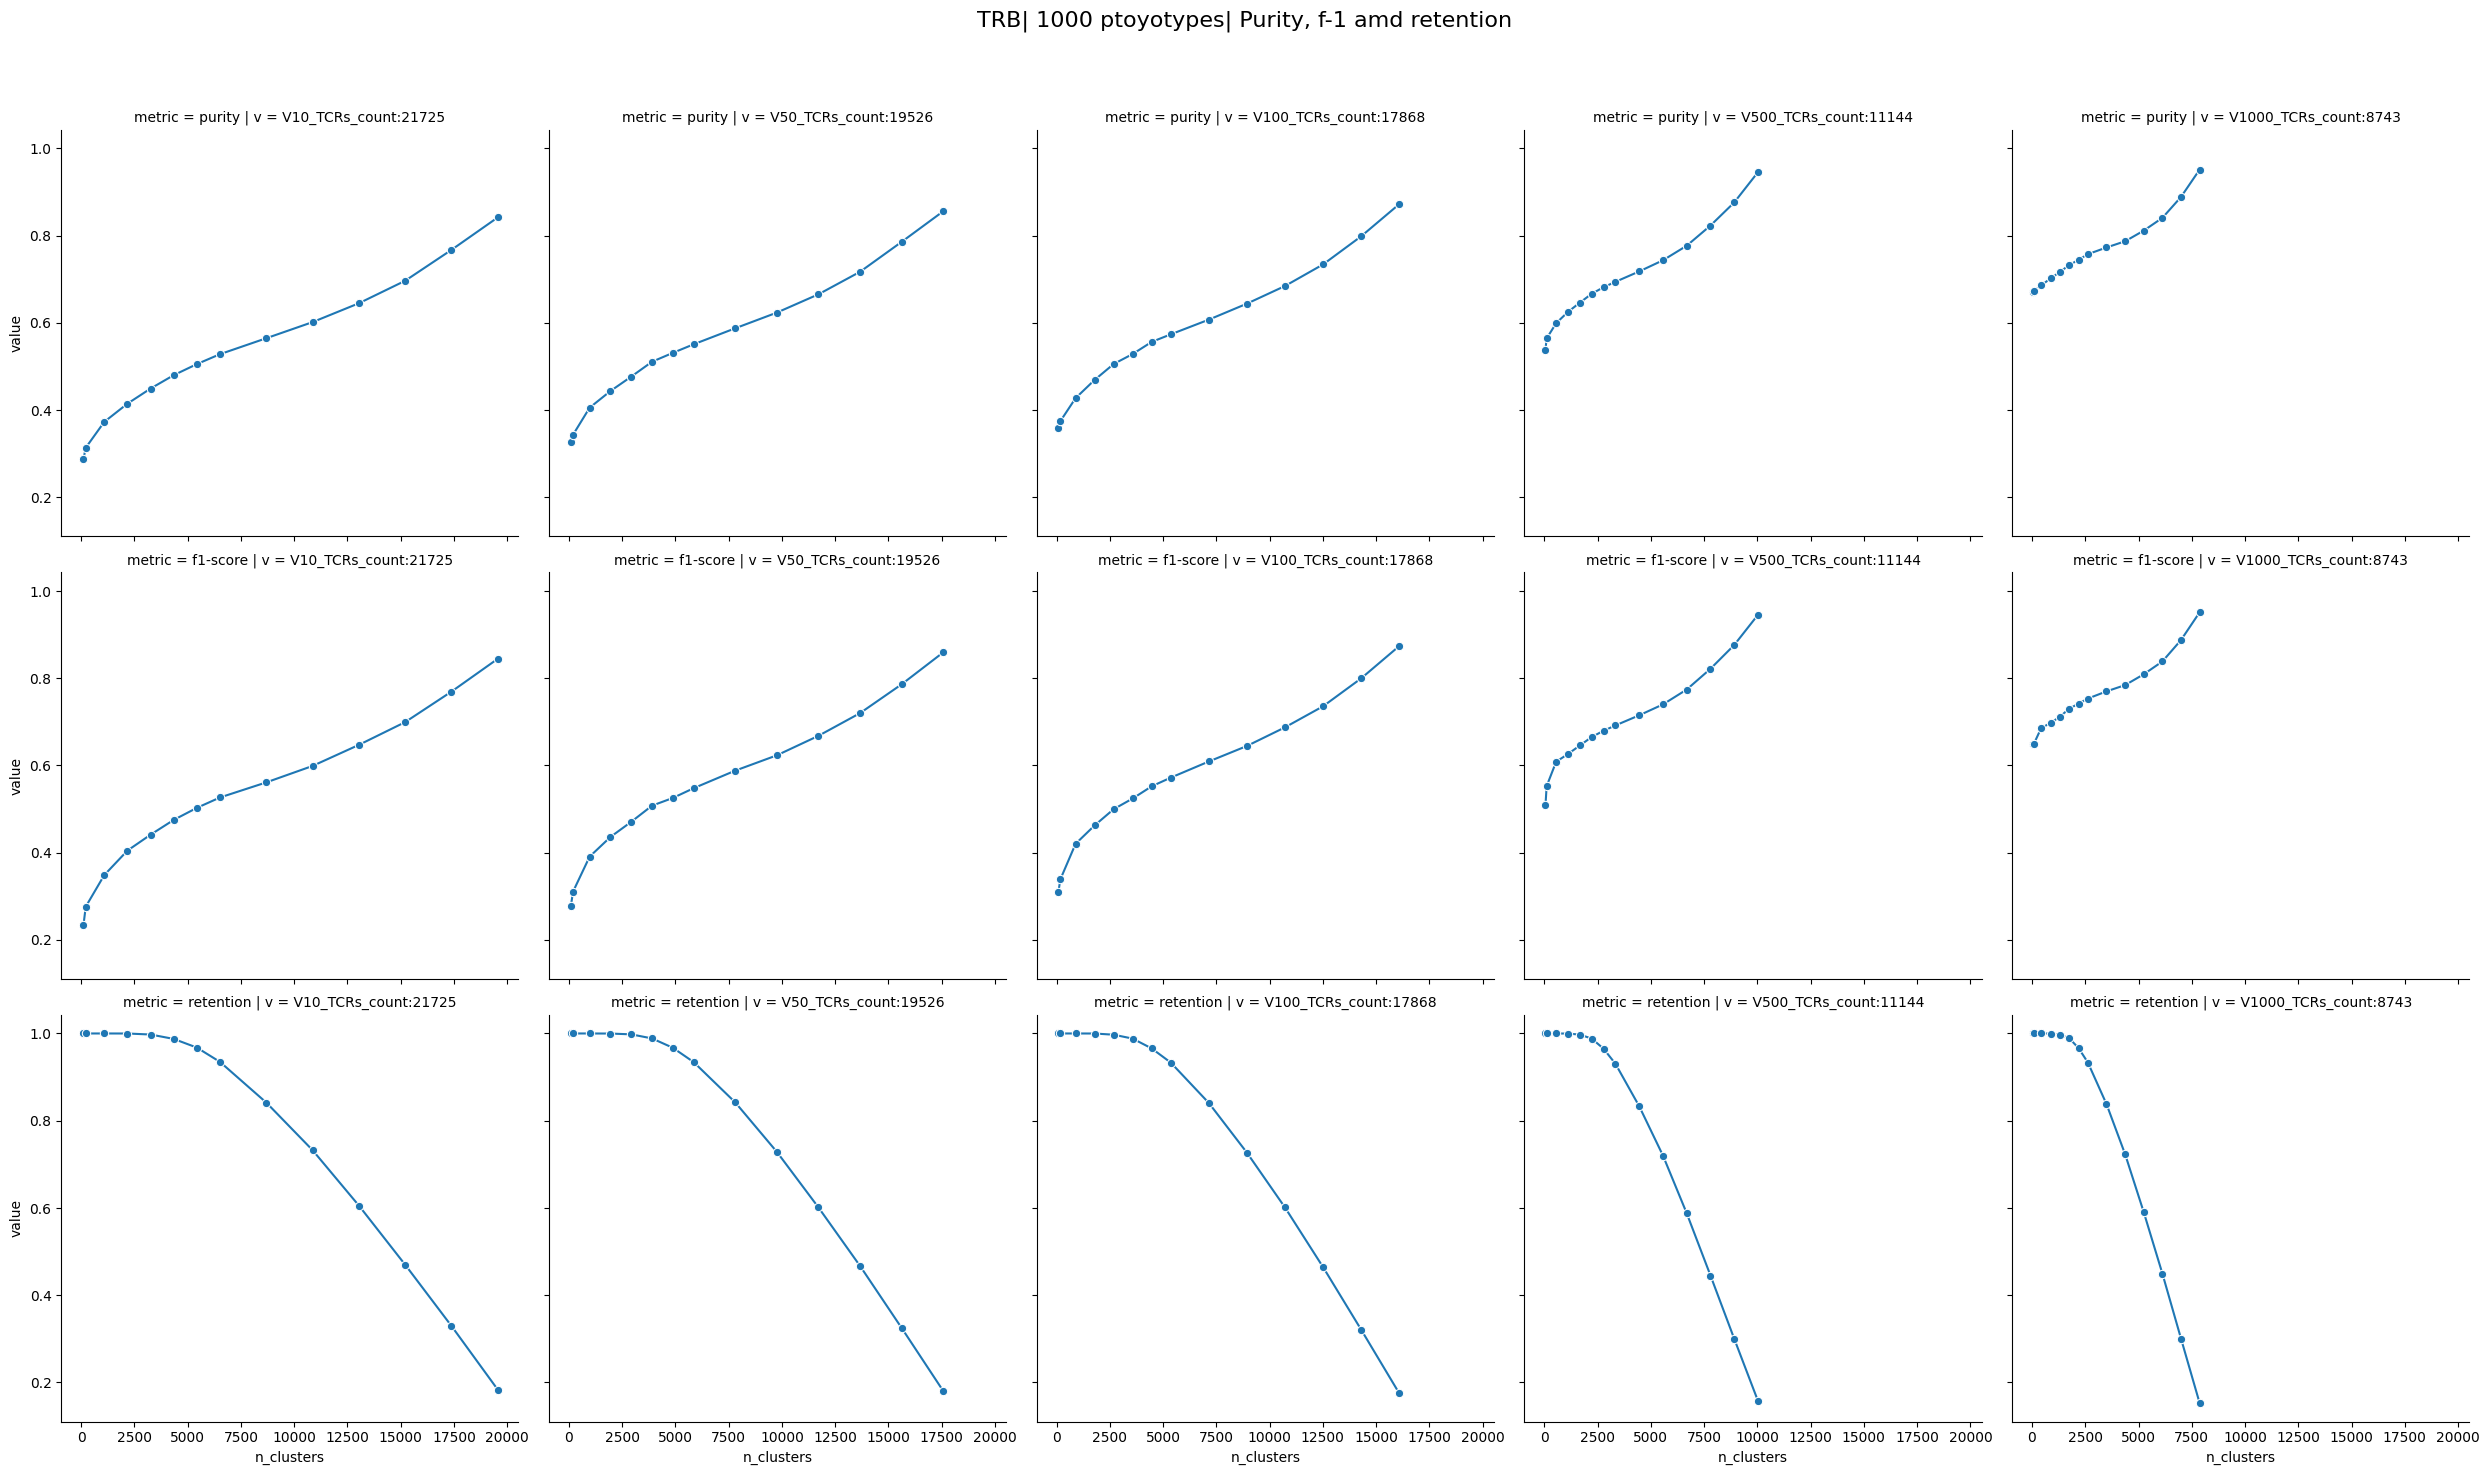

In [22]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [23]:
n_prototypes = 5000
metrics_tcremb[method][n_prototypes]={}

In [ ]:


chain = 'TRA'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


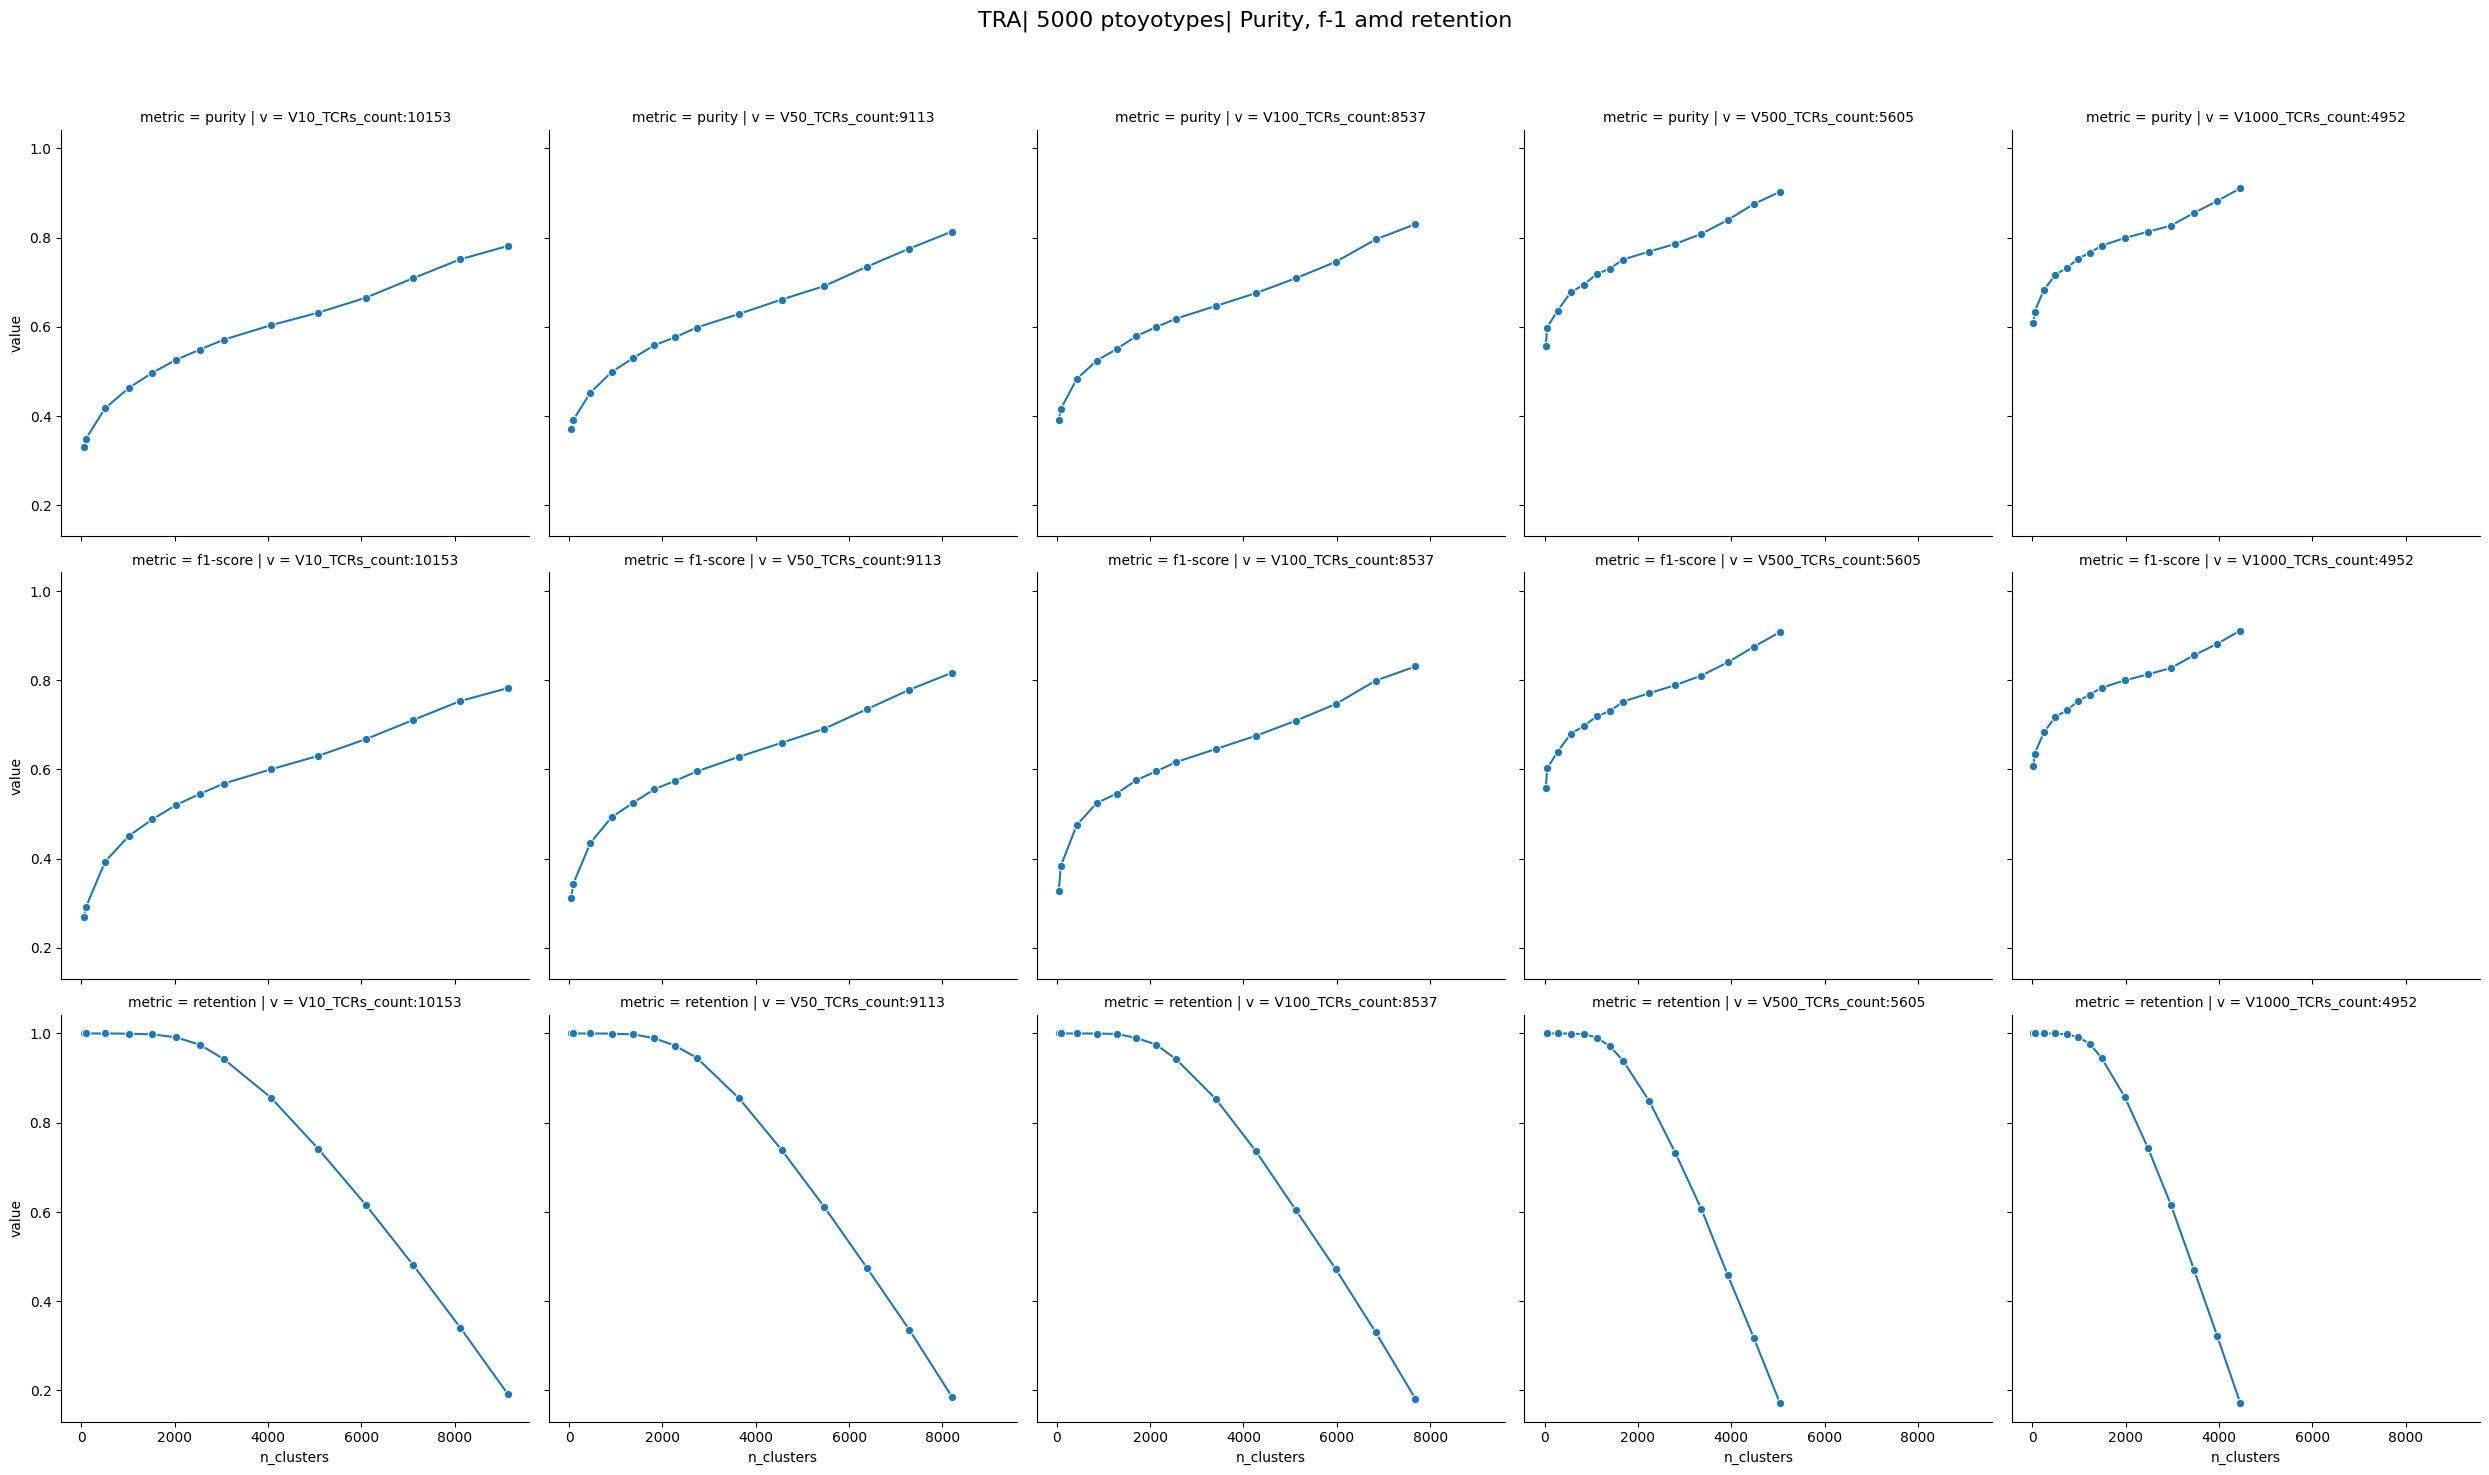

In [25]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

In [ ]:


chain = 'TRB'
metrics_tcremb[method][n_prototypes][chain]={}
for i in samples_n:
    run_name = f'compare_V{i}_{n_prototypes}'
    v_path = f'data/data_preped/VDJdb_data_{chain}_V{i}.csv'
    vdjdb_v = pd.read_csv(v_path,sep='\t')
    print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
    print(v_path)
    
    tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
    tcremb.tcremb_clonotypes(chain)
    tcremb.tcremb_dists(chain)
    tcremb.tcremb_pca(chain)
    tcremb.tcremb_tsne(chain)
    
    data_len = len(tcremb.pca_clones[chain])
    
    range_n_clusters = [round(data_len*0.005),round(data_len*0.01), round(data_len*0.05) , round(data_len*0.1), round(data_len*0.15)                    
                        ,round(data_len*0.2), round(data_len*0.25), round(data_len*0.3)
                        , round(data_len*0.4), round(data_len*0.5), round(data_len*0.6), round(data_len*0.7), round(data_len*0.8), round(data_len*0.9)]
    
    for j in range_n_clusters:
        dbscan = TCRemb.TCRemb_clustering(method)
        model = KMeans(n_clusters=j)
        dbscan.clstr(chain,tcremb, label, model=model)
        t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}'] = metrics.get_clustermetrics(t, label)
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['n_clusters']=j
        metrics_tcremb[method][n_prototypes][chain][f'{i}_{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


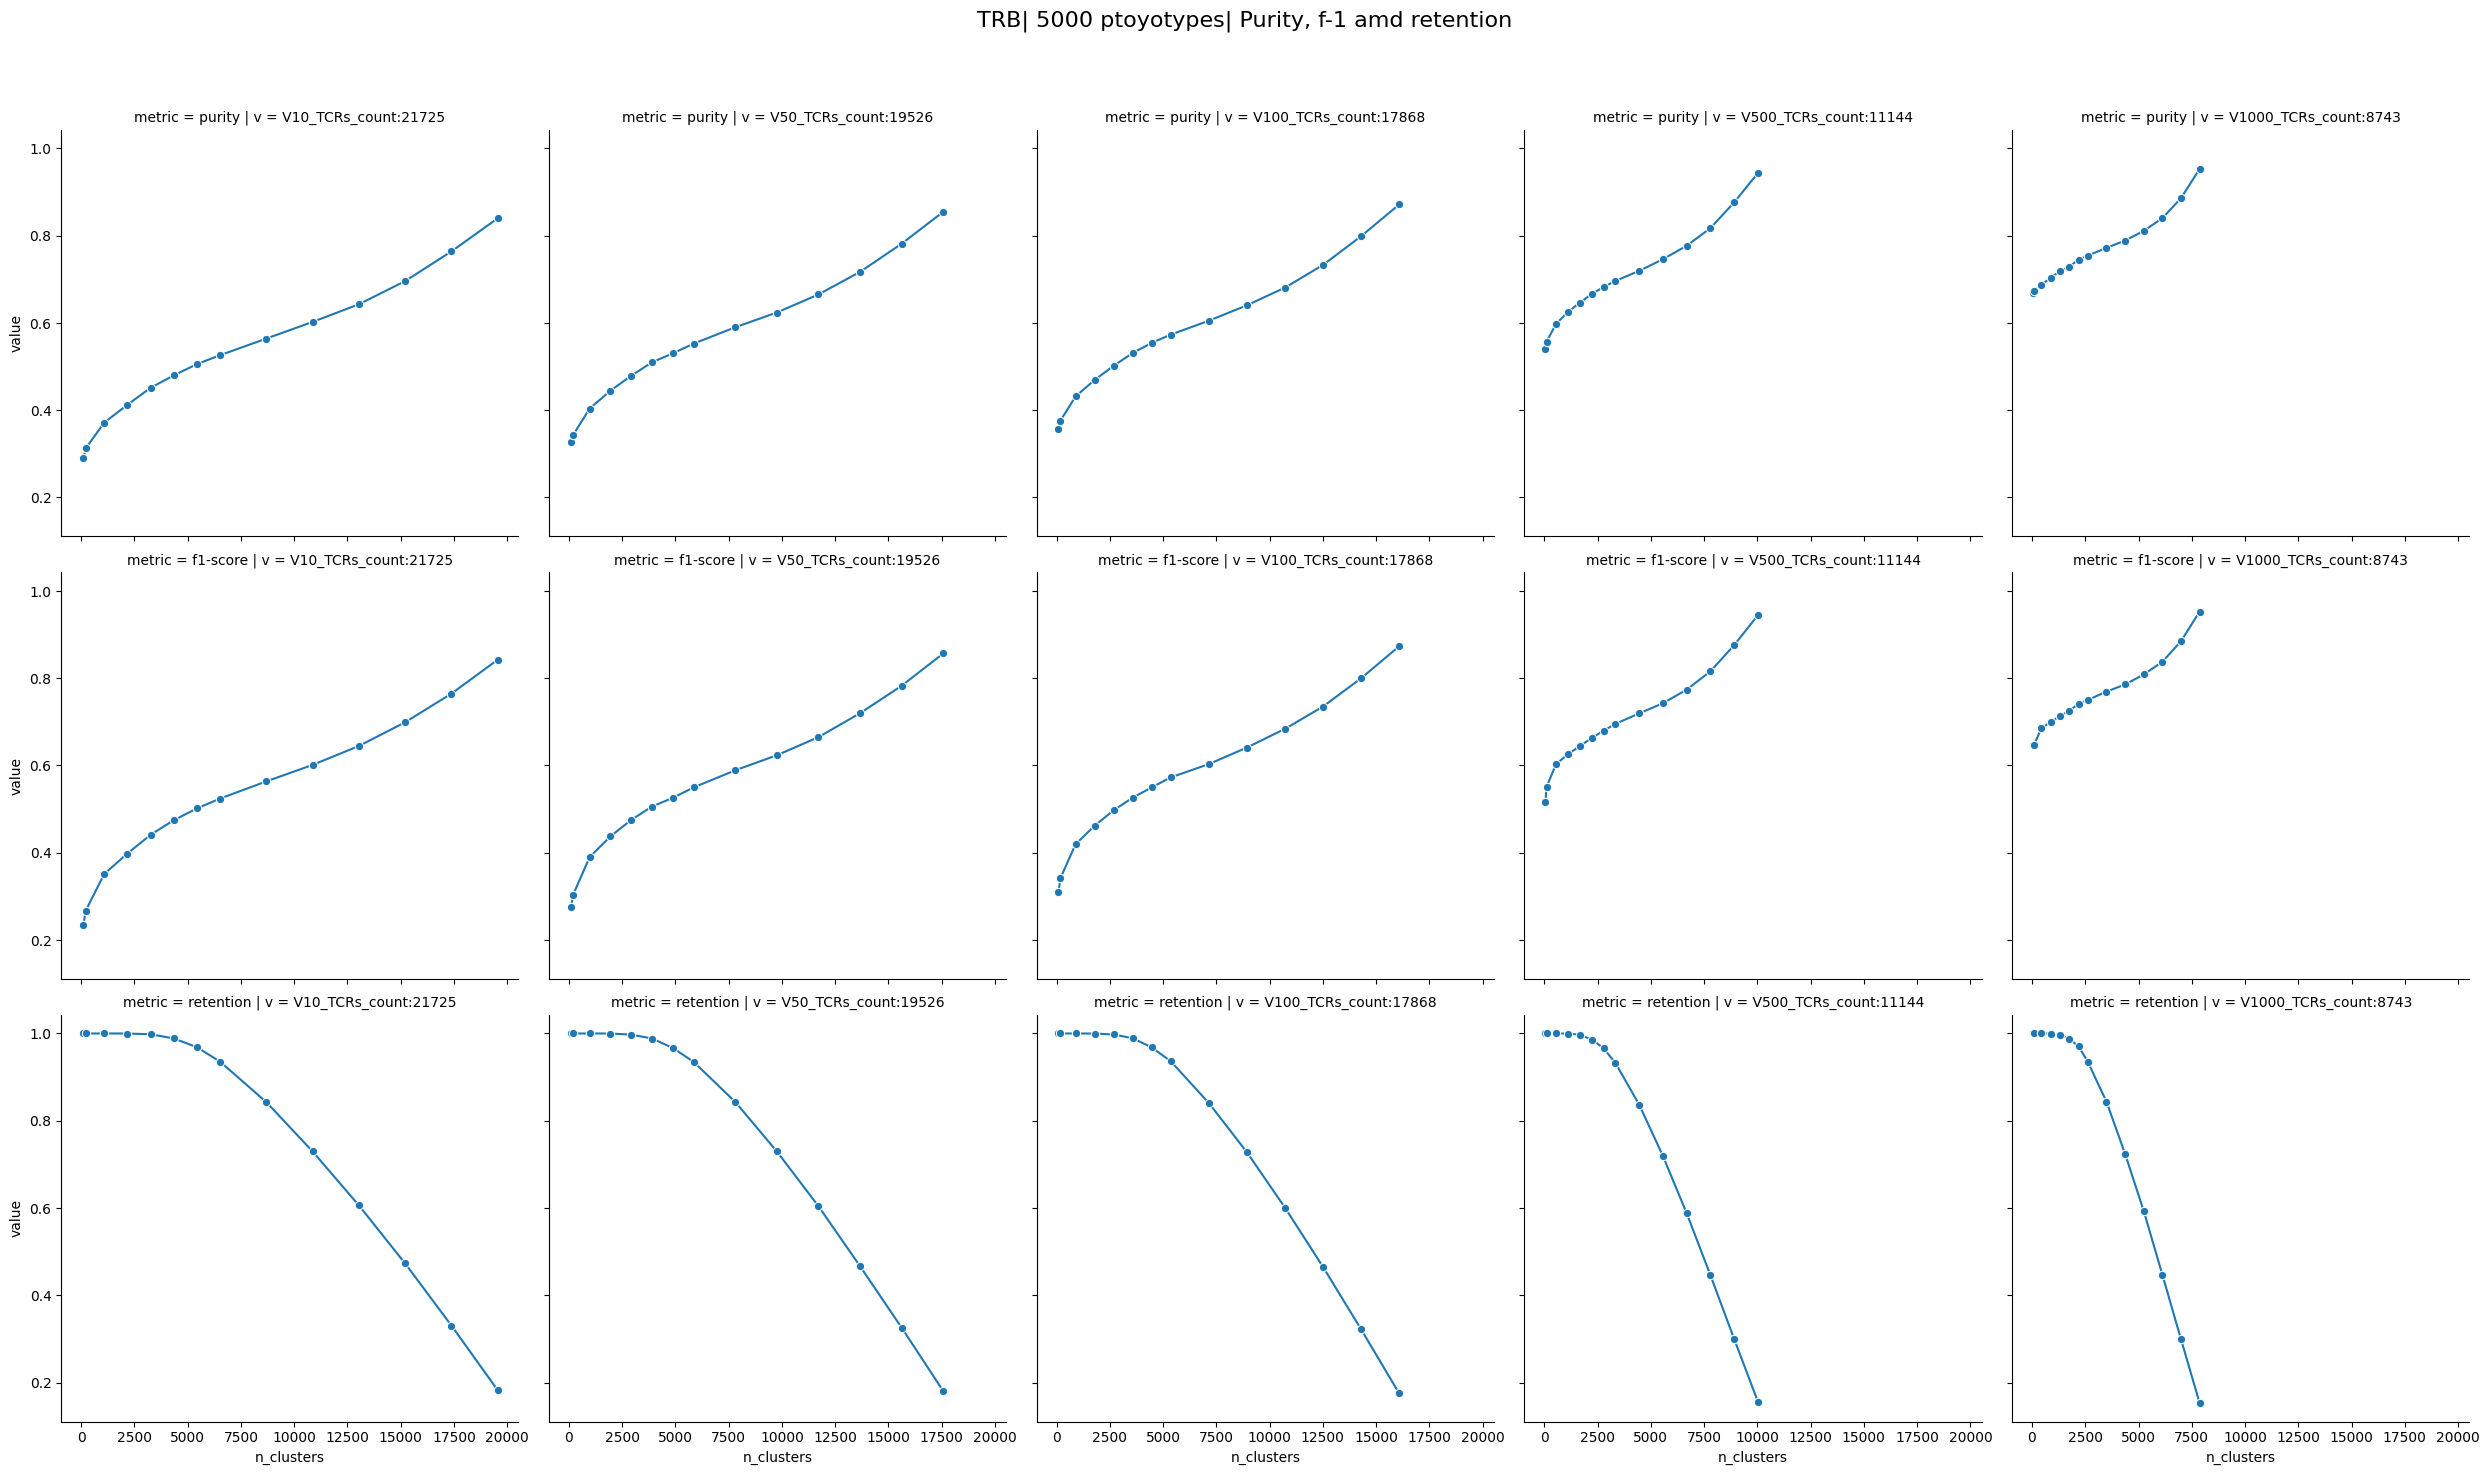

In [27]:
metrics_df = pd.DataFrame(metrics_tcremb[method][n_prototypes][chain]).T
t = metrics_df[['purity','f1-score','retention','n_clusters','v']].melt(id_vars=['n_clusters','v'],var_name='metric')
g = sns.relplot(data = t, x = 'n_clusters', y = 'value', hue='v', row='metric',kind="line",marker='o')
g.fig.suptitle(f'{chain}| {n_prototypes} ptoyotypes| Purity, f-1 amd retention', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{n_prototypes}_{method}_{chain}.png")

## compare prototypes

### Prototypes N

In [ ]:

samples_n = [10,50,100,500,1000]
#samples_n = [10,1000]
prototypes_n = [100,150,300,500, 1000,2000, 3000,5000]
#prototypes_n = [100,3000]

In [ ]:
method = 'dbscan_prototypes_n'
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500]
metrics_tcremb[method]={}

In [ ]:
import time, os, sys

In [ ]:
prototypes_sets = {100:{'TRA':'data/data_preped/olga_humanTRA_100.txt', 'TRB':'data/data_preped/olga_humanTRB_100.txt'}
                   ,150:{'TRA':'data/data_preped/olga_humanTRA_150.txt', 'TRB':'data/data_preped/olga_humanTRB_150.txt'}
                   ,300:{'TRA':'data/data_preped/olga_humanTRA_300.txt', 'TRB':'data/data_preped/olga_humanTRB_300.txt'}
                   ,500:{'TRA':'data/data_preped/olga_humanTRA_500.txt', 'TRB':'data/data_preped/olga_humanTRB_500.txt'}
                   ,1000:{'TRA':'data/data_preped/olga_humanTRA_1000.txt', 'TRB':'data/data_preped/olga_humanTRB_1000.txt'}
                   ,2000:{'TRA':'data/data_preped/olga_humanTRA_2000.txt', 'TRB':'data/data_preped/olga_humanTRB_2000.txt'}
                   ,3000:{'TRA':'data/data_preped/olga_humanTRA.txt', 'TRB':'data/data_preped/olga_humanTRB.txt'}
                   ,5000:{'TRA':'data/data_preped/olga_humanTRA_5000.txt', 'TRB':'data/data_preped/olga_humanTRB_5000.txt'}}

In [ ]:
prototypes_sets

In [ ]:
## full
metrics_tcremb[method]['TRA']={}
metrics_tcremb[method]['TRB']={}
metrics_tcremb[method]['TRA_TRB']={}
chain = 'TRA'
for n_prototypes in prototypes_n:
    for i in samples_n:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v,prototypes_path=prototypes_sets[n_prototypes])
        
        chain = 'TRA'
        t0 = time.time()
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists_count(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        t1 = time.time()
        tm = t1 - t0
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['time'] = tm
        
        chain = 'TRB'
        t0 = time.time()
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists_count(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        t1 = time.time()
        tm = t1 - t0
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['time'] = tm
            
        chain = 'TRA_TRB'
        t0 = time.time()
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists_count(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        t1 = time.time()
        tm = t1 - t0
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'
            metrics_tcremb[method][chain][f'V{i}_P{n_prototypes}_e{j}']['time'] = tm

In [ ]:
chain='TRA'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.csv",index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

In [ ]:
chain='TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.csv",index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

In [ ]:
chain='TRA_TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.csv",index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

### olga generated and donor1

In [6]:
method = 'dbscan_olga_difn_donor1_2'
samples_n = [10,50,100,500,1000]
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500]
metrics_tcremb[method]={}

In [7]:
prototypes_sets=[2000, 3000,5000,'donor1_prototypes','donor2_prototypes']#], 'tra1000_trb3000','tra1000_trb5000','tra2000_trb5000','tra3000_trb5000']

In [8]:
prototypes_sets

[2000, 3000, 5000, 'donor1_prototypes', 'donor2_prototypes']

TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9185185185185185
purity:0.9185098952270081
purity:0.920150053590568
purity:0.918525703200776
purity:0.9136363636363637
purity:0.912681000438789
purity:0.9121992401857324
purity:0.9099717400080742
purity:0.912
purity:0.9138978206502322
purity:0.913458262350937
purity:0.911326860841424
purity:0.9093646492020476
purity:0.9014916971573318
purity:0.8931317952797666
purity:0.8822525597269625
purity:0.8740175681923255
purity:0.8660087719298246
purity:0.8596270689293946
purity:0.846045197740113
purity:0.8398909232567199
purity:0.8294530672579453
purity:0.8194665253488783
purity:0.8105299028795365
purity:0.8033349681216283
purity:0.7933291770573566
purity:0.7838162438072361
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9390006489292667
purity:0.9387630128597673
purity:0.9392045454545455
purity:0.9383282364933742
purity:0.9341978866474544
purity:0.9324386857936141
purity:0.9314641744548287
purity:0.9294623655913978
purity:0.9306171843485276
purity:0.9314024390243902
purity:0.9317689530685921
purity:0.9288170563961485
purity:0.9265267175572519
purity:0.9184523809523809
purity:0.9109493139176701
purity:0.9042275574112735
purity:0.8935752820009809
purity:0.8856011183597391
purity:0.8810002232641214
purity:0.8669961323592609
purity:0.8610246836755859
purity:0.8507786319731914
purity:0.8437737281700836
purity:0.8344903178662769
purity:0.8266455473424851
purity:0.8194210703466847
purity:0.8099951322407918
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.941728064300067
purity:0.94185303514377
purity:0.9425355450236966
purity:0.9420212765957446
purity:0.9390304847576212
purity:0.9367760617760618
purity:0.936219739292365
purity:0.9345291479820628
purity:0.9355518112889638
purity:0.9358202968311271
purity:0.9369097091046468
purity:0.9348217500900252
purity:0.9320843091334895
purity:0.9251087632069609
purity:0.9190546528803545
purity:0.9097354785928552
purity:0.9024516129032258
purity:0.8948016752894802
purity:0.891016548463357
purity:0.8766780432309442
purity:0.8708470847084708
purity:0.8611227482195224
purity:0.8530004027386227
purity:0.8442289039767217
purity:0.8367614061331339
purity:0.8287450840185914
purity:0.8188243406309257
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9531700288184438
purity:0.9532002752924983
purity:0.9545454545454546
purity:0.9556962025316456
purity:0.9518918918918919
purity:0.9498694516971279
purity:0.949169602415702
purity:0.9483178937103852
purity:0.9513314967860422
purity:0.9518388791593695
purity:0.9520264681555004
purity:0.9507154213036566
purity:0.9498700334199777
purity:0.9426172148355494
purity:0.9388704318936877
purity:0.9303543913713406
purity:0.9253075571177505
purity:0.9191776964235426
purity:0.9158523344191096
purity:0.9038967877830437
purity:0.9003067484662577
purity:0.8918786692759295
purity:0.886444286728176
purity:0.8799724074499885
purity:0.8739701625473169
purity:0.8666238492828088
purity:0.858625700643554
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9662261380323054
purity:0.9687924016282226
purity:0.9694002447980417
purity:0.9686552072800809
purity:0.9684893419833179
purity:0.9652406417112299
purity:0.9644369178662151
purity:0.9644012944983819
purity:0.9666160849772383
purity:0.9675828047921071
purity:0.967784352399737
purity:0.9667294413057125
purity:0.9654377880184332
purity:0.9600862998921251
purity:0.9554655870445344
purity:0.9512987012987013
purity:0.9472984942426926
purity:0.9453158117846545
purity:0.9437371663244353
purity:0.9410368025326474
purity:0.9385088393543428
purity:0.9308957952468008
purity:0.9271570014144271
purity:0.9247572815533981
purity:0.9181149732620321
purity:0.9122807017543859
purity:0.9079394501081248
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9179292929292929
purity:0.9185687847008019
purity:0.9180907483794932
purity:0.9193002257336343
purity:0.9197807673143996
purity:0.9155534351145038
purity:0.9137931034482759
purity:0.9132340052585451
purity:0.9125964010282777
purity:0.9108463434675431
purity:0.9104125736738703
purity:0.9123809523809524
purity:0.9129335260115607
purity:0.9131326949384405
purity:0.9112662013958126
purity:0.9099688473520249
purity:0.9050877714965784
purity:0.8956953642384106
purity:0.8885108610311436
purity:0.8828693253072486
purity:0.877628159697614
purity:0.870851207947618
purity:0.8644696639022261
purity:0.8590253085128634
purity:0.8456090651558074
purity:0.8402041617589321
purity:0.8313004316006756
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9383289124668435
purity:0.9390797148412184
purity:0.9382022471910112
purity:0.9387269482450922
purity:0.9397590361445783
purity:0.9364278506559032
purity:0.9339396840593586
purity:0.933364183248496
purity:0.9325486645540969
purity:0.93058568329718
purity:0.9295539808253439
purity:0.9313685910375454
purity:0.9313239221671118
purity:0.9312092686459088
purity:0.9294781382228491
purity:0.928359194453615
purity:0.9229074889867841
purity:0.9124343257443083
purity:0.906423034330011
purity:0.900769434863359
purity:0.8966207759699625
purity:0.8902497598463016
purity:0.8840613382899628
purity:0.8795904740707767
purity:0.8665085184386456
purity:0.8618090452261307
purity:0.8524819855884708
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9410555174777244
purity:0.9417670682730924
purity:0.9413281753707285
purity:0.941983780411728
purity:0.9436542669584245
purity:0.9401260504201681
purity:0.9385307346326837
purity:0.9377413127413128
purity:0.9366130558183539
purity:0.935395814376706
purity:0.9342334494773519
purity:0.9363942712721146
purity:0.9361364537881793
purity:0.9361058601134216
purity:0.934902537697683
purity:0.9342787962642685
purity:0.9286657859973579
purity:0.9185116851168512
purity:0.9138937536485697
purity:0.9094223219293326
purity:0.9047367028314369
purity:0.899746192893401
purity:0.8940657184894556
purity:0.8888627266305628
purity:0.8761991777067154
purity:0.871311293543377
purity:0.8630282437884901
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9521002210759028
purity:0.9532374100719424
purity:0.9529824561403509
purity:0.9543010752688172
purity:0.9568812758417011
purity:0.9528409090909091
purity:0.9513776337115073
purity:0.9509138381201044
purity:0.9498464687819856
purity:0.949185989146522
purity:0.9497630331753555
purity:0.9513761467889909
purity:0.952113891285591
purity:0.9514321295143213
purity:0.9508729192042225
purity:0.9502868068833652
purity:0.9480854197349042
purity:0.9375431331953071
purity:0.9347826086956522
purity:0.9308712121212122
purity:0.9249626307922272
purity:0.9222318589187627
purity:0.9195725534308211
purity:0.9156037991858887
purity:0.9038054968287527
purity:0.9006964147536756
purity:0.8948679621325362
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9654654654654654
purity:0.966374269005848
purity:0.9678321678321679
purity:0.9698952879581152
purity:0.9704952581664911
purity:0.968
purity:0.9676823638042474
purity:0.9666966696669667
purity:0.9642233856893543
purity:0.9647251845775225
purity:0.9652996845425867
purity:0.9670658682634731
purity:0.966878083157153
purity:0.9676354029062088
purity:0.9662775616083009
purity:0.9664670658682635
purity:0.9629840546697038
purity:0.9571201694017999
purity:0.9545
purity:0.9511025886864813
purity:0.9478930675124604
purity:0.9483362521891419
purity:0.9462320067739204
purity:0.9436274509803921
purity:0.9411764705882353
purity:0.9389017788089714
purity:0.9332089552238806
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9180327868852459
purity:0.9184681902408894
purity:0.9180929095354523
purity:0.9190751445086706
purity:0.9189339255968906
purity:0.92
purity:0.9177093358999038
purity:0.9165494608532583
purity:0.9132007233273056
purity:0.912739965095986
purity:0.9134162023146164
purity:0.9131886477462438
purity:0.9095334685598377
purity:0.909270998415214
purity:0.9117873651771957
purity:0.9137225734473782
purity:0.9137447405329593
purity:0.9125850340136055
purity:0.9125083166999335
purity:0.9094964945825367
purity:0.9077479650286403
purity:0.9058719386249631
purity:0.8987129266927812
purity:0.8902987047316944
purity:0.88585291113381
purity:0.8829918538632436
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.93841059602649
purity:0.9389213775178687
purity:0.9393156875403487
purity:0.939209726443769
purity:0.9381924198250728
purity:0.9391395592864638
purity:0.9381338742393509
purity:0.9348148148148148
purity:0.9335564053537285
purity:0.9326878745965883
purity:0.9328460484239379
purity:0.9325099250110278
purity:0.9291845493562232
purity:0.928511354079058
purity:0.9305555555555556
purity:0.9324644549763034
purity:0.9323420074349442
purity:0.9318181818181818
purity:0.931095406360424
purity:0.9283069673510602
purity:0.9254539662312838
purity:0.9235807860262009
purity:0.9132340052585451
purity:0.9079754601226994
purity:0.9034519956850054
purity:0.9003651538862807
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9411362080766599
purity:0.9416890080428955
purity:0.9421157684630739
purity:0.9421487603305785
purity:0.9418534221683827
purity:0.9430760810071155
purity:0.9418911780243
purity:0.938485002541942
purity:0.9382162431489786
purity:0.9370192307692308
purity:0.9370529327610873
purity:0.9366913123844732
purity:0.9341102644554011
purity:0.9337719298245614
purity:0.9356899488926746
purity:0.9381107491856677
purity:0.9374275782155272
purity:0.9370998116760829
purity:0.9356381022434719
purity:0.9342058719490626
purity:0.9309309309309309
purity:0.9296465968586387
purity:0.9234360410831
purity:0.9154929577464789
purity:0.9116809116809117
purity:0.908166070937586
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9521707137601177
purity:0.9531700288184438
purity:0.9533045977011494
purity:0.9535201640464799
purity:0.9535340314136126
purity:0.9561351511558981
purity:0.9549343981745579
purity:0.9544697390338701
purity:0.9509962304792676
purity:0.9500520291363164
purity:0.9504643962848297
purity:0.9495756365451822
purity:0.9488553336580614
purity:0.9493065518890483
purity:0.950925925925926
purity:0.9525089605734767
purity:0.9523606975754998
purity:0.9524793388429752
purity:0.9515077424612877
purity:0.9508454581203303
purity:0.9500372856077554
purity:0.9472727272727273
purity:0.9413398125650816
purity:0.9350478074513683
purity:0.9332691690728264
purity:0.9307022995649472
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9655688622754491
purity:0.9662261380323054
purity:0.9664723032069971
purity:0.9691689008042895
purity:0.9688279301745636
purity:0.9701173959445037
purity:0.9698189134808853
purity:0.9692603266090298
purity:0.9678012879484821
purity:0.9651162790697675
purity:0.965669014084507
purity:0.9649122807017544
purity:0.9649265905383361
purity:0.9651070578905631
purity:0.9666160849772383
purity:0.967930029154519
purity:0.9688979039891819
purity:0.9684625492772667
purity:0.9670542635658915
purity:0.9668508287292817
purity:0.9658959537572255
purity:0.9629005059021922
purity:0.9577613516367476
purity:0.9543630892678034
purity:0.9523346303501945
purity:0.9505649717514124
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.917981072555205
purity:0.9185185185185185
purity:0.9174256223436551
purity:0.9191977077363896
purity:0.918673087212413
purity:0.920358387257342
purity:0.9173114119922631
purity:0.91441647597254
purity:0.9117911791179117
purity:0.9122653862941946
purity:0.9126544524925436
purity:0.9103561195251739
purity:0.9098557692307693
purity:0.910086004691165
purity:0.9112252384446075
purity:0.912341010656583
purity:0.9110449735449735
purity:0.908692933083177
purity:0.9049909801563439
purity:0.9028140411952422
purity:0.9012034704729919
purity:0.8954787234042553
purity:0.8864551863041289
purity:0.8801135020099314
purity:0.873660205245154
purity:0.8662854629425996
purity:0.8612348822406111
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9383697813121272
purity:0.9390402075226978
purity:0.9379795396419437
purity:0.9393028846153846
purity:0.9380281690140845
purity:0.9392987964416536
purity:0.9382022471910112
purity:0.9342359767891683
purity:0.9315263908701854
purity:0.9319227230910764
purity:0.932286995515695
purity:0.9308695652173913
purity:0.9297205757832345
purity:0.9299627020306672
purity:0.9300427516517684
purity:0.9309967141292442
purity:0.9308043554618897
purity:0.9274353876739563
purity:0.9234205488194002
purity:0.9205277692543725
purity:0.9192068659366677
purity:0.9146719234018587
purity:0.905982905982906
purity:0.8998996487706974
purity:0.8934267762203963
purity:0.8867087129175426
purity:0.8818222823635543
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9410958904109589
purity:0.9416107382550336
purity:0.9401993355481728
purity:0.9422110552763819
purity:0.943075117370892
purity:0.9432314410480349
purity:0.9419904204364024
purity:0.9385390428211587
purity:0.9364448857994042
purity:0.9366906474820144
purity:0.9368863955119214
purity:0.9356009070294785
purity:0.9344842850818946
purity:0.9346037245560849
purity:0.9341414141414142
purity:0.9351887152115897
purity:0.9360998898273962
purity:0.9341463414634147
purity:0.9293369055592766
purity:0.926844988720593
purity:0.9258566978193147
purity:0.9217777777777778
purity:0.9134723788049606
purity:0.9062829989440337
purity:0.9013544594939944
purity:0.8959208899876391
purity:0.8904011461318052
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9521354933726067
purity:0.9531024531024531
purity:0.9521428571428572
purity:0.953960731211916
purity:0.9535031847133758
purity:0.9553203997648442
purity:0.9546498277841562
purity:0.9516041326808048
purity:0.9490343347639485
purity:0.9495268138801262
purity:0.9499494438827099
purity:0.9494354442808051
purity:0.9495919347095535
purity:0.9492242595204513
purity:0.9494505494505494
purity:0.9505655634687893
purity:0.9516713652839307
purity:0.9516441005802708
purity:0.947505584512286
purity:0.9450469992769343
purity:0.9442314395259672
purity:0.9418837675350702
purity:0.9359464627151052
purity:0.9305680793507665
purity:0.9255908958272542
purity:0.9224652087475149
purity:0.9176308539944904
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9655172413793104
purity:0.9662261380323054
purity:0.9665211062590975
purity:0.970013037809648
purity:0.9663056558363418
purity:0.9686192468619247
purity:0.9684959349593496
purity:0.9664804469273743
purity:0.9643835616438357
purity:0.9647577092511013
purity:0.9649871904355252
purity:0.9654036243822076
purity:0.9654618473895582
purity:0.9651898734177216
purity:0.9667870036101083
purity:0.9664879356568364
purity:0.9669211195928753
purity:0.9670731707317073
purity:0.9639905548996458
purity:0.9627118644067797
purity:0.9618074233458849
purity:0.9593702386998476
purity:0.9558466763706939
purity:0.9513193812556869
purity:0.9492273730684326
purity:0.9459691252144082
purity:0.9431299294312993
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9177215189873418
purity:0.9182903834066625
purity:0.9186691312384473
purity:0.9197952218430034
purity:0.9168478260869565
purity:0.9174782162993337
purity:0.9175455417066155
purity:0.9117383512544803
purity:0.9112582781456954
purity:0.9112169770463404
purity:0.9110556940980881
purity:0.9112776025236593
purity:0.9086102719033232
purity:0.9100963253656796
purity:0.9110816191108162
purity:0.909746161078032
purity:0.9044793829724117
purity:0.9026624677927283
purity:0.9009873834339002
purity:0.8933298728263691
purity:0.8831263696128561
purity:0.8754015603487838
purity:0.8678579307302008
purity:0.8605190968558768
purity:0.8537525354969574
purity:0.8477447311404372
purity:0.8362052641545162
purity:0.8284260268993093
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9381648936170213
purity:0.9386138613861386
purity:0.9391585760517799
purity:0.9394847213900539
purity:0.9375358166189112
purity:0.937466307277628
purity:0.9382591093117408
purity:0.9317535545023696
purity:0.930905695611578
purity:0.9309556470050298
purity:0.9305494505494506
purity:0.9306310071040534
purity:0.9279423538831065
purity:0.928030303030303
purity:0.9290979290979291
purity:0.9277906591586618
purity:0.9221105527638191
purity:0.9204476709013915
purity:0.9178716020821284
purity:0.9114097641250686
purity:0.902319587628866
purity:0.8946472019464721
purity:0.8877168307548055
purity:0.8814931414436699
purity:0.8751892710361238
purity:0.869327731092437
purity:0.8575757575757575
purity:0.8508652537429516
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.940893470790378
purity:0.9412166780587833
purity:0.941728064300067
purity:0.9425359150530919
purity:0.9414925373134329
purity:0.9413754227733935
purity:0.9419831223628692
purity:0.9362962962962963
purity:0.9357976653696498
purity:0.9360687022900763
purity:0.9353507565337001
purity:0.9352455454150369
purity:0.9328327075511056
purity:0.933570581257414
purity:0.9342395297575312
purity:0.9337748344370861
purity:0.9286657859973579
purity:0.9268912905276542
purity:0.9245742092457421
purity:0.9183732333429478
purity:0.9100787829394187
purity:0.9032921810699589
purity:0.8959881129271917
purity:0.8906064209274673
purity:0.8849942726231386
purity:0.878915796489669
purity:0.8661400512382579
purity:0.8610309278350515
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9519586104951958
purity:0.9522409992652462
purity:0.953203743700504
purity:0.9543624161073826
purity:0.9536679536679536
purity:0.952731737262124
purity:0.9535550458715596
purity:0.9488545551411828
purity:0.9493136219640972
purity:0.949406298399587
purity:0.9493796526054591
purity:0.9499527856468366
purity:0.9489284085727314
purity:0.9490861618798956
purity:0.9501852614244545
purity:0.9503683598293913
purity:0.9473293768545994
purity:0.9454350927246791
purity:0.9442735042735043
purity:0.9391077824812765
purity:0.9327188940092166
purity:0.9275447345262541
purity:0.921485260770975
purity:0.9163019693654267
purity:0.9144072301967039
purity:0.9111918982082576
purity:0.8976023976023976
purity:0.895656394079107
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9652567975830816
purity:0.9656716417910448
purity:0.9662261380323054
purity:0.9702072538860104
purity:0.9684848484848485
purity:0.9657142857142857
purity:0.9675785207700102
purity:0.9646840148698885
purity:0.9642529789184234
purity:0.9645704162976085
purity:0.9665551839464883
purity:0.9650516282764099
purity:0.9650190114068441
purity:0.9653954802259888
purity:0.9657444005270093
purity:0.9672528805336568
purity:0.9651365485183033
purity:0.962451684152402
purity:0.961719979024646
purity:0.9585828343313373
purity:0.952803738317757
purity:0.9498000888494003
purity:0.9461538461538461
purity:0.9425857083849649
purity:0.9411529223378703
purity:0.9396887159533074
purity:0.9342056074766355
purity:0.9327062228654125


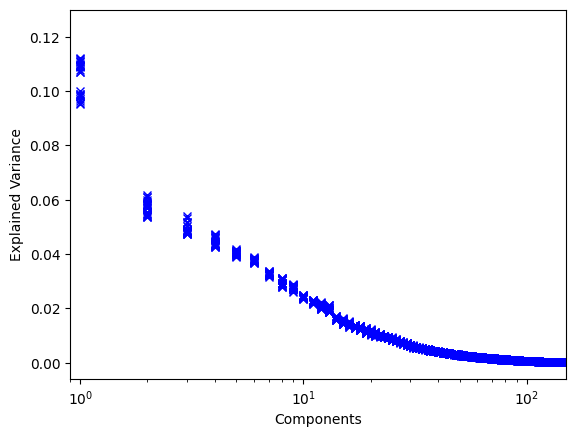

In [14]:
chain = 'TRA'
metrics_tcremb[method][chain]={}
for prototypes_name in prototypes_sets:
    for i in samples_n:
        run_name = f'compare_V{i}_{prototypes_name}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['n_prototypes']=prototypes_name
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

In [32]:
metrics_df

purity retention consistency   ami precision  \
V10_P2000_e3                     0.92      0.12      0.0065  0.86       0.9   
V10_P2000_e10                    0.92      0.12      0.0065  0.86       0.9   
V10_P2000_e25                    0.92      0.12      0.0065  0.86       0.9   
V10_P2000_e50                    0.92      0.12      0.0065  0.86       0.9   
V10_P2000_e75                    0.92      0.12      0.0062  0.86       0.9   
...                               ...       ...         ...   ...       ...   
V1000_Pdonor1_prototypes_e1300   0.93      0.39      0.0362  0.73      0.93   
V1000_Pdonor1_prototypes_e1350   0.92       0.4      0.0356  0.73      0.93   
V1000_Pdonor1_prototypes_e1400   0.92      0.41      0.0364  0.72      0.92   
V1000_Pdonor1_prototypes_e1450   0.92      0.42      0.0367   0.7      0.92   
V1000_Pdonor1_prototypes_e1500   0.91      0.43      0.0357  0.68      0.91   

                               recall f1-score mean_clustsize  \
V10_P2000_e3                     0.92     0.91           6.99   
V10_P2000_e10                    0.92     0.91           6.99   
V10_P2000_e25                    0.92     0.91           6.99   
V10_P2000_e50                    0.92     0.91           6.94   
V10_P2000_e75                    0.92     0.91           6.84   
...                               ...      ...            ...   
V1000_Pdonor1_prototypes_e1300   0.93     0.93           5.91   
V1000_Pdonor1_prototypes_e1350   0.92     0.92           5.76   
V1000_Pdonor1_prototypes_e1400   0.92     0.92           5.72   
V1000_Pdonor1_prototypes_e1450   0.92     0.92           5.74   
V1000_Pdonor1_prototypes_e1500   0.91     0.91           5.67   

                                     n_prototypes   eps                      v  
V10_P2000_e3                                 2000     3   V10_TCRs_count:10551  
V10_P2000_e10                                2000    10   V10_TCRs_count:10551  
V10_P2000_e25                                2000    25   V10_TCRs_count:10551  
V10_P2000_e50                                2000    50   V10_TCRs_count:10551  
V10_P2000_e75                                2000    75   V10_TCRs_count:10551  
...                                           ...   ...                    ...  
V1000_Pdonor1_prototypes_e1300  donor1_prototypes  1300  V1000_TCRs_count:5986  
V1000_Pdonor1_prototypes_e1350  donor1_prototypes  1350  V1000_TCRs_count:5986  
V1000_Pdonor1_prototypes_e1400  donor1_prototypes  1400  V1000_TCRs_count:5986  
V1000_Pdonor1_prototypes_e1450  donor1_prototypes  1450  V1000_TCRs_count:5986  
V1000_Pdonor1_prototypes_e1500  donor1_prototypes  1500  V1000_TCRs_count:5986  

[680 rows x 11 columns]

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


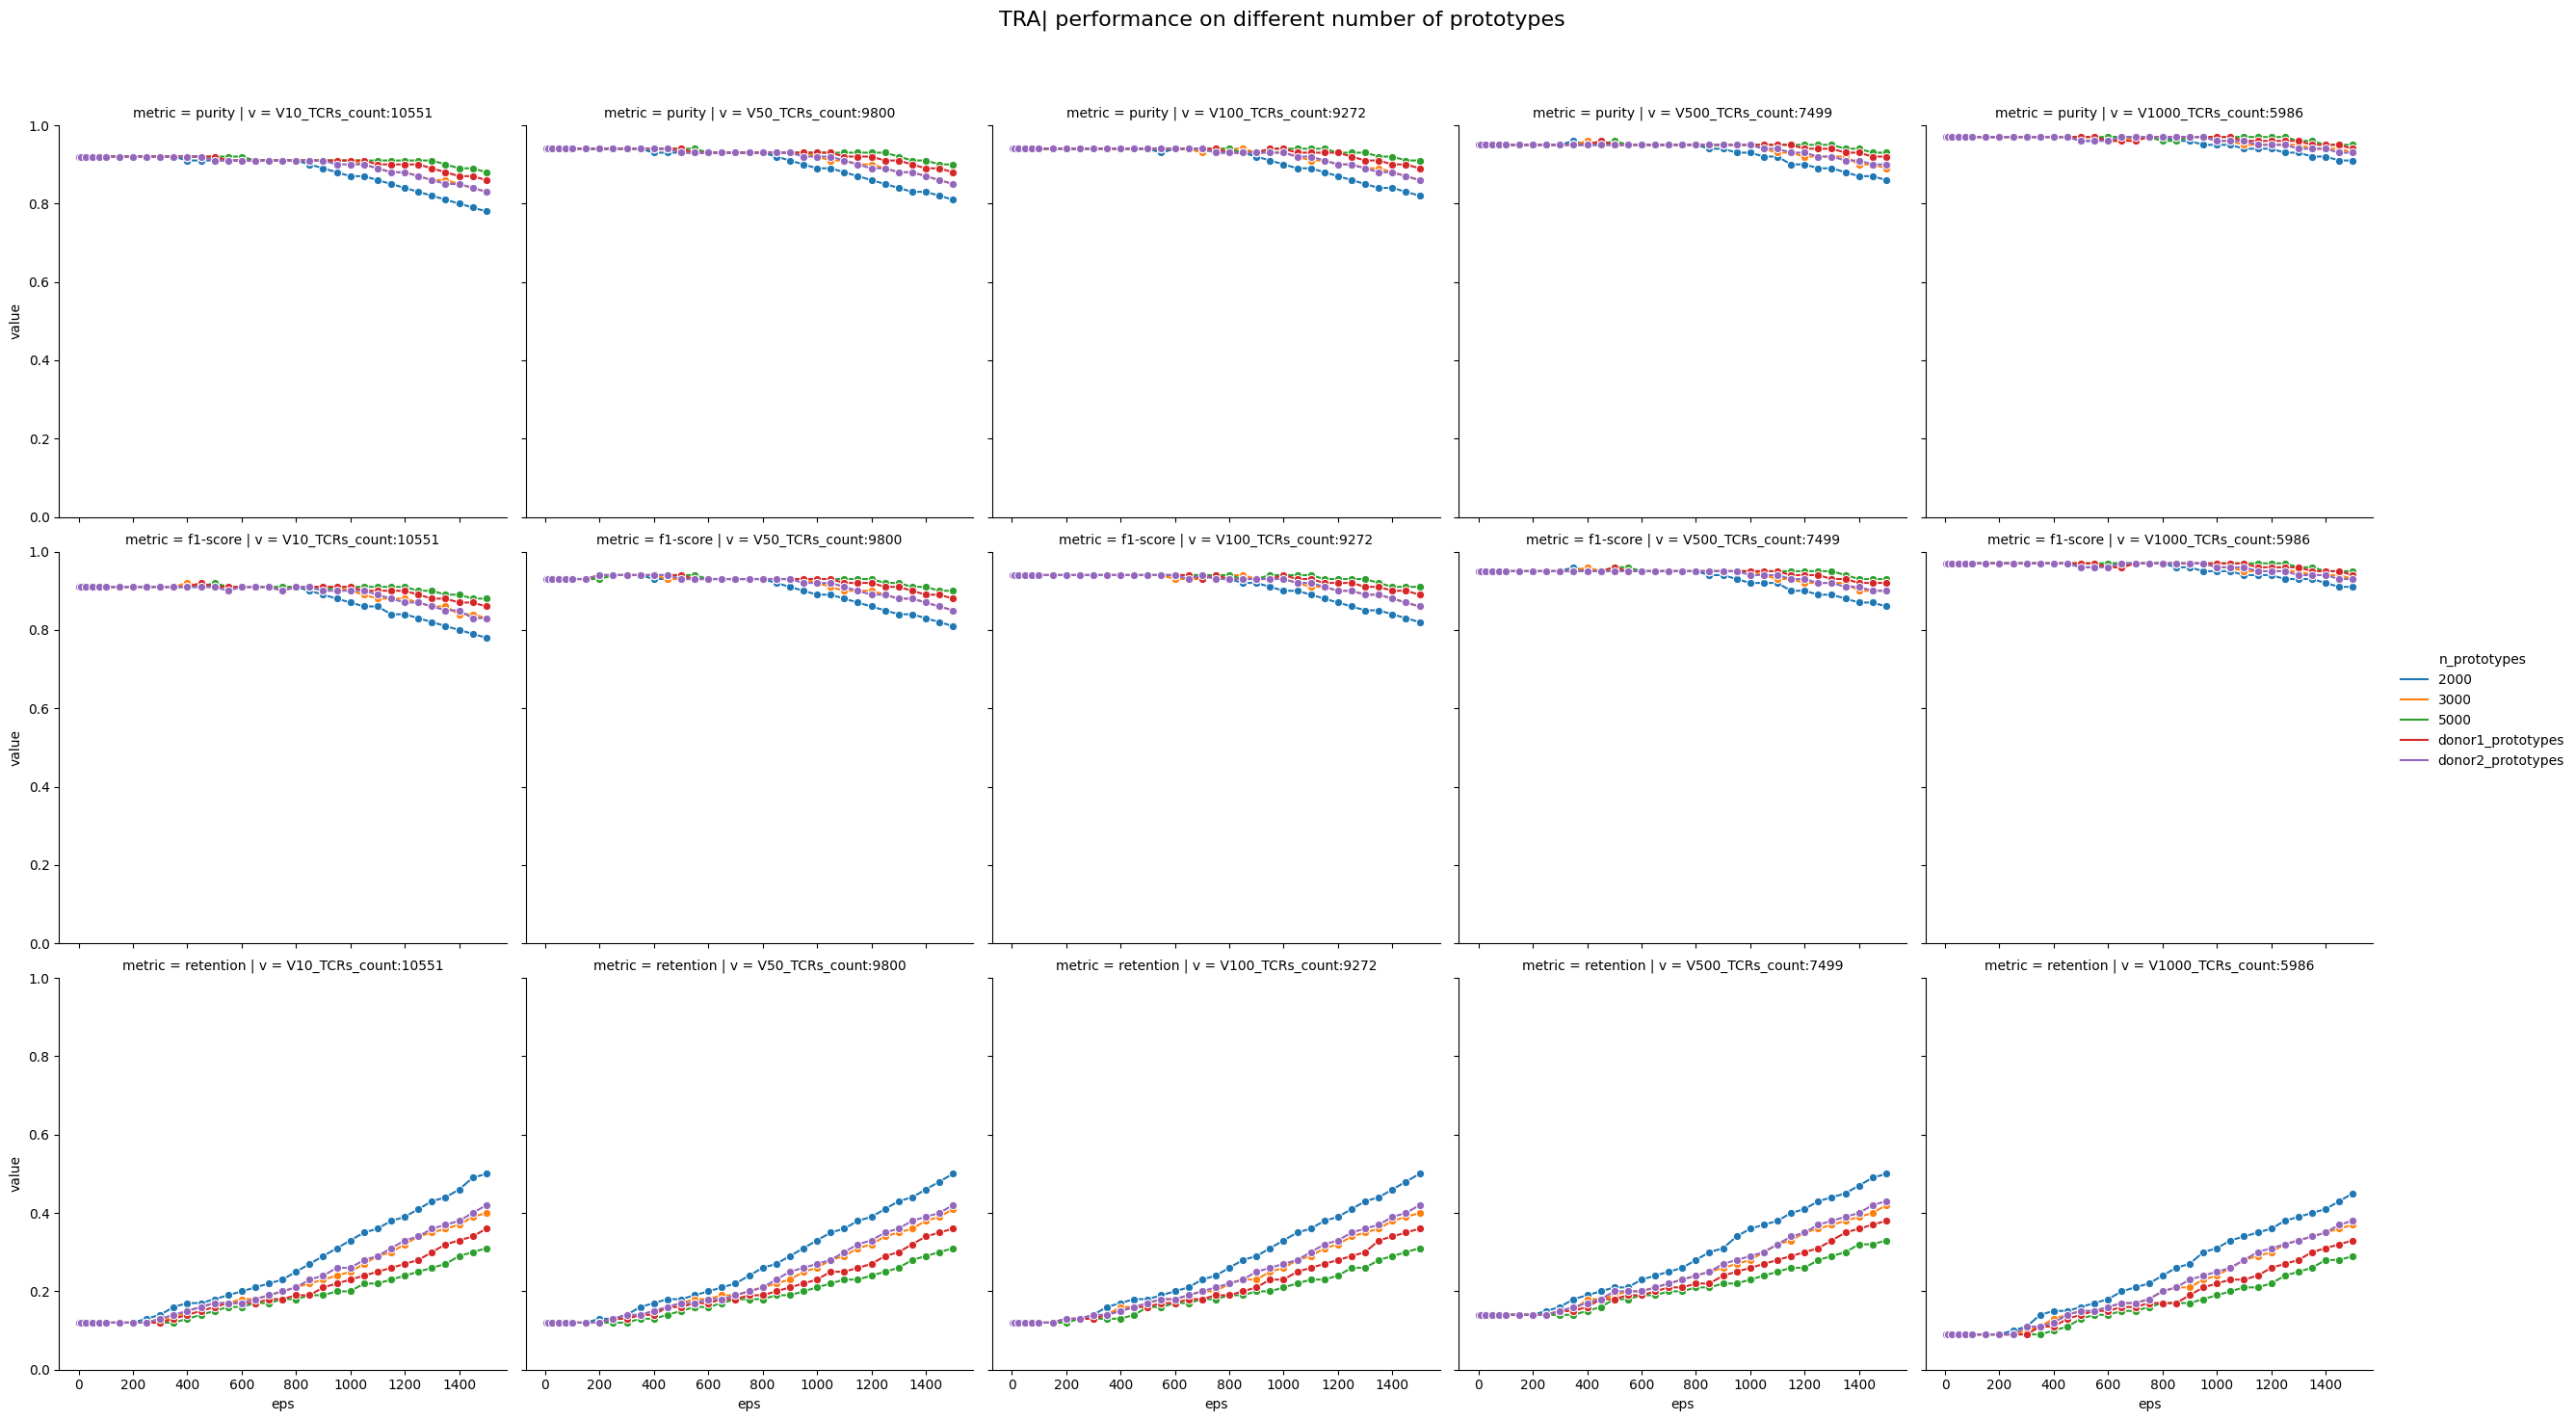

In [15]:
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.csv",index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

In [ ]:
chain = 'TRB'
metrics_tcremb[method][chain]={}
for prototypes_name in prototypes_sets:
    for i in samples_n:
        run_name = f'compare_V{i}_{prototypes_name}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['n_prototypes']=prototypes_name
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758735440931781
purity:0.9759535655058044
purity:0.9760330578512396
purity:0.976326530612245
purity:0.9770932069510269
purity:0.9796186719263642
purity:0.9743881616391576
purity:0.9684526790185278
purity:0.9675383228133454
purity:0.9672859450726979
purity:0.9642857142857143
purity:0.9622351857537611
purity:0.9603598538093899
purity:0.9563617245005258
purity:0.9553508150248051
purity:0.9523491427299042
purity:0.9472796288485871
purity:0.9410605164596886
purity:0.9360628154795289
purity:0.9329170383586084
purity:0.9276002719238613
purity:0.9219204655674103
purity:0.9160807092632223
purity:0.9096623300687035
purity:0.9014241831890534
purity:0.8863124420299456
purity:0.8729037952338923
purity:0.8567324955116696
purity:0.8413313575743759
purity:0.8274602492479587
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770992366412213
purity:0.9771766694843618
purity:0.9772535804549284
purity:0.9775374376039934
purity:0.9782783588093322
purity:0.9805499664654594
purity:0.9772859638905067
purity:0.9745454545454545
purity:0.973721257625528
purity:0.9727120067170445
purity:0.9704810495626822
purity:0.9684481648422408
purity:0.9657311669128508
purity:0.9625935162094763
purity:0.9617691154422788
purity:0.9598298676748582
purity:0.9541592128801432
purity:0.948019283169147
purity:0.9426637467648815
purity:0.9393709738537325
purity:0.9358695652173913
purity:0.931391139458714
purity:0.9256965944272446
purity:0.919588592800374
purity:0.9137518684603887
purity:0.89749430523918
purity:0.8847563458667028
purity:0.8688122011115419
purity:0.8563862544648355
purity:0.8458299216282607
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820923656927427
purity:0.9821596244131455
purity:0.9822263797942001
purity:0.9824723247232472
purity:0.9831111111111112
purity:0.9845701689933872
purity:0.9811676082862524
purity:0.9783845278725825
purity:0.9767441860465116
purity:0.9758542141230069
purity:0.9744918294141092
purity:0.9720056697377746
purity:0.9704545454545455
purity:0.9676335877862595
purity:0.9670724958494743
purity:0.9657426778242678
purity:0.9610325142715314
purity:0.9548311990686845
purity:0.9498009730207873
purity:0.9467928496319663
purity:0.9432709716354858
purity:0.9395562356541699
purity:0.9343489299963729
purity:0.9286953504510757
purity:0.9238985313751669
purity:0.9079491255961845
purity:0.8951123254401943
purity:0.8803703167944452
purity:0.8679245283018868
purity:0.857926351527814
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875647668393782
purity:0.9875904860392968
purity:0.9876416065911432
purity:0.9878048780487805
purity:0.9881773399014778
purity:0.989448051948052
purity:0.9879943502824858
purity:0.9864951768488746
purity:0.9857142857142858
purity:0.9851282051282051
purity:0.9842767295597484
purity:0.9830917874396136
purity:0.9828741623231572
purity:0.9809322033898306
purity:0.9798850574712644
purity:0.9801162434995412
purity:0.9769140853302163
purity:0.9736330835414932
purity:0.9715576820839978
purity:0.9704759480783914
purity:0.9686428221460068
purity:0.9684260131950989
purity:0.963996399639964
purity:0.9609120521172638
purity:0.9575273338940286
purity:0.952428945777061
purity:0.9408456167571762
purity:0.9275470292419445
purity:0.9202937488805302
purity:0.9129763130792997
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884659746251442
purity:0.9884925201380897
purity:0.9885452462772051
purity:0.9885452462772051
purity:0.9889380530973452
purity:0.9902439024390244
purity:0.9893617021276596
purity:0.988905325443787
purity:0.9876382563435263
purity:0.9877121123464014
purity:0.9881198347107438
purity:0.9870908252650992
purity:0.9863247863247864
purity:0.9852820932134096
purity:0.9857410881801125
purity:0.985278276481149
purity:0.9830038154699965
purity:0.9799276077657124
purity:0.9790409653858367
purity:0.9775144333029474
purity:0.9754945379391792
purity:0.9753511034680424
purity:0.9724517906336089
purity:0.9696243005595524
purity:0.9666666666666667
purity:0.9640808181591419
purity:0.9549527730685397
purity:0.9427436316896471
purity:0.9364721784185628
purity:0.9289274106175515
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758735440931781
purity:0.9759136212624585
purity:0.9760330578512396
purity:0.9768
purity:0.9770932069510269
purity:0.9795501022494888
purity:0.9763279445727483
purity:0.9717333333333333
purity:0.9675701839303001
purity:0.9679747406405051
purity:0.9679643146796432
purity:0.9662309368191722
purity:0.9624210176255404
purity:0.9614138438880707
purity:0.9590434304562947
purity:0.9566815437122604
purity:0.9543519394512772
purity:0.9523269012485811
purity:0.9489751417357174
purity:0.9466721785861927
purity:0.9412458243269798
purity:0.9363141085853842
purity:0.9323159784560143
purity:0.9287952646239555
purity:0.9262198210366368
purity:0.9224680988531739
purity:0.9176254026691211
purity:0.9118994826311899
purity:0.9021570562526434
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770992366412213
purity:0.9771380186282811
purity:0.9772535804549284
purity:0.9779951100244498
purity:0.9782783588093322
purity:0.9805555555555555
purity:0.9776075427224514
purity:0.9748633879781421
purity:0.9739609414121182
purity:0.9737950397753861
purity:0.9731205375892482
purity:0.9713963116296576
purity:0.9680887963926466
purity:0.9659020458772474
purity:0.9644714038128249
purity:0.9624101713653952
purity:0.9604109245803056
purity:0.9594985535197685
purity:0.9565722248026011
purity:0.9532936770213704
purity:0.9479406230399331
purity:0.9429255637597286
purity:0.9393823865802516
purity:0.9365049981488338
purity:0.9341113105924596
purity:0.9306318681318682
purity:0.9266100032690422
purity:0.9220840547772706
purity:0.9131157449380477
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820923656927427
purity:0.9821260583254939
purity:0.9822263797942001
purity:0.9828674481514879
purity:0.9831111111111112
purity:0.984779299847793
purity:0.9815404201145767
purity:0.9791418355184743
purity:0.9777657266811279
purity:0.9771920932589965
purity:0.9757103574702108
purity:0.974989749897499
purity:0.9721480351011065
purity:0.9716142270861833
purity:0.9697548551416746
purity:0.968065693430657
purity:0.9667774086378738
purity:0.9658210947930574
purity:0.9626407369498464
purity:0.9606645492303933
purity:0.9548942106486864
purity:0.9497231450719823
purity:0.9464890016920474
purity:0.9438524590163935
purity:0.9416102032682343
purity:0.9388105223027068
purity:0.9345065312046444
purity:0.9305701294158797
purity:0.9232585596221959
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875647668393782
purity:0.9875647668393782
purity:0.9876416065911432
purity:0.9881070366699702
purity:0.9881773399014778
purity:0.9899244332493703
purity:0.9885958660014256
purity:0.9878048780487805
purity:0.9865443425076452
purity:0.9863636363636363
purity:0.9844640082858622
purity:0.9851783232978231
purity:0.9833333333333333
purity:0.9831570701135919
purity:0.9816715542521994
purity:0.9807288016818501
purity:0.9797882579403272
purity:0.9797948399129623
purity:0.9781763826606876
purity:0.9771279675738275
purity:0.974472807991121
purity:0.971718249733191
purity:0.9705731832139202
purity:0.9695532817569253
purity:0.9690545808966862
purity:0.9681978798586572
purity:0.9641326415519964
purity:0.9610673665791776
purity:0.9582627118644068
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884659746251442
purity:0.9884659746251442
purity:0.9885452462772051
purity:0.9888641425389755
purity:0.9889380530973452
purity:0.9900398406374502
purity:0.9892650701899257
purity:0.988791032826261
purity:0.9888190076869322
purity:0.9883268482490273
purity:0.9876252209781968
purity:0.9882854100106496
purity:0.9873225152129818
purity:0.9869133574007221
purity:0.986480777355302
purity:0.9853896103896104
purity:0.9849284099472494
purity:0.985052861830113
purity:0.9834565293910594
purity:0.9831615120274914
purity:0.9799474030243261
purity:0.9787234042553191
purity:0.9773838630806846
purity:0.9764038231780168
purity:0.9759742162320539
purity:0.975107296137339
purity:0.97108234646103
purity:0.9694942467219695
purity:0.9675732217573222
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9759136212624585
purity:0.9759933774834437
purity:0.9760330578512396
purity:0.9763651181744091
purity:0.9770569620253164
purity:0.9770932069510269
purity:0.9795081967213115
purity:0.9781065088757397
purity:0.976054732041049
purity:0.96900826446281
purity:0.9676796912686927
purity:0.9686078252957234
purity:0.9683518290176737
purity:0.9670750382848392
purity:0.9655294953802417
purity:0.9629258517034068
purity:0.9621962196219622
purity:0.9607566346696782
purity:0.9577235772357724
purity:0.9568740198640878
purity:0.9557889594528578
purity:0.9541580281041234
purity:0.9498886414253898
purity:0.9484203739522888
purity:0.9464544138929089
purity:0.9418881396271321
purity:0.9380395165931326
purity:0.9338507021433851
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9771380186282811
purity:0.9772151898734177
purity:0.9772535804549284
purity:0.9775747508305648
purity:0.9782433521353747
purity:0.9782783588093322
purity:0.9805149617258176
purity:0.9794561933534743
purity:0.9773123909249564
purity:0.9749733759318424
purity:0.9742701632855022
purity:0.9745283018867924
purity:0.9735381988903116
purity:0.9722001588562351
purity:0.9712177121771217
purity:0.9689028651292803
purity:0.9678942398489141
purity:0.9663890541344438
purity:0.9635949943117179
purity:0.9623729744575666
purity:0.9618949536560247
purity:0.9606164383561644
purity:0.9574669187145558
purity:0.9557481751824818
purity:0.9531662269129287
purity:0.9482105263157895
purity:0.9449989814626196
purity:0.9409224730127576
TCR-epitope paires count in V100 dataset: 29865
data/data_preped/VDJdb_data_V100.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9820585457979226
purity:0.9821260583254939
purity:0.9821930646672915
purity:0.9822263797942001
purity:0.9825046040515654
purity:0.9830810329474622
purity:0.9831111111111112
purity:0.9847677075399848
purity:0.9829842931937173
purity:0.9811202013845186
purity:0.979081929110982
purity:0.9778258518117902
purity:0.9780163599182005
purity:0.9764216366158114
purity:0.9746672391584371
purity:0.9743486973947896
purity:0.9726923076923077
purity:0.9719334719334719
purity:0.9699934768427919
purity:0.968916797488226
purity:0.9676150121065376
purity:0.9675491033304867
purity:0.9664047683554592
purity:0.9636316064887493
purity:0.9625600809511763
purity:0.959726629240908
purity:0.9555139311636619
purity:0.9520253451007015
purity:0.9479529616724739
TCR-epitope paires count in V500 dataset: 23446
data/data_preped/VDJdb_data_V500.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875389408099688
purity:0.9875647668393782
purity:0.9876160990712074
purity:0.9876416065911432
purity:0.9878296146044625
purity:0.9881539980256664
purity:0.9881773399014778
purity:0.9899159663865547
purity:0.989075018208303
purity:0.9880534082923401
purity:0.9874587458745875
purity:0.9865689865689866
purity:0.9868270332187858
purity:0.9849585062240664
purity:0.984841075794621
purity:0.9854081167350661
purity:0.9837576821773486
purity:0.983300198807157
purity:0.9824822959373836
purity:0.9816216216216216
purity:0.9808094905792044
purity:0.9805151915455746
purity:0.9795340050377834
purity:0.9792048929663608
purity:0.9783831803375778
purity:0.9769585253456221
purity:0.9743661186960156
purity:0.972327726532827
purity:0.9710221285563752
TCR-epitope paires count in V1000 dataset: 18612
data/data_preped/VDJdb_data_V1000.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884393063583815
purity:0.9884659746251442
purity:0.9885189437428243
purity:0.9885452462772051
purity:0.9885714285714285
purity:0.9889135254988913
purity:0.9889380530973452
purity:0.9899598393574297
purity:0.9898648648648649
purity:0.9893790849673203
purity:0.9900763358778626
purity:0.9888888888888889
purity:0.9888961463096015
purity:0.9875813128326434
purity:0.9881019830028328
purity:0.9875065070275898
purity:0.9878726629610914
purity:0.9869767441860465
purity:0.9858551221603086
purity:0.9858686616791354
purity:0.9850384148807116
purity:0.9845797995373939
purity:0.9848708487084871
purity:0.9845822875582646
purity:0.9838539838539838
purity:0.9822222222222222
purity:0.9798945286750165
purity:0.9790457769181173
purity:0.9789241899968544
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758333333333333
purity:0.9758735440931781
purity:0.9759136212624585
purity:0.9759136212624585
purity:0.9759535655058044
purity:0.9760330578512396
purity:0.976326530612245
purity:0.976984126984127
purity:0.9771653543307086
purity:0.9792817679558011
purity:0.9788325849903784
purity:0.9752202643171806
purity:0.973361747469366
purity:0.9702770780856423
purity:0.968722073279714
purity:0.9673826571201273
purity:0.9669211195928753
purity:0.9657743137919349
purity:0.9634849455477258
purity:0.9587903943077379
purity:0.9582655826558265
purity:0.9569303054032889
purity:0.9535946140899254
purity:0.951918631530282
purity:0.9499777678968431
purity:0.9459978655282818
purity:0.942728574350583
purity:0.9394891944990177
purity:0.9360859728506787
purity:0.9317689530685921
purity:0.929552965733171
purity:0.9255977261327537
TCR-epitope paires count in V50 dataset: 32026
data/data_preped/VDJdb_data_V50.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770603228547153
purity:0.9770992366412213
purity:0.9771380186282811
purity:0.9771380186282811
purity:0.9771766694843618
purity:0.9772535804549284
purity:0.9775374376039934
purity:0.9781729991915926
purity:0.9783480352846833
purity:0.9803921568627451
purity:0.9803407601572739
purity:0.9779411764705882
purity:0.9765027322404372
purity:0.9736570247933884
purity:0.9752179899036255
purity:0.97165991902834
purity:0.972379871358305
purity:0.9710656316160904
purity:0.968948247078464
purity:0.9637209302325581
purity:0.9635119726339795
purity:0.9613698630136986
purity:0.9592301848569258
purity:0.9577327143904226
purity:0.9566854990583804
purity:0.9523485364193329
purity:0.9494686618954674
purity:0.9462051709758131
purity:0.9432524563866052
purity:0.9392891450528338


In [ ]:
chain='TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.csv",index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

In [ ]:
chain = 'TRA_TRB'
metrics_tcremb[method][chain]={}
for prototypes_name in prototypes_sets:
    for i in samples_n:
        run_name = f'compare_V{i}_{prototypes_name}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain)
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['n_prototypes']=prototypes_name
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'V{i}_P{prototypes_name}_e{j}']['v']=f'V{i}_TCRs_count:{len(tcremb.pca_clones[chain])}'

In [ ]:
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.csv",index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','v','eps']].melt(id_vars=['n_prototypes','v','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='n_prototypes', row='metric',col='v',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain}| performance on different number of prototypes', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_prototypes_{method}_{chain}.png")

## compare PCA components

In [9]:

samples_n = [10,50,100,500,1000]
#samples_n = [10,1000]
prototypes_n = [500, 1000,2000, 3000,5000]
#prototypes_n = [100,3000]

In [10]:
method = 'dbscan_pca_n'
params=[3, 10,25, 50,75, 100,150,200,250,300,350,400,450, 500,550, 600,650, 700,750, 800,850, 900,950, 1000, 1050,1100,1150, 1200,1250, 1300,1350, 1400,1450, 1500]
metrics_tcremb[method]={}

In [11]:
pca_n_list = [10,30,50,100,150,200,300,400]

In [ ]:
chain = 'TRA'
i = 10
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for pca_n in pca_n_list:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain,n_components=pca_n )
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['pc_n']=pca_n

In [ ]:
chain = 'TRB'
i = 10
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for pca_n in pca_n_list:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain,n_components=pca_n )
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['pc_n']=pca_n

TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9871382636655949
purity:0.9905660377358491
purity:0.9904761904761905
purity:0.9904153354632588
purity:0.9887005649717514
purity:0.9870633893919794
purity:0.985781990521327
purity:0.9867256637168141
purity:0.9836233367451381
purity:0.9849340866290018
purity:0.9850088183421517
purity:0.9833610648918469
purity:0.983619344773791
purity:0.984375
purity:0.9815078236130867
purity:0.9809004092769441
purity:0.9772135416666666
purity:0.9761456371625863
purity:0.9729078868151716
purity:0.9709976798143851
purity:0.9637760702524698
purity:0.9506561679790027
purity:0.9290354822588706
purity:0.912041392285983
purity:0.7998228520814881
purity:0.7720314439387671
purity:0.7344224924012158
purity:0.6749311294765841
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9871382636655949
purity:0.9905660377358491
purity:0.9902723735408561
purity:0.9919743178170144
purity:0.9886363636363636
purity:0.9870801033591732
purity:0.9856972586412396
purity:0.9867109634551495
purity:0.9835897435897436
purity:0.9849198868991518
purity:0.9849424269264836
purity:0.9832915622389307
purity:0.983477576711251
purity:0.984304932735426
purity:0.9821173104434907
purity:0.9815195071868583
purity:0.9777777777777777
purity:0.9754716981132076
purity:0.9728260869565217
purity:0.9709639953542393
purity:0.9651741293532339
purity:0.9506302521008403
purity:0.9312594079277471
purity:0.9119170984455959
purity:0.8006230529595015
purity:0.7736556898707795
purity:0.7378565921356978
purity:0.6847188685753708
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9870967741935484
purity:0.9905437352245863
purity:0.9902723735408561
purity:0.9919224555735057
purity:0.9885877318116976
purity:0.9869791666666666
purity:0.9856801909307876
purity:0.9866814650388457
purity:0.9835897435897436
purity:0.9849624060150376
purity:0.9849424269264836
purity:0.983249581239531
purity:0.9835423197492164
purity:0.9843166542195668
purity:0.9820916905444126
purity:0.9814814814814815
purity:0.9783748361730014
purity:0.97544080604534
purity:0.9729241877256317
purity:0.9710312862108922
purity:0.9651355838406198
purity:0.9510526315789474
purity:0.932092555331992
purity:0.9125708884688091
purity:0.89349376114082
purity:0.7726324572382144
purity:0.7384615384615385
purity:0.6834432488719194
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9871382636655949
purity:0.9906542056074766
purity:0.9903660886319846
purity:0.9919354838709677
purity:0.9886201991465149
purity:0.9870466321243523
purity:0.9856972586412396
purity:0.9867986798679867
purity:0.9836901121304791
purity:0.9849482596425212
purity:0.9849023090586145
purity:0.9841004184100418
purity:0.983477576711251
purity:0.9843517138599106
purity:0.9821428571428571
purity:0.9808481532147743
purity:0.9784172661870504
purity:0.97544080604534
purity:0.9729567307692307
purity:0.9699074074074074
purity:0.9647577092511013
purity:0.9595375722543352
purity:0.9325955734406438
purity:0.9125939849624061
purity:0.8941491737382761
purity:0.7722731057452124
purity:0.7369831546707504
purity:0.6812996889042516
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9950248756218906
purity:0.9871382636655949
purity:0.9906542056074766
purity:0.9903288201160542
purity:0.9904306220095693
purity:0.9887165021156559
purity:0.9869791666666666
purity:0.9857142857142858
purity:0.9866962305986696
purity:0.9835221421215242
purity:0.9850187265917603
purity:0.9849424269264836
purity:0.9841402337228714
purity:0.9834905660377359
purity:0.9843517138599106
purity:0.9820916905444126
purity:0.9815068493150685
purity:0.9784031413612565
purity:0.9760855884203902
purity:0.9729404690318701
purity:0.9704176334106729
purity:0.9657079646017699
purity:0.9510268562401264
purity:0.9331322272498743
purity:0.9136385087305333
purity:0.8945729537366548
purity:0.7734113712374582
purity:0.7362552864282969
purity:0.6849600555748524
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9871382636655949
purity:0.9906103286384976
purity:0.9903846153846154
purity:0.9919743178170144
purity:0.9887165021156559
purity:0.9869960988296489
purity:0.9857142857142858
purity:0.9867256637168141
purity:0.983640081799591
purity:0.9849765258215962
purity:0.9849557522123894
purity:0.9833055091819699
purity:0.9834905660377359
purity:0.9843283582089553
purity:0.9814418272662384
purity:0.9815825375170532
purity:0.9783889980353635
purity:0.9755025125628141
purity:0.972972972972973
purity:0.9709639953542393
purity:0.9647577092511013
purity:0.9505783385909569
purity:0.9317269076305221
purity:0.9136385087305333
purity:0.8955091151622944
purity:0.774395329441201
purity:0.735755258126195
purity:0.6829352717203184
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9870967741935484
purity:0.990521327014218
purity:0.9904214559386973
purity:0.9919224555735057
purity:0.9886039886039886
purity:0.9870298313878081
purity:0.9868421052631579
purity:0.9867403314917127
purity:0.9835897435897436
purity:0.9848053181386515
purity:0.9849424269264836
purity:0.9841269841269841
purity:0.983477576711251
purity:0.984304932735426
purity:0.9813753581661891
purity:0.9815447710184553
purity:0.9777632439502943
purity:0.9754562617998741
purity:0.9728260869565217
purity:0.9709976798143851
purity:0.9647382920110192
purity:0.9485294117647058
purity:0.9307576517812344
purity:0.9135160680529301
purity:0.8024032042723631
purity:0.7738840216937839
purity:0.7366807205825987
purity:0.6802627030763913
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9951690821256038
purity:0.9870967741935484
purity:0.9905660377358491
purity:0.9903474903474904
purity:0.9919743178170144
purity:0.9886685552407932
purity:0.9870466321243523
purity:0.9856972586412396
purity:0.9867549668874173
purity:0.9835560123329907
purity:0.9849624060150376
purity:0.9849690539345711
purity:0.9833055091819699
purity:0.983477576711251
purity:0.9843283582089553
purity:0.9814285714285714
purity:0.9815447710184553
purity:0.9784031413612565
purity:0.9761156505342552
purity:0.9728915662650602
purity:0.971561230412072
purity:0.9642070484581498
purity:0.9506043089858118
purity:0.9321266968325792
purity:0.9124705882352941
purity:0.8003557136505114
purity:0.7717255717255718
purity:0.7358346094946401
purity:0.6756290934160635
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878787878787879
purity:0.9901477832512315
purity:0.9915611814345991
purity:0.992619926199262
purity:0.9916666666666667
purity:0.9892966360856269
purity:0.9858356940509915
purity:0.9868247694334651
purity:0.9875311720698254
purity:0.98698224852071
purity:0.982122905027933
purity:0.9830328738069989
purity:0.984
purity:0.9847473784556721
purity:0.9836660617059891
purity:0.982713915298185
purity:0.9833194328607172
purity:0.9840891010342084
purity:0.9846153846153847
purity:0.9842931937172775
purity:0.9826338639652678
purity:0.980405878236529
purity:0.980325644504749
purity:0.97761685319289
purity:0.9756722151088348
purity:0.9731585518102372
purity:0.9718225419664268
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9877675840978594
purity:0.9900744416873449
purity:0.9915611814345991
purity:0.992633517495396
purity:0.991652754590985
purity:0.989247311827957
purity:0.9858557284299858
purity:0.9867899603698811
purity:0.986318407960199
purity:0.98698224852071
purity:0.9821428571428571
purity:0.9830328738069989
purity:0.984
purity:0.9847908745247148
purity:0.9836956521739131
purity:0.9835640138408305
purity:0.9833055091819699
purity:0.9841017488076311
purity:0.9846153846153847
purity:0.9842814371257484
purity:0.9826714801444043
purity:0.9810659186535764
purity:0.9802989130434783
purity:0.9781890284203569
purity:0.9757033248081841
purity:0.97375
purity:0.9718225419664268
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878787878787879
purity:0.9900744416873449
purity:0.9915254237288136
purity:0.992619926199262
purity:0.9916805324459235
purity:0.9892638036809815
purity:0.9858757062146892
purity:0.9868247694334651
purity:0.9875621890547264
purity:0.9859484777517564
purity:0.9821826280623608
purity:0.9830328738069989
purity:0.9839518555667001
purity:0.9848053181386515
purity:0.983710407239819
purity:0.9835782195332757
purity:0.9833748960931006
purity:0.9841017488076311
purity:0.9846035411855273
purity:0.9842814371257484
purity:0.9826589595375722
purity:0.9810791871058164
purity:0.97968855788761
purity:0.9782178217821782
purity:0.9757033248081841
purity:0.9731752963194011
purity:0.9724715739078397
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878787878787879
purity:0.9900990099009901
purity:0.9915611814345991
purity:0.992633517495396
purity:0.9916805324459235
purity:0.989329268292683
purity:0.9858757062146892
purity:0.9868421052631579
purity:0.9863861386138614
purity:0.9870740305522914
purity:0.9821627647714605
purity:0.9830328738069989
purity:0.983983983983984
purity:0.9847182425978988
purity:0.9837691614066727
purity:0.9827586206896551
purity:0.9833472106577852
purity:0.9841143764892772
purity:0.9846625766871165
purity:0.9842460615153789
purity:0.9826839826839827
purity:0.9804195804195804
purity:0.9803122878479293
purity:0.9782178217821782
purity:0.9756410256410256
purity:0.9731585518102372
purity:0.9724715739078397
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878048780487805
purity:0.9900744416873449
purity:0.9915611814345991
purity:0.9925788497217068
purity:0.9916247906197655
purity:0.9892307692307692
purity:0.985734664764622
purity:0.986648865153538
purity:0.9874529485570891
purity:0.9869668246445498
purity:0.9821627647714605
purity:0.9830508474576272
purity:0.984
purity:0.9847908745247148
purity:0.983754512635379
purity:0.9835640138408305
purity:0.9833610648918469
purity:0.9840891010342084
purity:0.9846390168970814
purity:0.9842342342342343
purity:0.9819884726224783
purity:0.980405878236529
purity:0.9809653297076818
purity:0.9788639365918098
purity:0.9756722151088348
purity:0.9738968303293971
purity:0.9723723723723724
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9907407407407407
purity:0.9878787878787879
purity:0.9902200488997555
purity:0.9916142557651991
purity:0.9926470588235294
purity:0.9917081260364843
purity:0.9893617021276596
purity:0.9859154929577465
purity:0.9868073878627969
purity:0.9864197530864197
purity:0.9859649122807017
purity:0.9821627647714605
purity:0.9831578947368421
purity:0.9841740850642928
purity:0.9849340866290018
purity:0.9839142091152815
purity:0.9827882960413081
purity:0.9833887043189369
purity:0.9841521394611727
purity:0.9846977811782709
purity:0.9843283582089553
purity:0.9820273184759166
purity:0.9804878048780488
purity:0.9796747967479674
purity:0.978246539222149
purity:0.9757188498402556
purity:0.9744707347447074
purity:0.972520908004779
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878048780487805
purity:0.9899749373433584
purity:0.9915611814345991
purity:0.9926062846580407
purity:0.991652754590985
purity:0.9892141756548536
purity:0.9858356940509915
purity:0.9867899603698811
purity:0.9875156054931336
purity:0.9857651245551602
purity:0.9821627647714605
purity:0.9830328738069989
purity:0.9839357429718876
purity:0.9847908745247148
purity:0.9836956521739131
purity:0.9835497835497835
purity:0.9833887043189369
purity:0.9840637450199203
purity:0.9846035411855273
purity:0.9842931937172775
purity:0.982646420824295
purity:0.9810791871058164
purity:0.9810040705563093
purity:0.9782034346103038
purity:0.9757033248081841
purity:0.9737663960024985
purity:0.9723723723723724
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935483870967742
purity:0.9908256880733946
purity:0.9878787878787879
purity:0.9900990099009901
purity:0.9915611814345991
purity:0.992619926199262
purity:0.9916943521594684
purity:0.989329268292683
purity:0.9858956276445698
purity:0.9868421052631579
purity:0.9875776397515528
purity:0.987012987012987
purity:0.9821627647714605
purity:0.9830328738069989
purity:0.9840637450199203
purity:0.9847764034253093
purity:0.9837691614066727
purity:0.9835924006908463
purity:0.9833055091819699
purity:0.9840891010342084
purity:0.9846272098385856
purity:0.9842814371257484
purity:0.9819624819624819
purity:0.9811056682995102
purity:0.9796472184531886
purity:0.9782178217821782
purity:0.9756254008980115
purity:0.97375
purity:0.9717717717717718
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9863636363636363
purity:0.9869281045751634
purity:0.9886039886039886
purity:0.9903614457831326
purity:0.9907407407407407
purity:0.9921259842519685
purity:0.9909747292418772
purity:0.9900990099009901
purity:0.9891135303265941
purity:0.9897058823529412
purity:0.9888268156424581
purity:0.9867549668874173
purity:0.9872448979591837
purity:0.9876237623762376
purity:0.986904761904762
purity:0.985244040862656
purity:0.9826086956521739
purity:0.9831223628691983
purity:0.9836065573770492
purity:0.9842829076620825
purity:0.9840823970037453
purity:0.9828982898289829
purity:0.9826086956521739
purity:0.9830364715860899
purity:0.9834437086092715
purity:0.9842022116903634
purity:0.9845559845559846
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9868421052631579
purity:0.9884057971014493
purity:0.9902676399026764
purity:0.9907407407407407
purity:0.9920159680638723
purity:0.9908759124087592
purity:0.9900166389351082
purity:0.9890625
purity:0.9896602658788775
purity:0.9887482419127989
purity:0.9866844207723036
purity:0.9872286079182631
purity:0.9875776397515528
purity:0.986873508353222
purity:0.9852607709750567
purity:0.9825897714907508
purity:0.9830148619957537
purity:0.9835560123329907
purity:0.9841427155599604
purity:0.9840525328330206
purity:0.9827429609445958
purity:0.982532751091703
purity:0.9830364715860899
purity:0.9834162520729685
purity:0.9842022116903634
purity:0.9844599844599845
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9868852459016394
purity:0.9885057471264368
purity:0.9903147699757869
purity:0.9907407407407407
purity:0.9920159680638723
purity:0.9909420289855072
purity:0.9900990099009901
purity:0.9891135303265941
purity:0.9898107714701602
purity:0.9887798036465638
purity:0.9867899603698811
purity:0.9872448979591837
purity:0.9876237623762376
purity:0.9869203329369798
purity:0.9853107344632769
purity:0.9826086956521739
purity:0.9831401475237092
purity:0.9835728952772074
purity:0.9833333333333333
purity:0.9842007434944238
purity:0.9829136690647482
purity:0.9826086956521739
purity:0.9830364715860899
purity:0.9835255354200988
purity:0.9842395587076438
purity:0.9845440494590417
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9869281045751634
purity:0.9884393063583815
purity:0.9902439024390244
purity:0.9907407407407407
purity:0.9920159680638723
purity:0.9909255898366606
purity:0.9900990099009901
purity:0.9891135303265941
purity:0.9897058823529412
purity:0.9887798036465638
purity:0.9867549668874173
purity:0.9872122762148338
purity:0.9875776397515528
purity:0.9869203329369798
purity:0.9852607709750567
purity:0.9825897714907508
purity:0.9831401475237092
purity:0.9836065573770492
purity:0.9842829076620825
purity:0.9840674789128397
purity:0.9828982898289829
purity:0.9826086956521739
purity:0.9830508474576272
purity:0.9834847233691164
purity:0.9842271293375394
purity:0.9845559845559846
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9868852459016394
purity:0.9885057471264368
purity:0.9902439024390244
purity:0.9907407407407407
purity:0.991869918699187
purity:0.9908925318761385
purity:0.9900826446280991
purity:0.9891135303265941
purity:0.9896907216494846
purity:0.9887798036465638
purity:0.9867899603698811
purity:0.9871959026888605
purity:0.9876084262701363
purity:0.986904761904762
purity:0.985244040862656
purity:0.9826275787187839
purity:0.9831578947368421
purity:0.9836065573770492
purity:0.9833984375
purity:0.9840972871842844
purity:0.9828982898289829
purity:0.9825935596170583
purity:0.983065198983912
purity:0.9835255354200988
purity:0.9841897233201581
purity:0.9845201238390093
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9868852459016394
purity:0.9884057971014493
purity:0.9902439024390244
purity:0.9907407407407407
purity:0.9919839679358717
purity:0.9908592321755028
purity:0.9900497512437811
purity:0.9889589905362776
purity:0.9897058823529412
purity:0.9887798036465638
purity:0.9868247694334651
purity:0.9871959026888605
purity:0.9875621890547264
purity:0.986873508353222
purity:0.9852272727272727
purity:0.9825897714907508
purity:0.9831045406546991
purity:0.9835897435897436
purity:0.9832347140039448
purity:0.9840823970037453
purity:0.9828209764918626
purity:0.9824868651488616
purity:0.9830220713073005
purity:0.9834847233691164
purity:0.9842271293375394
purity:0.9844840961986036
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9862385321100917
purity:0.9868852459016394
purity:0.9884393063583815
purity:0.9903147699757869
purity:0.9907621247113164
purity:0.9920159680638723
purity:0.9909420289855072
purity:0.9900990099009901
purity:0.9891135303265941
purity:0.9897058823529412
purity:0.9887798036465638
purity:0.9867899603698811
purity:0.9872448979591837
purity:0.9876237623762376
purity:0.986904761904762
purity:0.9853107344632769
purity:0.9825897714907508
purity:0.9831756046267087
purity:0.9836233367451381
purity:0.9833984375
purity:0.9841860465116279
purity:0.9828828828828828
purity:0.9826539462272333
purity:0.9830795262267343
purity:0.9835661462612982
purity:0.984214680347277
purity:0.9845440494590417
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9935897435897436
purity:0.9863636363636363
purity:0.9869281045751634
purity:0.9884393063583815
purity:0.9902439024390244
purity:0.9907407407407407
purity:0.9919678714859438
purity:0.9909255898366606
purity:0.9900990099009901
purity:0.9891304347826086
purity:0.9897660818713451
purity:0.9887798036465638
purity:0.9867899603698811
purity:0.9872122762148338
purity:0.9876237623762376
purity:0.9869203329369798
purity:0.985244040862656
purity:0.9825517993456925
purity:0.9831401475237092
purity:0.9836065573770492
purity:0.9833659491193738
purity:0.9841269841269841
purity:0.9828982898289829
purity:0.9826388888888888
purity:0.9830364715860899
purity:0.9835796387520526
purity:0.984214680347277
purity:0.9845440494590417
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9863013698630136
purity:0.9871794871794872
purity:0.9878419452887538
purity:0.988950276243094
purity:0.9904534606205251
purity:0.9910313901345291
purity:0.9917864476386037
purity:0.9907578558225508
purity:0.9913644214162349
purity:0.9900662251655629
purity:0.9891640866873065
purity:0.9896755162241888
purity:0.9873595505617978
purity:0.9863201094391245
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877600979192166
purity:0.9868891537544696
purity:0.9872389791183295
purity:0.982281284606866
purity:0.9828326180257511
purity:0.9832635983263598
purity:0.9838709677419355
purity:0.984313725490196
purity:0.9849056603773585
purity:0.9845454545454545
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9864253393665159
purity:0.9871382636655949
purity:0.9878419452887538
purity:0.989010989010989
purity:0.9903846153846154
purity:0.9910112359550561
purity:0.9917864476386037
purity:0.9907578558225508
purity:0.9913344887348353
purity:0.9900497512437811
purity:0.9891640866873065
purity:0.9896449704142012
purity:0.9901269393511989
purity:0.9864130434782609
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877750611246944
purity:0.986857825567503
purity:0.9872979214780601
purity:0.9822616407982262
purity:0.9828510182207931
purity:0.9832460732984293
purity:0.983789260385005
purity:0.984267453294002
purity:0.9848914069877243
purity:0.9845594913714805
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9864253393665159
purity:0.9871382636655949
purity:0.987987987987988
purity:0.988950276243094
purity:0.9904306220095693
purity:0.9910313901345291
purity:0.9917864476386037
purity:0.9907578558225508
purity:0.9913344887348353
purity:0.9901315789473685
purity:0.9891640866873065
purity:0.9896755162241888
purity:0.9900990099009901
purity:0.9863945578231292
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877899877899878
purity:0.9869203329369798
purity:0.9872685185185185
purity:0.982281284606866
purity:0.9827956989247312
purity:0.9832635983263598
purity:0.9838056680161943
purity:0.9842829076620825
purity:0.9849340866290018
purity:0.984573502722323
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9865470852017937
purity:0.9871382636655949
purity:0.9878419452887538
purity:0.989010989010989
purity:0.9904306220095693
purity:0.9910112359550561
purity:0.991701244813278
purity:0.9907578558225508
purity:0.9913344887348353
purity:0.9900662251655629
purity:0.9906687402799378
purity:0.9896755162241888
purity:0.9901269393511989
purity:0.9863945578231292
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877750611246944
purity:0.986873508353222
purity:0.9872685185185185
purity:0.982202447163515
purity:0.9827956989247312
purity:0.9832460732984293
purity:0.9837728194726166
purity:0.9842209072978304
purity:0.9848484848484849
purity:0.9845454545454545
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9863013698630136
purity:0.9871382636655949
purity:0.9878419452887538
purity:0.989010989010989
purity:0.9904306220095693
purity:0.9910313901345291
purity:0.991701244813278
purity:0.9907578558225508
purity:0.9913344887348353
purity:0.9900497512437811
purity:0.9891640866873065
purity:0.9896449704142012
purity:0.9901685393258427
purity:0.9863574351978172
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877750611246944
purity:0.9868891537544696
purity:0.9871944121071012
purity:0.9822616407982262
purity:0.9828141783029001
purity:0.9832985386221295
purity:0.9837728194726166
purity:0.9842364532019704
purity:0.9848628192999054
purity:0.9845454545454545
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9864253393665159
purity:0.9871382636655949
purity:0.9880597014925373
purity:0.989010989010989
purity:0.9903381642512077
purity:0.9910313901345291
purity:0.9918200408997955
purity:0.9907407407407407
purity:0.9913644214162349
purity:0.9901315789473685
purity:0.9906542056074766
purity:0.9896602658788775
purity:0.9901408450704225
purity:0.9863760217983651
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9878048780487805
purity:0.9880382775119617
purity:0.9872537659327926
purity:0.9822419533851277
purity:0.9828510182207931
purity:0.9832635983263598
purity:0.9838546922300706
purity:0.9842983316977428
purity:0.9849198868991518
purity:0.9845454545454545
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9864253393665159
purity:0.9870550161812298
purity:0.9877675840978594
purity:0.9889807162534435
purity:0.9903614457831326
purity:0.9910313901345291
purity:0.9918533604887984
purity:0.9908088235294118
purity:0.9913941480206541
purity:0.9900990099009901
purity:0.9891640866873065
purity:0.9896449704142012
purity:0.9873417721518988
purity:0.9863760217983651
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9877750611246944
purity:0.9869203329369798
purity:0.9872685185185185
purity:0.9822419533851277
purity:0.9828141783029001
purity:0.9833159541188738
purity:0.9838056680161943
purity:0.984267453294002
purity:0.9849056603773585
purity:0.984573502722323
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9943820224719101
purity:0.9864253393665159
purity:0.9871382636655949
purity:0.9878419452887538
purity:0.989010989010989
purity:0.9904306220095693
purity:0.9910112359550561
purity:0.9917355371900827
purity:0.9907749077490775
purity:0.9912739965095986
purity:0.9900662251655629
purity:0.9891304347826086
purity:0.9896449704142012
purity:0.9873595505617978
purity:0.9863201094391245
purity:0.9868938401048493
purity:0.9874213836477987
purity:0.9878048780487805
purity:0.9868891537544696
purity:0.9872979214780601
purity:0.9822222222222222
purity:0.9827956989247312
purity:0.9832285115303984
purity:0.9838546922300706
purity:0.9842364532019704
purity:0.9848484848484849
purity:0.9845594913714805
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9879518072289156
purity:0.9885057471264368
purity:0.9900990099009901
purity:0.9904761904761905
purity:0.9911111111111112
purity:0.9917695473251029
purity:0.9923809523809524
purity:0.9911190053285968
purity:0.9915254237288136
purity:0.9903536977491961
purity:0.9906976744186047
purity:0.9894736842105263
purity:0.9897510980966325
purity:0.9873060648801129
purity:0.9863201094391245
purity:0.9867899603698811
purity:0.9871134020618557
purity:0.9875621890547264
purity:0.9878640776699029
purity:0.9869668246445498
purity:0.9872241579558653
purity:0.9874572405929305
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9878419452887538
purity:0.9885057471264368
purity:0.9900990099009901
purity:0.9904761904761905
purity:0.991130820399113
purity:0.9918032786885246
purity:0.9905838041431262
purity:0.9911032028469751
purity:0.9915397631133672
purity:0.9904
purity:0.9907120743034056
purity:0.9894736842105263
purity:0.9897510980966325
purity:0.9873060648801129
purity:0.9863574351978172
purity:0.9868073878627969
purity:0.9871959026888605
purity:0.9875930521091811
purity:0.9878640776699029
purity:0.987012987012987
purity:0.9872241579558653
purity:0.9874572405929305
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870967741935484
purity:0.9879518072289156
purity:0.9884726224783862
purity:0.9900990099009901
purity:0.9904761904761905
purity:0.9911111111111112
purity:0.9917355371900827
purity:0.9923954372623575
purity:0.9910873440285205
purity:0.9915254237288136
purity:0.9919614147909968
purity:0.9906976744186047
purity:0.9894578313253012
purity:0.9897209985315712
purity:0.9872701555869873
purity:0.9862825788751715
purity:0.9867197875166003
purity:0.9870967741935484
purity:0.987546699875467
purity:0.9878493317132442
purity:0.9869668246445498
purity:0.9872241579558653
purity:0.9874141876430206
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9878419452887538
purity:0.9884726224783862
purity:0.9900990099009901
purity:0.990521327014218
purity:0.991130820399113
purity:0.9917695473251029
purity:0.9923954372623575
purity:0.9911032028469751
purity:0.9915254237288136
purity:0.9919484702093397
purity:0.9906687402799378
purity:0.9894736842105263
purity:0.9896907216494846
purity:0.9872701555869873
purity:0.9862825788751715
purity:0.9867899603698811
purity:0.9871959026888605
purity:0.987546699875467
purity:0.9878934624697336
purity:0.9881376037959668
purity:0.9872389791183295
purity:0.9874141876430206
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9878419452887538
purity:0.9884726224783862
purity:0.9901234567901235
purity:0.990521327014218
purity:0.9911699779249448
purity:0.9917695473251029
purity:0.9923809523809524
purity:0.9910714285714286
purity:0.9915254237288136
purity:0.9919224555735057
purity:0.9906687402799378
purity:0.9894578313253012
purity:0.9897510980966325
purity:0.9872701555869873
purity:0.9863201094391245
purity:0.9867899603698811
purity:0.987146529562982
purity:0.9875156054931336
purity:0.9878345498783455
purity:0.9869668246445498
purity:0.9872241579558653
purity:0.9874572405929305
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9879518072289156
purity:0.9884726224783862
purity:0.9900990099009901
purity:0.9904761904761905
purity:0.9912087912087912
purity:0.9917525773195877
purity:0.9923954372623575
purity:0.9911816578483245
purity:0.9915397631133672
purity:0.9919614147909968
purity:0.9907120743034056
purity:0.9894578313253012
purity:0.9897360703812317
purity:0.9873060648801129
purity:0.9862825788751715
purity:0.9868073878627969
purity:0.9871134020618557
purity:0.9875776397515528
purity:0.9878934624697336
purity:0.9869668246445498
purity:0.9872537659327926
purity:0.9874141876430206
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9879518072289156
purity:0.9884726224783862
purity:0.9901477832512315
purity:0.9904761904761905
purity:0.991130820399113
purity:0.9917695473251029
purity:0.9923954372623575
purity:0.9911347517730497
purity:0.9915397631133672
purity:0.9919614147909968
purity:0.9906976744186047
purity:0.9894578313253012
purity:0.9868035190615836
purity:0.9872701555869873
purity:0.9862825788751715
purity:0.9867549668874173
purity:0.9871959026888605
purity:0.9875930521091811
purity:0.9878640776699029
purity:0.9869976359338062
purity:0.9872241579558653
purity:0.9874715261958997
TCR-epitope paires count in V10 dataset: 34273
data/data_preped/VDJdb_data_V10.csv


/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:1.0
purity:0.9936708860759493
purity:0.9854368932038835
purity:0.9857651245551602
purity:0.9870550161812298
purity:0.9879518072289156
purity:0.9884726224783862
purity:0.9900990099009901
purity:0.9904534606205251
purity:0.9911504424778761
purity:0.9917695473251029
purity:0.9923809523809524
purity:0.9911032028469751
purity:0.9915397631133672
purity:0.9903691813804173
purity:0.9891640866873065
purity:0.9894736842105263
purity:0.9896602658788775
purity:0.9872701555869873
purity:0.9862825788751715
purity:0.9867549668874173
purity:0.9871134020618557
purity:0.987546699875467
purity:0.9878934624697336
purity:0.9869513641755635
purity:0.9872241579558653
purity:0.9874141876430206


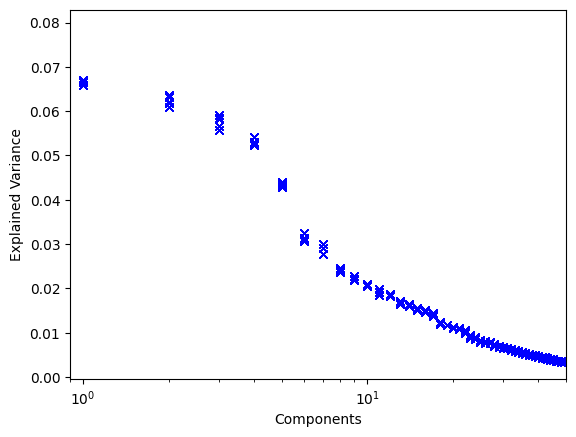

In [14]:
chain = 'TRA_TRB'
i = 10
metrics_tcremb[method][chain]={}
for n_prototypes in prototypes_n:
    for pca_n in pca_n_list:
        #if n_prototypes==3000:
        #    run_name = f'compare_V{i}'
        #else:
        #    run_name = f'compare_V{i}_{n_prototypes}'
        run_name = f'compare_V{i}_{n_prototypes}'
        v_path = f'data/data_preped/VDJdb_data_V{i}.csv'
        vdjdb_v = pd.read_csv(v_path,sep='\t')
        print(f"TCR-epitope paires count in V{i} dataset: {len(vdjdb_v)}")
        print(v_path)
    
        tcremb = TCRemb.TCRemb(run_name, vdjdb_v)
        tcremb.tcremb_clonotypes(chain)
        tcremb.tcremb_dists(chain)
        tcremb.tcremb_pca(chain,n_components=pca_n )
        tcremb.tcremb_tsne(chain)
        
        data_len = len(tcremb.pca_clones[chain])
        
        for j in params:
            dbscan = TCRemb.TCRemb_clustering(method)
            model = DBSCAN(eps=j, min_samples=2)
            dbscan.clstr(chain,tcremb, label, model=model)
            t = tcremb.annot[chain][[tcremb.annotation_id,label]].merge(dbscan.clstr_labels[chain],how='left')
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}'] = metrics.get_clustermetrics(t, label)
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['n_prototypes']=n_prototypes
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['eps']=j
            metrics_tcremb[method][chain][f'PC_{pca_n}_P{n_prototypes}_e{j}']['pc_n']=pca_n

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


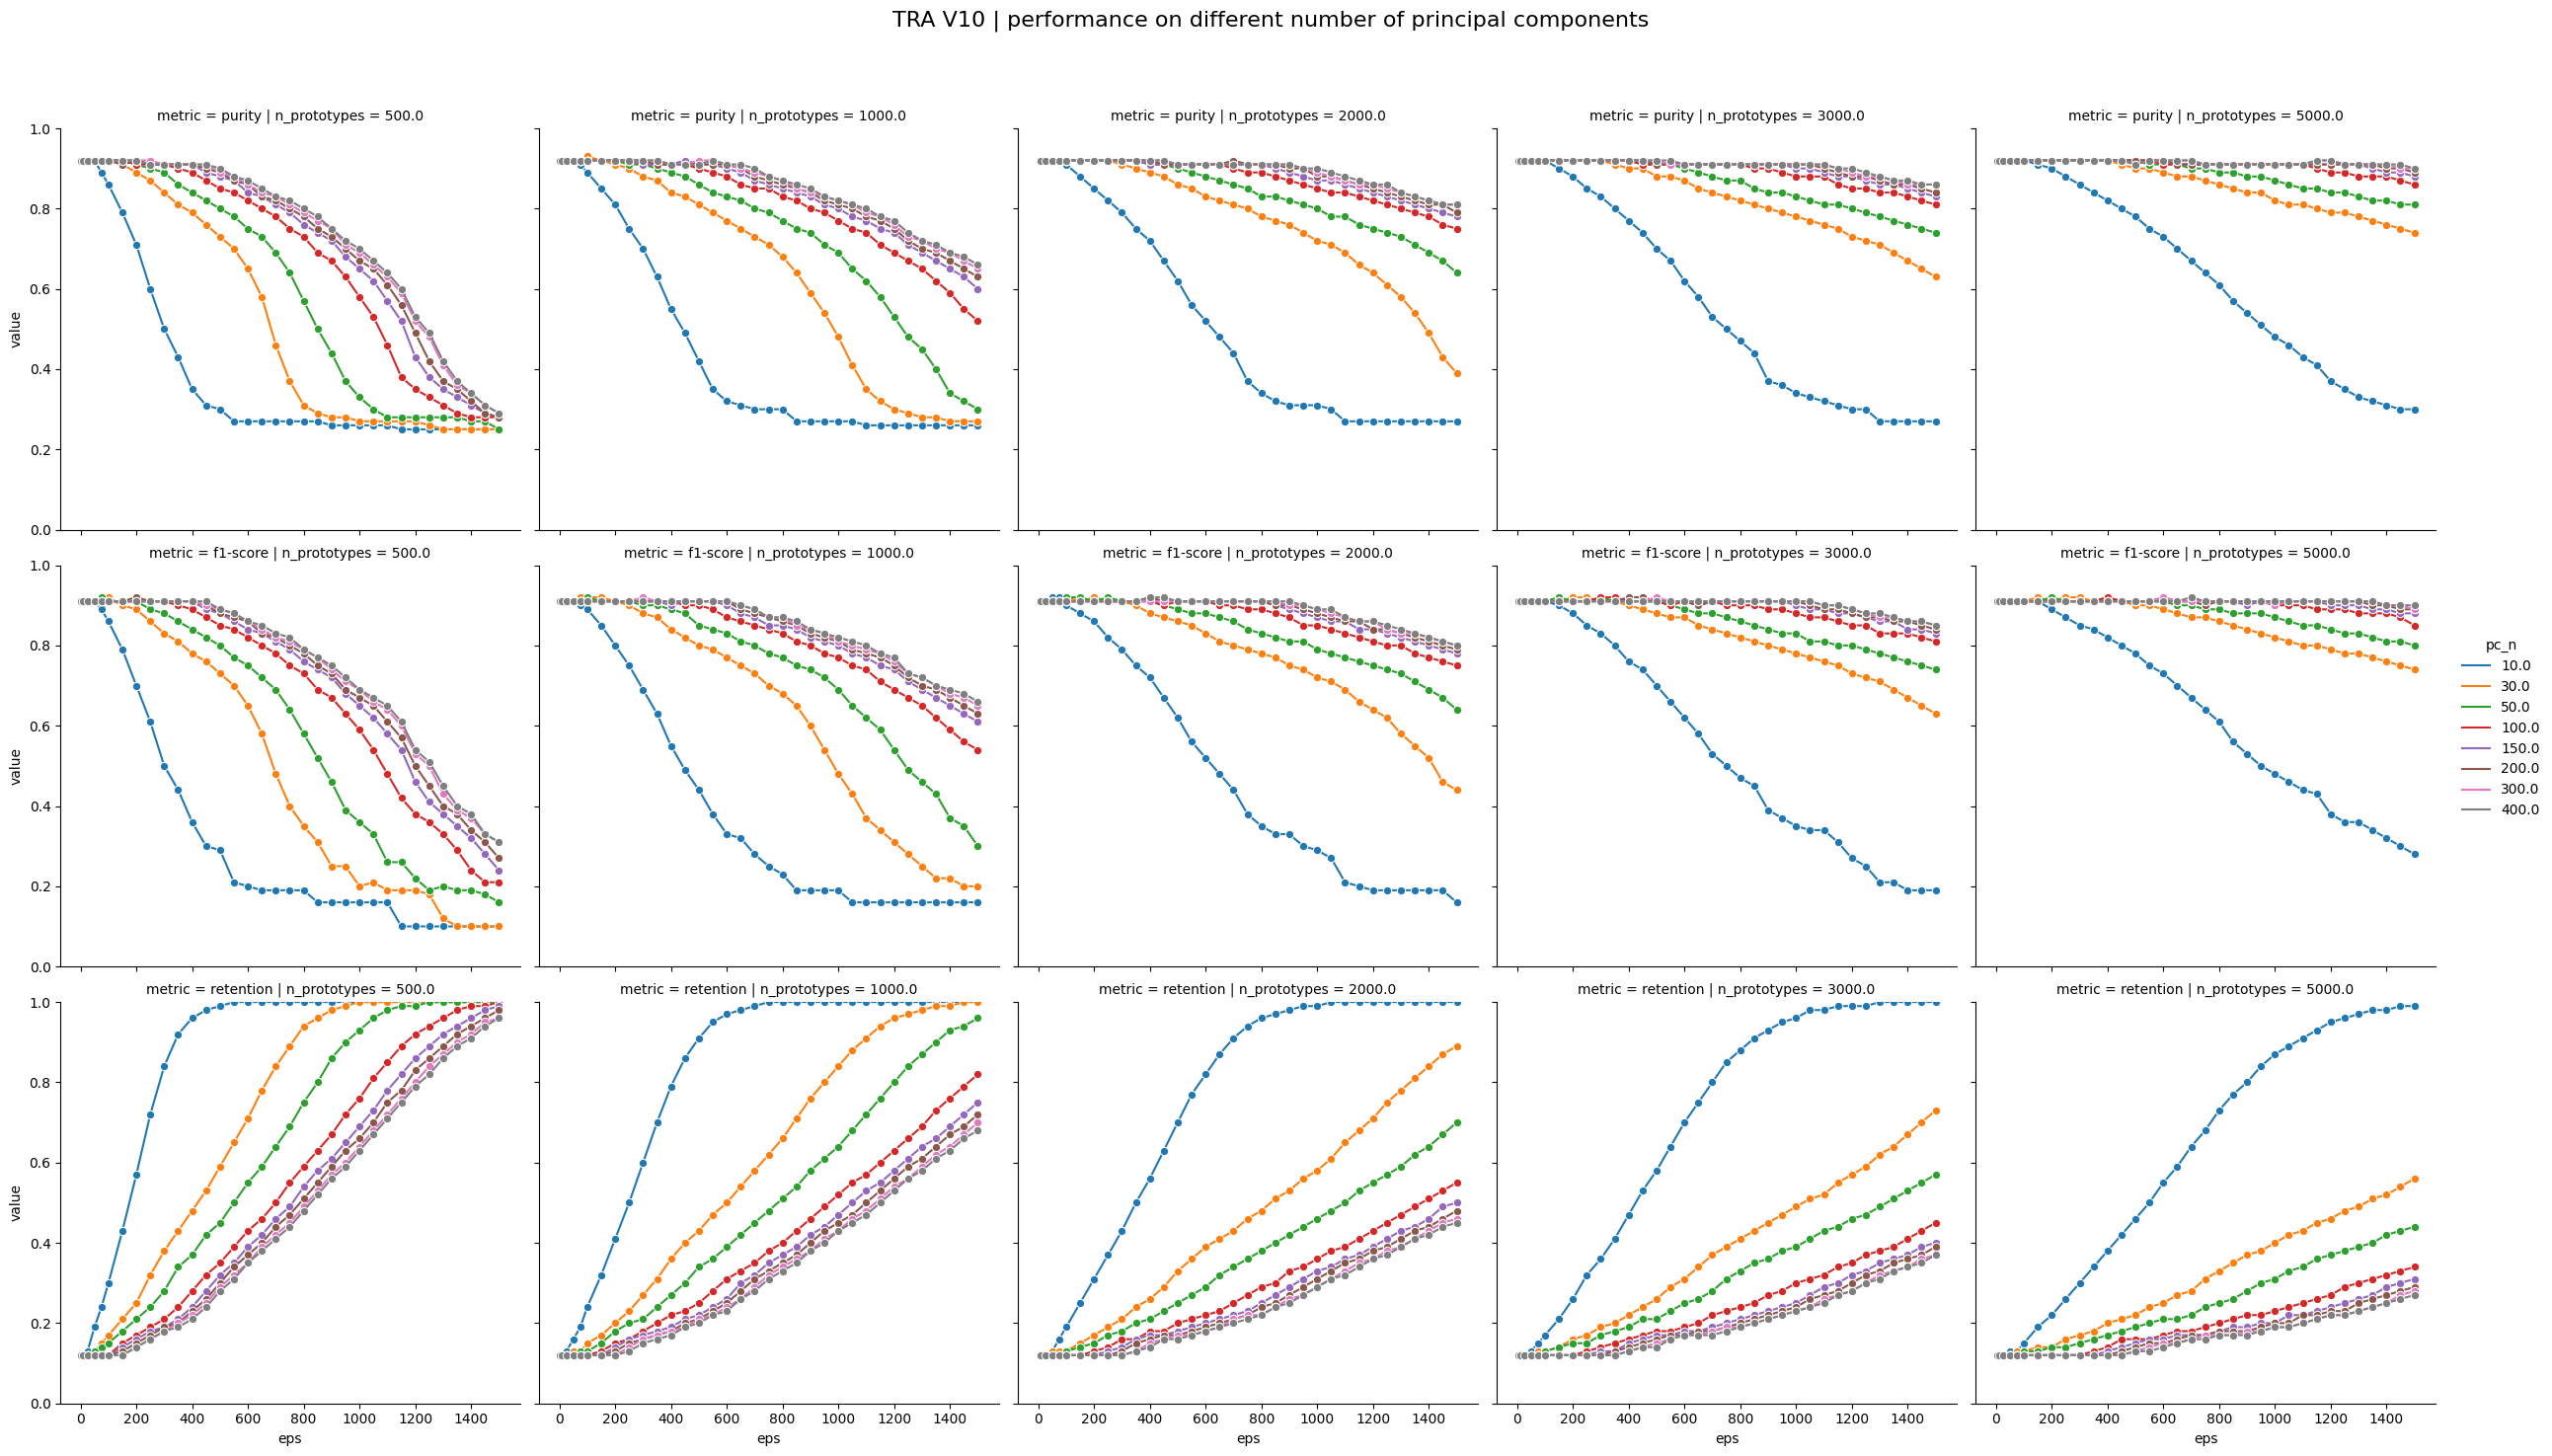

In [17]:
chain='TRA'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_{method}_{chain}.csv",index=False)
metrics_df = pd.read_csv(f"results/tables/tcremb_compare_{method}_{chain}.txt",sep='\t')
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
metrics_df['pc_n']=metrics_df['pc_n'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','pc_n','eps']].melt(id_vars=['n_prototypes','pc_n','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='pc_n', row='metric',col='n_prototypes',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain} V10 | performance on different number of principal components', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{method}_{chain}.png")

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


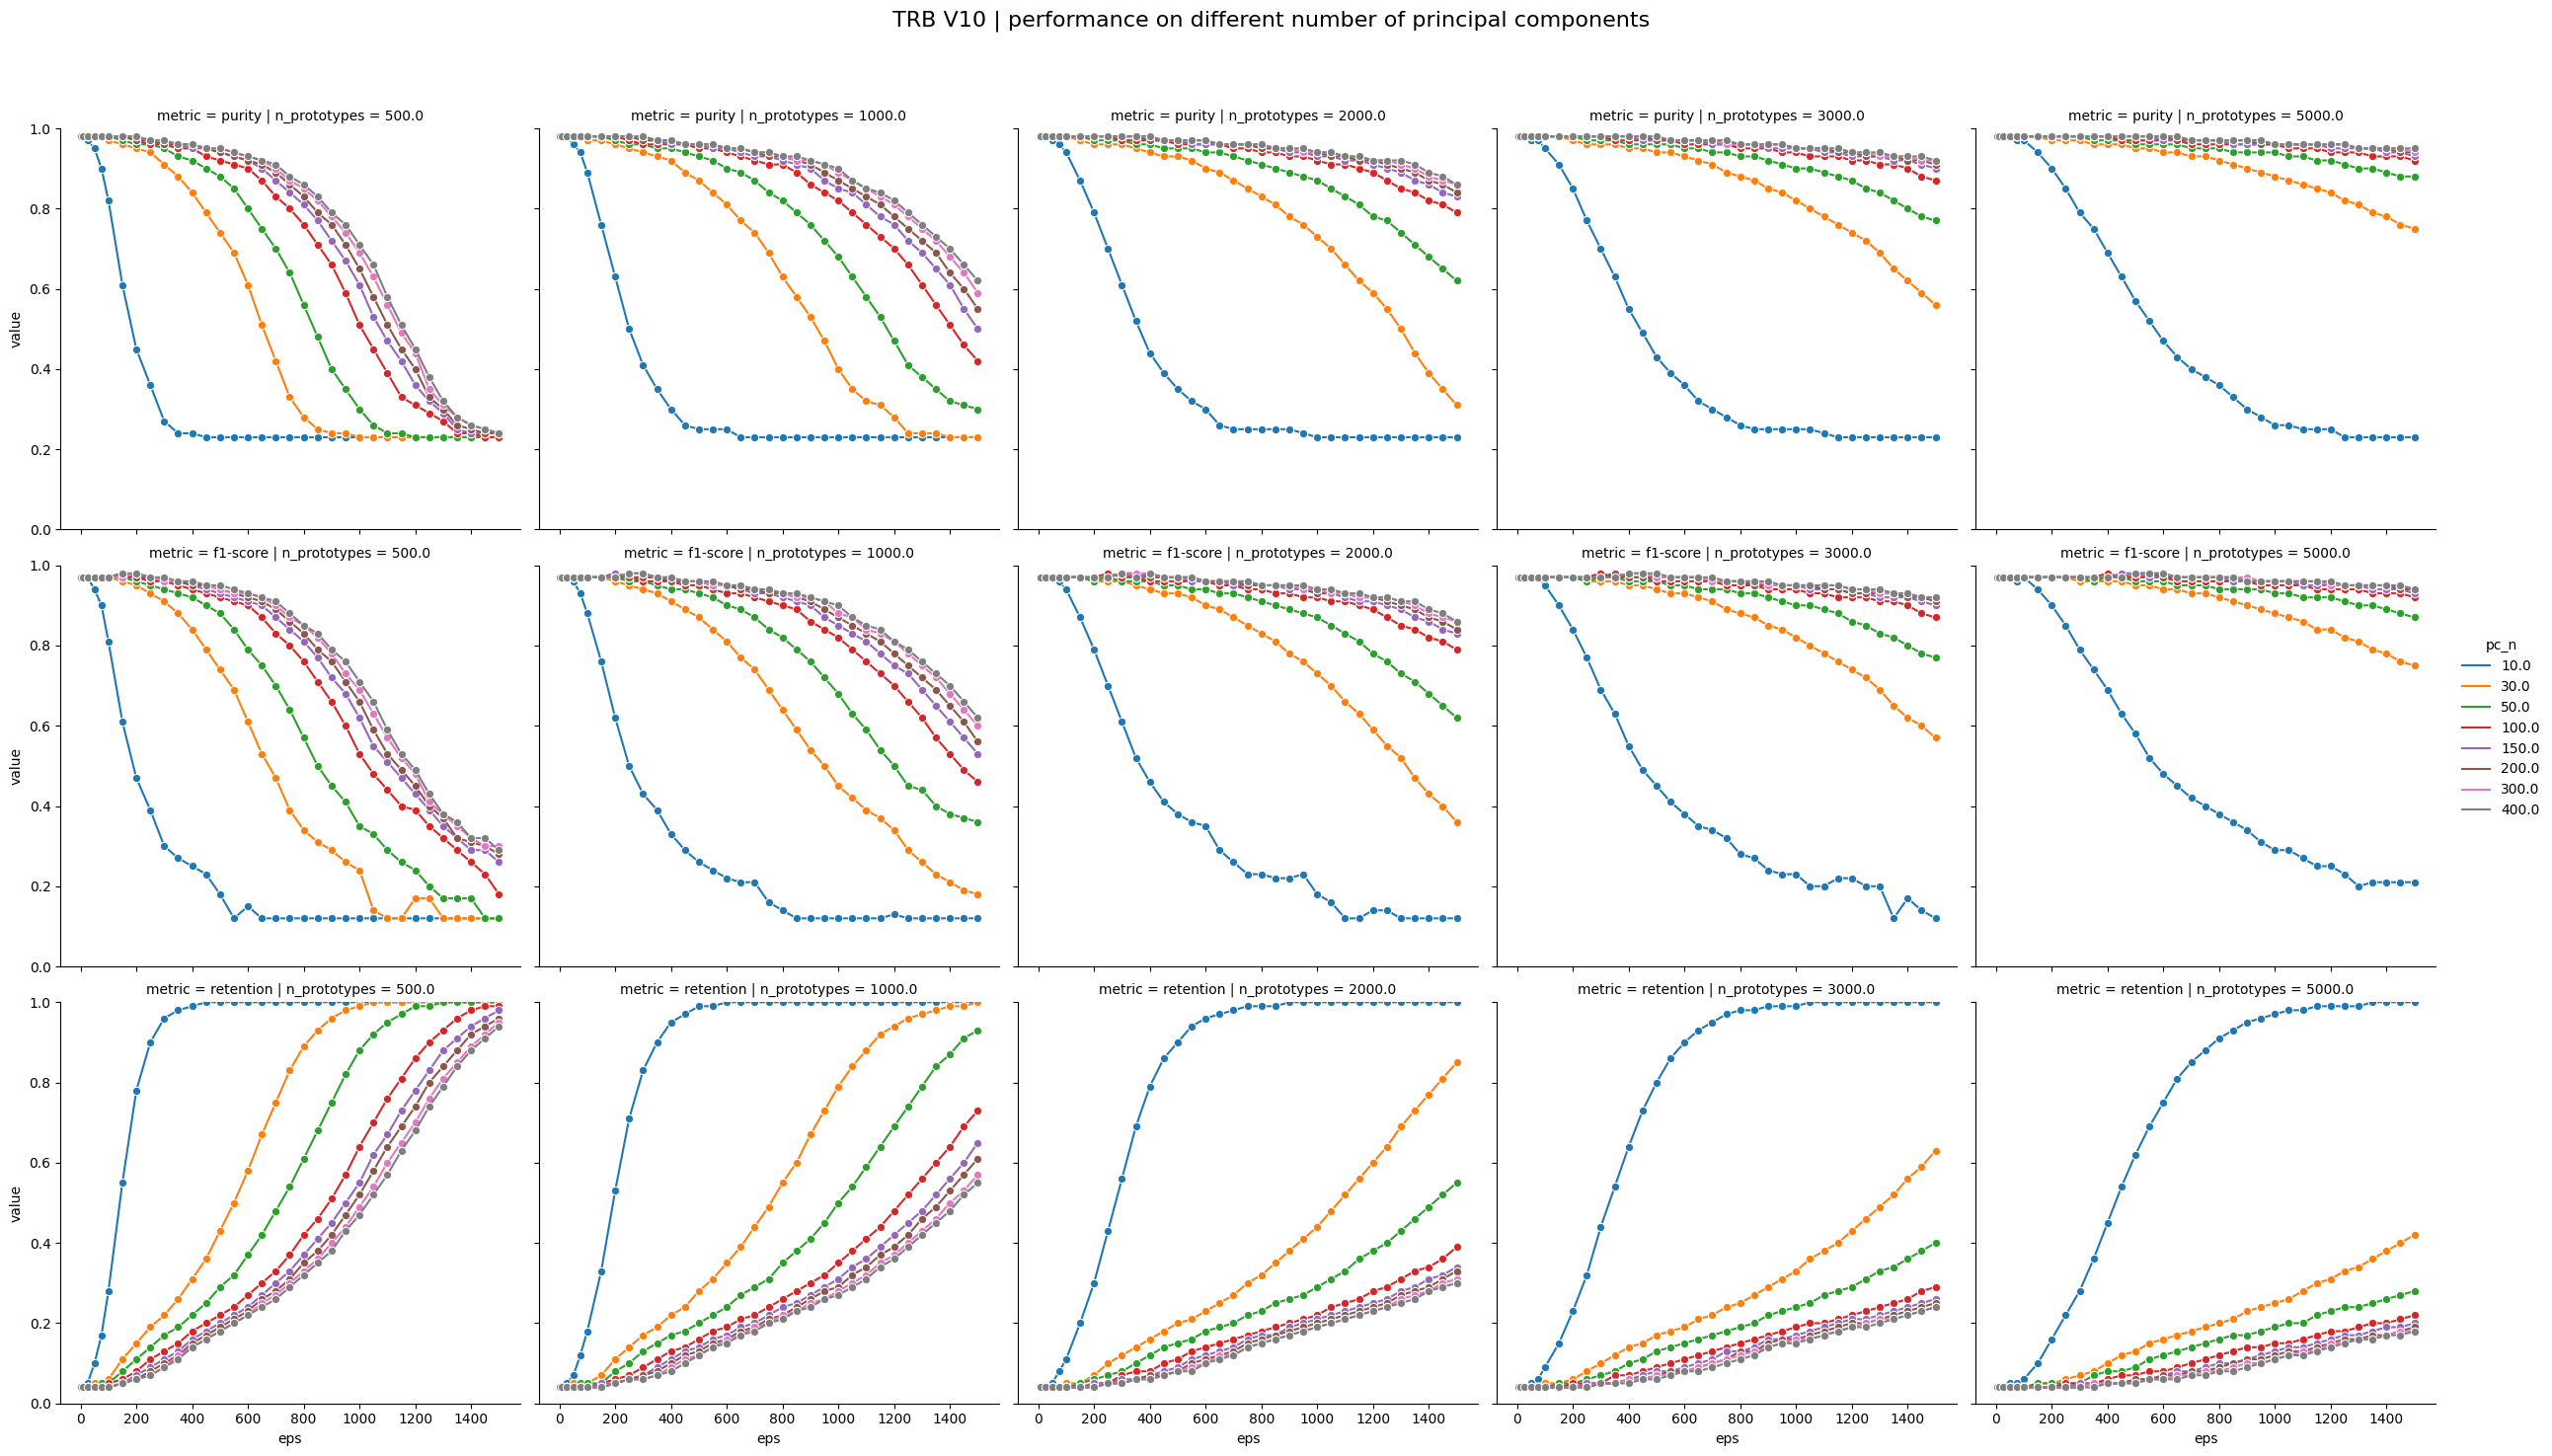

In [18]:
chain='TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_{method}_{chain}.csv",index=False)
metrics_df = pd.read_csv(f"results/tables/tcremb_compare_{method}_{chain}.txt",sep='\t')
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
metrics_df['pc_n']=metrics_df['pc_n'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','pc_n','eps']].melt(id_vars=['n_prototypes','pc_n','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='pc_n', row='metric',col='n_prototypes',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain} V10 | performance on different number of principal components', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{method}_{chain}.png")

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


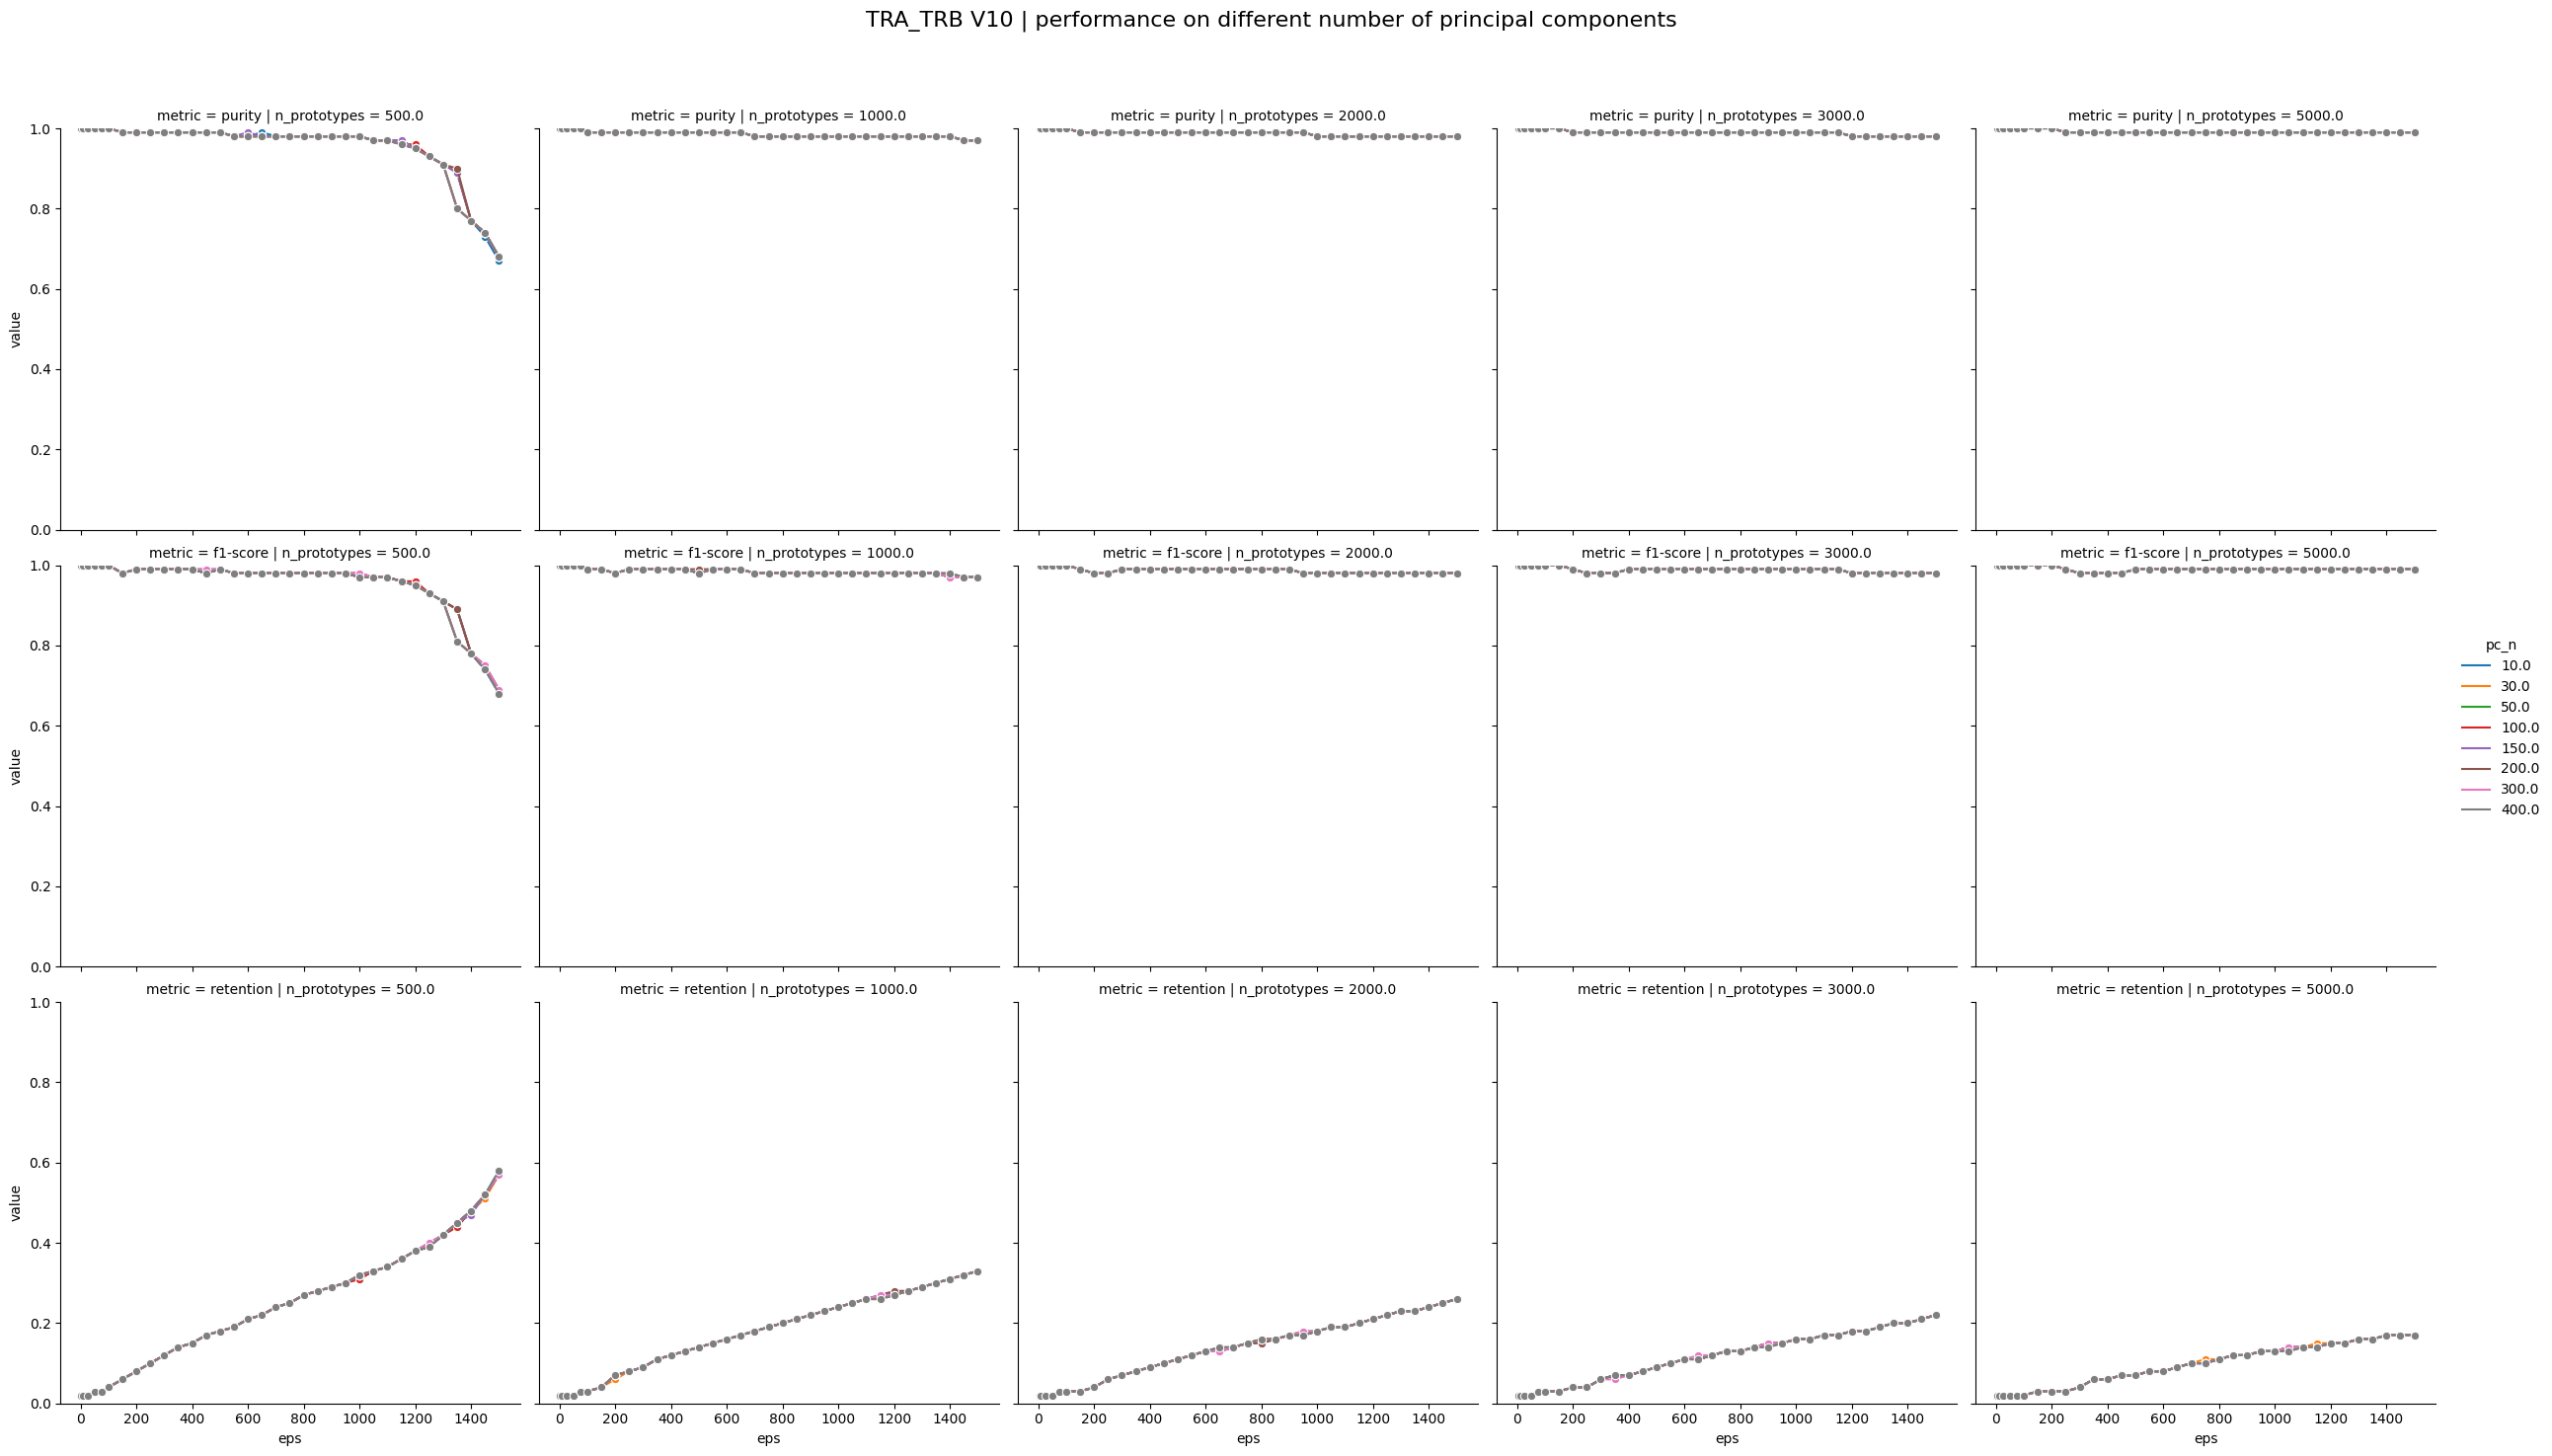

In [19]:
chain='TRA_TRB'
metrics_df = pd.DataFrame(metrics_tcremb[method][chain]).T
metrics_df.to_csv(f"results/tables/tcremb_compare_{method}_{chain}.csv",index=False)
metrics_df['n_prototypes']=metrics_df['n_prototypes'].astype(str)
metrics_df['pc_n']=metrics_df['pc_n'].astype(str)
t = metrics_df[['purity','f1-score','retention','n_prototypes','pc_n','eps']].melt(id_vars=['n_prototypes','pc_n','eps'],var_name='metric')
g = sns.relplot(data = t, x = 'eps', y = 'value', hue='pc_n', row='metric',col='n_prototypes',kind="line",marker='o')
g.set(ylim=(0, 1))
g.fig.suptitle(f'{chain} V10 | performance on different number of principal components', fontsize=16)
g.fig.subplots_adjust(top=0.9)
g.fig.savefig(f"results/figures/tcremb_compare_{method}_{chain}.png")

## Generated by OLGA and n prototypes in eps

In [110]:
method = 'eps_generated_range'

In [92]:
prototypes_sets = {100:{'TRA':'data/data_preped/olga_humanTRA_100.txt', 'TRB':'data/data_preped/olga_humanTRB_100.txt'}
                   ,150:{'TRA':'data/data_preped/olga_humanTRA_150.txt', 'TRB':'data/data_preped/olga_humanTRB_150.txt'}
                   ,300:{'TRA':'data/data_preped/olga_humanTRA_300.txt', 'TRB':'data/data_preped/olga_humanTRB_300.txt'}
                   ,500:{'TRA':'data/data_preped/olga_humanTRA_500.txt', 'TRB':'data/data_preped/olga_humanTRB_500.txt'}
                   ,1000:{'TRA':'data/data_preped/olga_humanTRA_1000.txt', 'TRB':'data/data_preped/olga_humanTRB_1000.txt'}
                   ,2000:{'TRA':'data/data_preped/olga_humanTRA_2000.txt', 'TRB':'data/data_preped/olga_humanTRB_2000.txt'}
                   ,3000:{'TRA':'data/data_preped/olga_humanTRA.txt', 'TRB':'data/data_preped/olga_humanTRB.txt'}
                   #,5000:{'TRA':'data/data_preped/olga_humanTRA_5000.txt', 'TRB':'data/data_preped/olga_humanTRB_5000.txt'}
                  }

In [93]:
n_list = [100, 1000, 10000, 100000, 1000000, 10000000]

In [94]:
n_list = [100, 1000, 10000, 100000]

In [95]:
m_list = list(prototypes_sets.keys())
#m_list = [500,1000,2000,3000]

In [96]:
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

In [97]:
eps_by_knee_dict = {}


for c in ['TRA','TRB']:
    chain=c
    
    for n in n_list:
        data_path = f'data/data_preped/olga_human_{chain}_{n}.txt'
        data_preped = pd.read_csv(data_path,sep='\t')
        
        for m in m_list:
            run_name = f'olga_{n}_prototypes_{m}'
            eps_by_knee_dict[f'{run_name}_{chain}']={}
            
            tcremb = TCRemb.TCRemb(run_name, data_preped,prototypes_path=prototypes_sets[m])
            tcremb.tcremb_clonotypes(chain)
            ##tcremb.tcremb_dists_count(chain)
            tcremb.tcremb_dists(chain)
            tcremb.tcremb_pca(chain)
            tcremb.tcremb_tsne(chain)
    
            neighbors = 4
            nbrs = NearestNeighbors(n_neighbors=neighbors).fit(tcremb.pca_clones[chain].drop(tcremb.clonotype_id,axis=1))
            distances, indices = nbrs.kneighbors(tcremb.pca_clones[chain].drop(tcremb.clonotype_id,axis=1))
            distances = np.sort(distances, axis=0)
            distances = distances[:,1]
    
            eps_by_knee_dict[f'{run_name}_{chain}']['max_pca_dist']=round(max(distances),2)
            eps_by_knee_dict[f'{run_name}_{chain}']['mean_pca_dist']=round(np.mean(distances),2)
            eps_by_knee_dict[f'{run_name}_{chain}']['median_pca_dist']=round(np.median(distances),2)
            eps_by_knee_dict[f'{run_name}_{chain}']['clonotypes_count'] = str(len(tcremb.pca_clones[chain]))

            kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                                    distances, # y values
                                    S=1.0, #parameter suggested from paper
                                    #curve="convex", #parameter from figure
                                    curve="concave",
                                    interp_method="polynomial",
                                    online = True,
                                  polynomial_degree=10,
                                  direction="increasing", ) #parameter from figure
    
            eps_by_knee_dict[f'{run_name}_{chain}']['knee']=str(round(distances[kneedle.knee],2))
            eps_by_knee_dict[f'{run_name}_{chain}']['chain']=chain
            eps_by_knee_dict[f'{run_name}_{chain}']['n_data']=n
            eps_by_knee_dict[f'{run_name}_{chain}']['n_prototypes']=m

/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/home/ykremlyakova/.conda/envs/py311/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has

In [98]:
pd.DataFrame(eps_by_knee_dict).T

max_pca_dist mean_pca_dist median_pca_dist  \
olga_100_prototypes_100_TRA          1002.07         699.5          703.09   
olga_100_prototypes_150_TRA          1277.03        875.75          885.73   
olga_100_prototypes_300_TRA          1801.53        1243.4         1289.44   
olga_100_prototypes_500_TRA          2305.68       1569.65         1521.36   
olga_100_prototypes_1000_TRA         3294.98       2232.18         2152.74   
olga_100_prototypes_2000_TRA         4564.57       3194.39         3252.47   
olga_100_prototypes_3000_TRA         5554.31       3873.39          3939.8   
olga_1000_prototypes_100_TRA           774.8        495.45          507.24   
olga_1000_prototypes_150_TRA         1057.03        589.79          598.65   
olga_1000_prototypes_300_TRA         1393.95        848.07           871.2   
olga_1000_prototypes_500_TRA          1829.9       1062.71         1088.22   
olga_1000_prototypes_1000_TRA        2429.52       1499.53         1530.52   
olga_1000_prototypes_2000_TRA        3534.87       2122.35         2187.66   
olga_1000_prototypes_3000_TRA        4417.31       2570.72         2653.49   
olga_10000_prototypes_100_TRA         729.34         341.5          353.03   
olga_10000_prototypes_150_TRA         783.14        399.06          411.33   
olga_10000_prototypes_300_TRA        1211.96        558.69           577.7   
olga_10000_prototypes_500_TRA         1460.4        700.56          726.27   
olga_10000_prototypes_1000_TRA        2136.5        984.14         1018.97   
olga_10000_prototypes_2000_TRA       3084.26       1379.39         1433.73   
olga_10000_prototypes_3000_TRA       3685.87       1665.75         1725.88   
olga_100000_prototypes_100_TRA        574.88        223.11          230.16   
olga_100000_prototypes_150_TRA        705.61        254.62          257.18   
olga_100000_prototypes_300_TRA         959.5        346.95           340.1   
olga_100000_prototypes_500_TRA       1303.85        432.69          428.94   
olga_100000_prototypes_1000_TRA      1843.63         601.5          591.27   
olga_100000_prototypes_2000_TRA      2493.18        829.51          801.72   
olga_100000_prototypes_3000_TRA      2972.81       1001.84          971.72   
olga_100_prototypes_100_TRB          1090.48        754.62          750.73   
olga_100_prototypes_150_TRB          1385.87        930.31          929.01   
olga_100_prototypes_300_TRB          1712.57       1278.04         1257.81   
olga_100_prototypes_500_TRB          2398.89       1679.27         1683.24   
olga_100_prototypes_1000_TRB          3252.8       2339.78          2339.9   
olga_100_prototypes_2000_TRB          4557.2       3293.16         3275.74   
olga_100_prototypes_3000_TRB         5980.26       4033.18         4043.02   
olga_1000_prototypes_100_TRB          883.57        574.14           580.1   
olga_1000_prototypes_150_TRB         1009.72        694.97          703.01   
olga_1000_prototypes_300_TRB         1445.43        939.45           955.0   
olga_1000_prototypes_500_TRB          1823.6       1217.49         1235.77   
olga_1000_prototypes_1000_TRB        2629.96       1702.08         1721.23   
olga_1000_prototypes_2000_TRB         3572.3        2413.2         2448.58   
olga_1000_prototypes_3000_TRB        4374.63       2924.56         2960.73   
olga_10000_prototypes_100_TRB         863.35        455.94          460.66   
olga_10000_prototypes_150_TRB         916.67        552.21          558.66   
olga_10000_prototypes_300_TRB        1409.38        736.82          743.93   
olga_10000_prototypes_500_TRB        1804.08        950.66          962.28   
olga_10000_prototypes_1000_TRB       2510.32       1311.48         1323.78   
olga_10000_prototypes_2000_TRB       3507.47       1864.35         1888.71   
olga_10000_prototypes_3000_TRB       4254.91       2252.45          2281.1   
olga_100000_prototypes_100_TRB        742.72        364.09          370.12   
olga_100000_prototypes_150_TRB        862.67        43

In [99]:
pd.DataFrame(eps_by_knee_dict).T.to_csv(f"results/tables/tcremb_compare_eps_in_olga_generated_range_prototypes.csv",index=False)

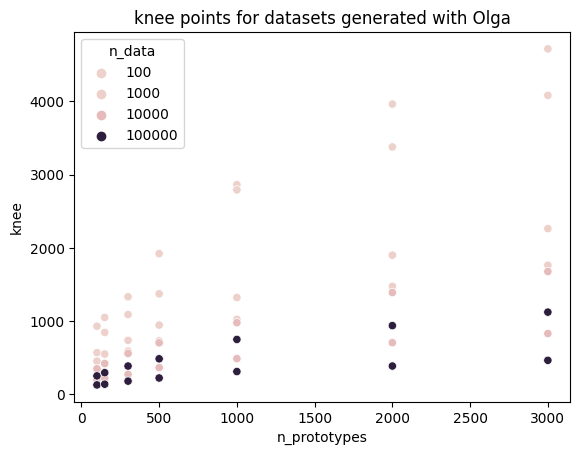

In [114]:
t = pd.DataFrame(eps_by_knee_dict).T
t['knee']= t['knee'].astype(float)
g = sns.scatterplot(data=t, x="n_prototypes", y="knee", hue='n_data').set_title('knee points for datasets generated with Olga')
g.figure.savefig(f"results/figures/tcremb_compare_{method}_knee_prototypes.png")

In [115]:
g = sns.scatterplot(data=t, x="n_data", y="n_prototypes", hue='knee').set_title('knee points for datasets generated with Olga')
g.figure.savefig(f"results/figures/tcremb_compare_{method}_prototypes_ndata.png")

In [116]:
g = sns.scatterplot(data=t, x="n_data", y="knee", hue='n_prototypes').set_title('knee points for datasets generated with Olga')
g.figure.savefig(f"results/figures/tcremb_compare_{method}_knee_ndata.png")

In [ ]:
## if using dict for tcremb
tcremb_dict = {}
eps_by_knee_dict = {}


for c in ['TRA','TRB']:
    chain=c
    
    for n in n_list:
        data_path = f'data/data_preped/olga_human_{chain}_{n}.txt'
        data_preped = pd.read_csv(data_path,sep='\t')
        
        for m in m_list:
            run_name = f'olga_{n}_prototypes_{m}'
            eps_by_knee_dict[f'{run_name}_{chain}']={}
            
            tcremb_dict[run_name] = TCRemb.TCRemb(run_name, data_preped,prototypes_path=prototypes_sets[m])
            tcremb_dict[run_name].tcremb_clonotypes(chain)
            ##tcremb_dict[run_name].tcremb_dists_count(chain)
            tcremb_dict[run_name].tcremb_dists(chain)
            tcremb_dict[run_name].tcremb_pca(chain)
            tcremb_dict[run_name].tcremb_tsne(chain)
    
            neighbors = 4
            nbrs = NearestNeighbors(n_neighbors=neighbors).fit(tcremb_dict[run_name].pca_clones[chain].drop(tcremb_dict[run_name].clonotype_id,axis=1))
            distances, indices = nbrs.kneighbors(tcremb_dict[run_name].pca_clones[chain].drop(tcremb_dict[run_name].clonotype_id,axis=1))
            distances = np.sort(distances, axis=0)
            distances = distances[:,1]
    
            eps_by_knee_dict[f'{run_name}_{chain}']['max_dist']=round(max(distances),2)
            eps_by_knee_dict[f'{run_name}_{chain}']['clonotypes_count'] = str(len(tcremb_dict[run_name].pca_clones[chain]))

            kneedle = KneeLocator(range(1,len(distances)+1),  #x values
                                    distances, # y values
                                    S=1.0, #parameter suggested from paper
                                    #curve="convex", #parameter from figure
                                    curve="concave",
                                    interp_method="polynomial",
                                    online = True,
                                  direction="increasing", ) #parameter from figure
    
            eps_by_knee_dict[f'{run_name}_{chain}']['knee']=str(round(distances[kneedle.knee],2))
            eps_by_knee_dict[f'{run_name}_{chain}']['chain']=chain
            eps_by_knee_dict[f'{run_name}_{chain}']['n_data']=n
            eps_by_knee_dict[f'{run_name}_{chain}']['n_prototypes']=m

## tables

### Prototypes

In [11]:
# Prototypes n
chain = 'TRA'
t_a = pd.read_csv(f"results/tables/tcremb_compare_prototypes_dbscan_prototypes_n_{chain}.txt",sep='\t')
t_a


purity  retention  consistency   ami  precision  recall  f1-score  \
0       0.92       0.12       0.0065  0.86       0.90    0.92      0.91   
1       0.92       0.12       0.0065  0.86       0.90    0.92      0.91   
2       0.92       0.12       0.0065  0.86       0.90    0.92      0.91   
3       0.92       0.13       0.0056  0.86       0.90    0.92      0.91   
4       0.92       0.16       0.0042  0.86       0.91    0.92      0.91   
...      ...        ...          ...   ...        ...     ...       ...   
1355    0.93       0.36       0.0286  0.74       0.93    0.93      0.93   
1356    0.93       0.37       0.0278  0.74       0.93    0.93      0.93   
1357    0.92       0.38       0.0302  0.73       0.93    0.92      0.92   
1358    0.92       0.39       0.0298  0.73       0.92    0.92      0.92   
1359    0.92       0.40       0.0331  0.72       0.92    0.92      0.92   

      mean_clustsize  n_prototypes   eps                      v  \
0               6.99           100     3   V10_TCRs_count:10551   
1               6.99           100    10   V10_TCRs_count:10551   
2               6.99           100    25   V10_TCRs_count:10551   
3               6.60           100    50   V10_TCRs_count:10551   
4               6.10           100    75   V10_TCRs_count:10551   
...              ...           ...   ...                    ...   
1355            5.91          5000  1300  V1000_TCRs_count:5986   
1356            5.83          5000  1350  V1000_TCRs_count:5986   
1357            5.75          5000  1400  V1000_TCRs_count:5986   
1358            5.78          5000  1450  V1000_TCRs_count:5986   
1359            5.78          5000  1500  V1000_TCRs_count:5986   

                                                   time  
0            annotId antigen.epitope  cluster label_...  
1            annotId antigen.epitope  cluster label_...  
2            annotId antigen.epitope  cluster label_...  
3            annotId antigen.epitope  cluster label_...  
4            annotId antigen.epitope  cluster label_...  
...                                                 ...  
1355        annotId antigen.epitope  cluster label_c...  
1356        annotId antigen.epitope  cluster label_c...  
1357        annotId antigen.epitope  cluster label_c...  
1358        annotId antigen.epitope  cluster label_c...  
1359        annotId antigen.epitope  cluster label_c...  

[1360 rows x 12 columns]

In [12]:
t_a['time'][0]

'       annotId antigen.epitope  cluster label_cluster  total_cluster  \\\n0            0        FLKEKGGL       -1     GILGFVFTL          11636   \n1            1        FLKEKGGL       -1     GILGFVFTL          11636   \n2            2        FLKEKGGL       -1     GILGFVFTL          11636   \n3            3      ELAGIGILTV       -1     GILGFVFTL          11636   \n4            4      ELAGIGILTV       -1     GILGFVFTL          11636   \n...        ...             ...      ...           ...            ...   \n13211    13223    PQPELPYPQPQL      225  PQPELPYPQPQL              5   \n13212    13224    PQPELPYPQPQL      225  PQPELPYPQPQL              5   \n13213    13225    PQPELPYPQPQL       -1     GILGFVFTL          11636   \n13214    13226    PQPELPYPQPQL       -1     GILGFVFTL          11636   \n13215    13227    PQPELPYPQPQL      222  PQPELPYPQPQL              2   \n\n       total_group  count_matched  fraction_matched  fraction_matched_exp  \\\n0             3366           2914        

In [ ]:
(f"results/tables/compare_methods_dbscan_nodups_{chain}.csv",index=False)

In [ ]:
read_csv(f"results/tables/tcremb_compare_prototypes_{method}_{chain}.txt",sep='\t',index=False)

In [ ]:
## 